# **Loan Eligibility Prediction using Various ML and DL Techniques**

# **Importing Necessary Packages and Loading The Dataset**

In [1]:
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Let's Load the data using panda library
df = pd.read_csv('lending_club_loan_two.csv')

In [4]:
#Let's print the first 5 records of the data
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0      10000   36 months     11.44       329.48     B        B4   
1       8000   36 months     11.99       265.68     B        B5   
2      15600   36 months     10.49       506.97     B        B3   
3       7200   36 months      6.49       220.65     A        A2   
4      24375   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0       16       0     36369       41.8        25                    w   
1       17       0     20131       53.3        27                    f   
2       13       0     11987       92.2        26                    f   
3        6       0      5472       21.5        13                    f   
4       13       0     24584       69.8        43                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [5]:
#Let's Print the Last 5 records of the dataset
df.tail()

loan_amnt        term  int_rate  installment grade sub_grade  \
396025      10000   60 months     10.99       217.38     B        B4   
396026      21000   36 months     12.29       700.42     C        C1   
396027       5000   36 months      9.99       161.32     B        B1   
396028      21000   60 months     15.31       503.02     C        C2   
396029       2000   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
396025          licensed bankere    2 years           RENT     40000.0  ...   
396026                     Agent    5 years       MORTGAGE    110000.0  ...   
396027              City Carrier  10+ years           RENT     56500.0  ...   
396028      Gracon Services, Inc  10+ years       MORTGAGE     64000.0  ...   
396029  Internal Revenue Service  10+ years           RENT     42996.0  ...   

       open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
396025        6       0      1990       34.3        23                    w   
396026        6       0     43263       95.7         8                    f   
396027       15       0     32704       66.9        23                    f   
396028        9       0     15704       53.8        20                    f   
396029        3       0      4292       91.3        19                    f   

       application_type  mort_acc  pub_rec_bankruptcies  \
396025       INDIVIDUAL       0.0                   0.0   
396026       INDIVIDUAL       1.0                   0.0   
396027       INDIVIDUAL       0.0                   0.0   
396028       INDIVIDUAL       5.0                   0.0   
396029       INDIVIDUAL       NaN                   0.0   

                                                  address  
396025   12951 Williams Crossing\r\nJohnnyville, DC 30723  
396026  0114 Fowler Field Suite 028\r\nRachelborough, ...  
396027  953 Matthew Points Suite 414\r\nReedfort, NY 7...  
396028  7843 Blake Freeway Apt. 229\r\nNew Michael, FL...  
396029      787 Michelle Causeway\r\nBriannaton, AR 48052  

[5 rows x 27 columns]

### **Let's Understand More About the Data**

#### **Feature Description**

**0. loan_amnt**                - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**1. term**                      - The number of payments on the loan. Values are in months and can be either 36 or 60.

**2. int_rate**                  - Interest Rate on the loan

**3. installment**      - The monthly payment owed by the borrower if the loan originates.

**4.	grade**           -	LC assigned loan grade

**5.	sub_grade**       -	LC assigned loan subgrade

**6.	emp_title**       -	The job title supplied by the Borrower when applying for the loan.*

**7.	emp_length**      - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

**8.	home_ownership**  - The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

**9.	annual_inc**      - The self-reported annual income provided by the borrower during registration.

**10.	verification_status** - Indicates if income was verified by LC, not verified, or if the income source was verified

**11.	issue_d** - The month which the loan was funded

**12.	loan_status** - Current status of the loan

**13.	purpose** - A category provided by the borrower for the loan request.

**14.	title** -	The loan title provided by the borrower

**15.	zip_code** -	The first 3 numbers of the zip code provided by the borrower in the loan application.

**16.	addr_state** -	The state provided by the borrower in the loan application

**17.	dti** -	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage
and the requested LC loan, divided by the borrower’s self-reported monthly income.

**18.	earliest_cr_line** -	The month the borrower's earliest reported credit line was opened

**19.	open_acc** -	The number of open credit lines in the borrower's credit file.

**20.	pub_rec**	 - Number of derogatory public records

**21.	revol_bal** -	Total credit revolving balance

**22.	revol_util** -	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**23.	total_acc** -	The total number of credit lines currently in the borrower's credit file

**24.	initial_list_status** - The initial listing status of the loan. Possible values are – W, F

**25.	application_type** - Indicates whether the loan is an individual application or a joint application with two co-borrowers

**26.	mort_acc** - Number of mortgage accounts.

**27.	pub_rec_bankruptcies** - 	Number of public record bankruptcies

In [6]:
#Printing the shape of the dataset
df.shape

(396030, 27)

**Here we have 396030 observations with 27 features in our dataset**

In [7]:
#Getting the data types of all the columns
df.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

**Here in our dataset we have both object and float data types.**

In [8]:
#check details about the data set
print("Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :")
df.info()

Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan

In [9]:
#Here is the unique values in our data
print("The unique values in each and every column in our data are as below:")
df.nunique()

The unique values in each and every column in our data are as below:


loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173103
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48789
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [10]:
print('The statistical information about our data set is as below :')
df.describe(include='all').T

The statistical information about our data set is as below :


count  unique                          top    freq  \
loan_amnt             396030.0     NaN                          NaN     NaN   
term                    396030       2                    36 months  302005   
int_rate              396030.0     NaN                          NaN     NaN   
installment           396030.0     NaN                          NaN     NaN   
grade                   396030       7                            B  116018   
sub_grade               396030      35                           B3   26655   
emp_title               373103  173103                      Teacher    4389   
emp_length              377729      11                    10+ years  126041   
home_ownership          396030       6                     MORTGAGE  198348   
annual_inc            396030.0     NaN                          NaN     NaN   
verification_status     396030       3                     Verified  139563   
issue_d                 396030     115                       Oct-14   14846   
loan_status             396030       2                   Fully Paid  318357   
purpose                 396030      14           debt_consolidation  234507   
title                   394274   48789           Debt consolidation  152472   
dti                   396030.0     NaN                          NaN     NaN   
earliest_cr_line        396030     684                       Oct-00    3017   
open_acc              396030.0     NaN                          NaN     NaN   
pub_rec               396030.0     NaN                          NaN     NaN   
revol_bal             396030.0     NaN                          NaN     NaN   
revol_util            395754.0     NaN                          NaN     NaN   
total_acc             396030.0     NaN                          NaN     NaN   
initial_list_status     396030       2                            f  238066   
application_type        396030       3                   INDIVIDUAL  395319   
mort_acc              358235.0     NaN                          NaN     NaN   
pub_rec_bankruptcies  395495.0     NaN                          NaN     NaN   
address                 396030  393700  USCGC Smith\r\nFPO AE 70466       8   

                              mean           std    min      25%      50%  \
loan_amnt             14113.888089   8357.441341  500.0   8000.0  12000.0   
term                           NaN           NaN    NaN      NaN      NaN   
int_rate                   13.6394      4.472157   5.32    10.49    13.33   
installment             431.849698     250.72779  16.08   250.33   375.43   
grade                          NaN           NaN    NaN      NaN      NaN   
sub_grade                      NaN           NaN    NaN      NaN      NaN   
emp_title                      NaN           NaN    NaN      NaN      NaN   
emp_length                     NaN           NaN    NaN      NaN      NaN   
home_ownership                 NaN           NaN    NaN      NaN      NaN   
annual_inc            74203.175798  61637.621158    0.0  45000.0  64000.0   
verification_status            NaN           NaN    NaN      NaN      NaN   
issue_d                        NaN           NaN    NaN      NaN      NaN   
loan_status                    NaN           NaN    NaN      NaN      NaN   
purpose                        NaN           NaN    NaN      NaN      NaN   
title                          NaN           NaN    NaN      NaN      NaN   
dti                      17.379514     18.019092    0.0    11.28    16.91   
earliest_cr_line               NaN           NaN    NaN      NaN      NaN   
open_acc                 11.311153      5.137649    0.0      8.0     10.0   
pub_rec                   0.178191      0.530671    0.0      0.0      0.0   
revol_bal             15844.539853  20591.836109    0.0   6025.0  11181.0   
revol_util               53.791749     24.452193    0.0     35.8     54.8   
total_acc                25.414744     11.886991    2.0     17.0     24.0   
initial_list_status            NaN       

**The above table shows the statistical information about the each and every column of our data set.**

In [11]:
# Let's Check the duplicated values in our data
df.duplicated().sum()

0

**From the above we came to know that there is no duplicate values in our data set.**

# **Exploratory Data Analysis (EDA)**

In [12]:
#Let's check the null values present in the data set
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**From the above we found that there are some missing values in emp_title,emp_length,title, revol_util, mort_acc and Pub_rec_bankruptcies column**

# It creates a dataframe called 'missing' that calculates the percentage of missing values in each column of the 'df' dataset. It then plots a graph using seaborn library, displaying the percentage of missing values for each column as data points on the y-axis. The x-axis represents the column names. This graph helps visualize the extent of missing data in the dataset, allowing for easy identification of columns with high percentages of missing values.

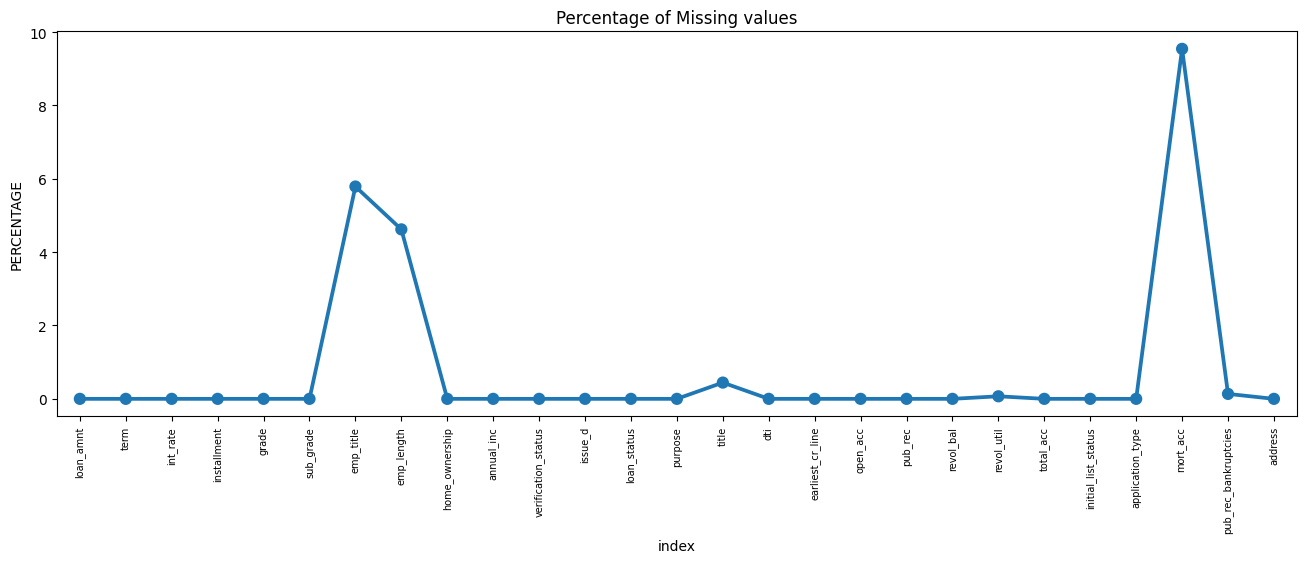

In [13]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

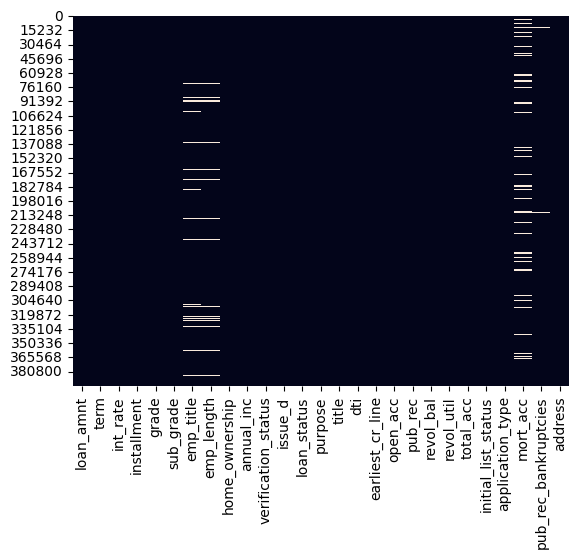

In [14]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [15]:
print("Here are the columnn names of our data set :")
df.columns

Here are the columnn names of our data set :


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [16]:
df.loan_status.value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

**There are two categories present in our target column first one is fully paid and it has 318357 observations and second one is charged off and it has 77673 observations**

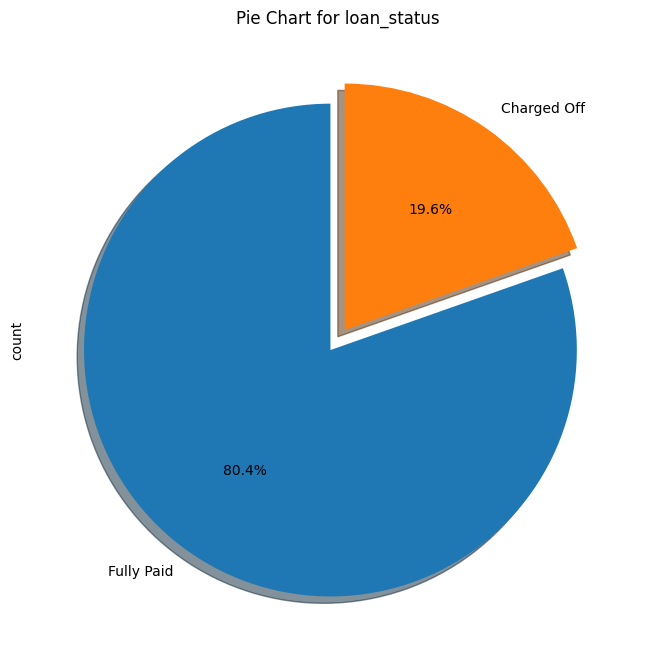

In [17]:
#To get the pie chart to analyze loan_status
df ['loan_status'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for loan_status')
plt.show()

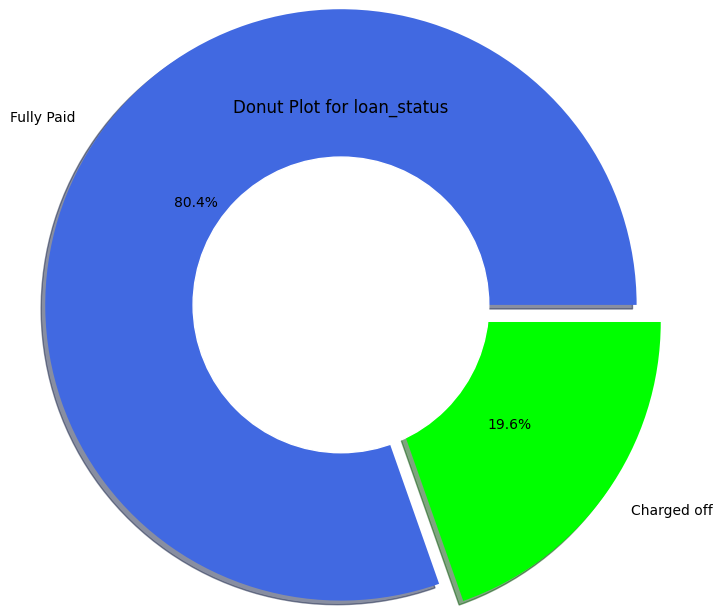

In [18]:
#To get the Donut Plot to analyze loan_status
data1 = df['loan_status'].value_counts()
explode = (0, 0.2)
plt.pie(data1, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Fully Paid','Charged off'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for loan_status')
plt.show()

<Axes: xlabel='loan_status', ylabel='count'>

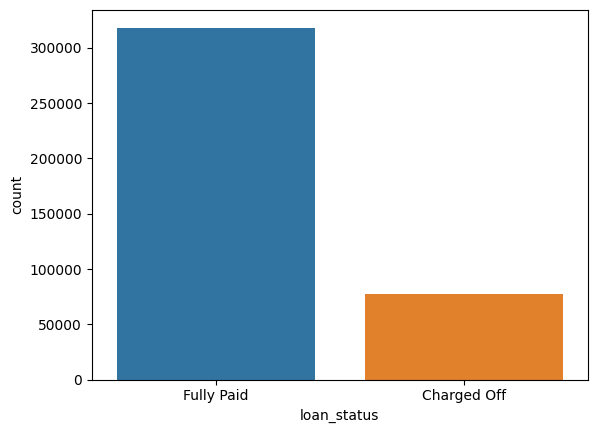

In [19]:
#let's see loan_status by using countplot
sns.countplot(x=df.loan_status)

#### **Let's Analysis the loan_amount column**

In [20]:
df.loan_amnt.value_counts()

loan_amnt
10000    27668
12000    21366
15000    19903
20000    18969
35000    14576
         ...  
36225        1
950          1
37800        1
30050        1
725          1
Name: count, Length: 1397, dtype: int64

In [21]:
df.loan_amnt.nunique()

1397

There are 1397 unique values present in the loaln amount column in our data

<Axes: xlabel='loan_amnt', ylabel='count'>

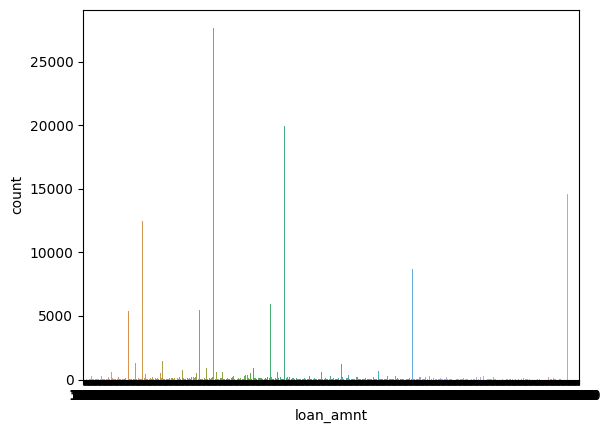

In [22]:
#let's see loan_amnt by using countplot
sns.countplot(x=df.loan_amnt)

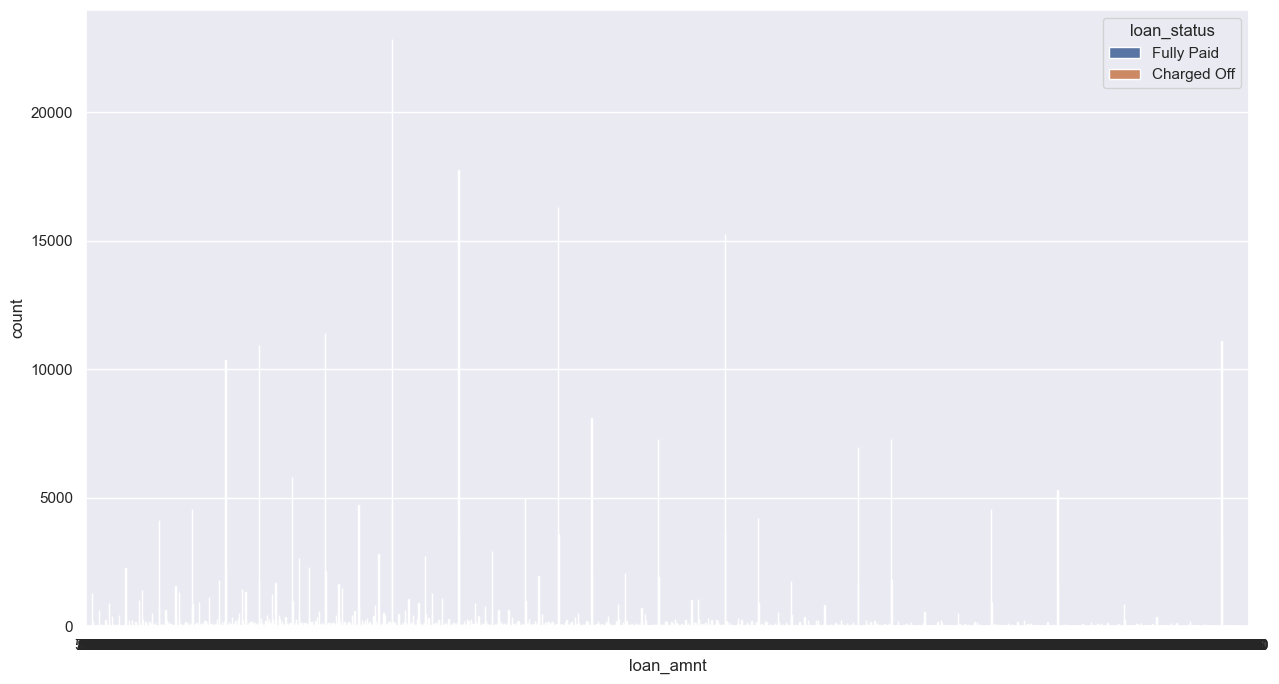

In [23]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='loan_amnt', hue="loan_status", data=df)
plt.show()

In [24]:
# !pip install hvplot

In [25]:
import hvplot.pandas
df['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count',
    width=500, height=350
)

:Bars   [loan_status]   (count)

In [26]:

installment = df.hvplot.hist(
    y='installment', by='loan_status', subplots=False,
    width=350, height=400, bins=50, alpha=0.4,
    title="Installment by Loan Status",
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = df.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False,
    width=350, height=400, bins=30, alpha=0.4,
    title="Loan Amount by Loan Status",
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [27]:
loan_amnt_box = df.hvplot.box(
    y='loan_amnt', subplots=True, by='loan_status', width=300, height=350,
    title="Loan Status by Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = df.hvplot.box(
    y='installment', subplots=True, by='loan_status', width=300, height=350,
    title="Loan Status by Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

C:\Users\0420\AppData\Local\Temp\ipykernel_13648\3002966878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])


<Axes: xlabel='loan_amnt', ylabel='Density'>

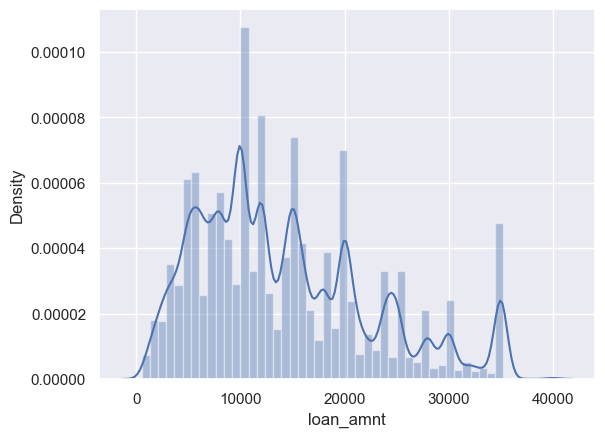

In [28]:
#  distribution plot for loan_amnt column
sns.distplot(df['loan_amnt'])

**Most of the people applied the loan for 10000 rupees.**

C:\Users\0420\AppData\Local\Temp\ipykernel_13648\1849681890.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['int_rate'])


<Axes: xlabel='int_rate', ylabel='Density'>

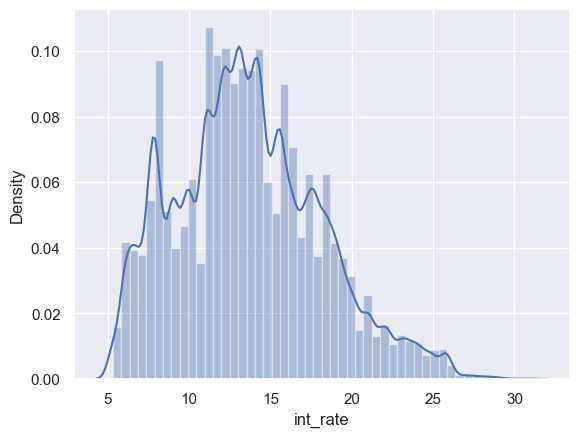

In [29]:
#  distribution plot for int_rate column
sns.distplot(df['int_rate'])

**Intrest rate for maximum loan is 10-15%**

C:\Users\0420\AppData\Local\Temp\ipykernel_13648\1526466801.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['installment'])


<Axes: xlabel='installment', ylabel='Density'>

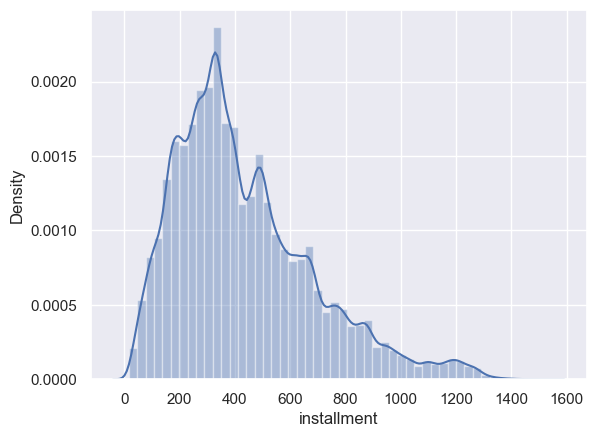

In [30]:
#  distribution plot for instllment column
sns.distplot(df['installment'])

**From the above it is clearly seen that the installment amount for most of the person is 200-500 rupees**

C:\Users\0420\AppData\Local\Temp\ipykernel_13648\33338738.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['annual_inc'])


<Axes: xlabel='annual_inc', ylabel='Density'>

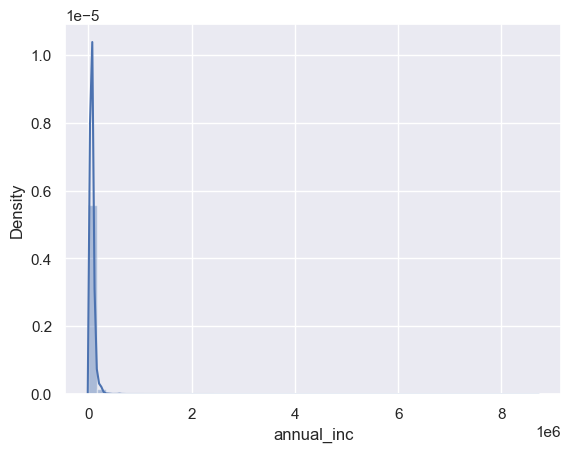

In [31]:
#  distribution plot for annual_inc column
sns.distplot(df['annual_inc'])

C:\Users\0420\AppData\Local\Temp\ipykernel_13648\3385503122.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['revol_bal'])


<Axes: xlabel='revol_bal', ylabel='Density'>

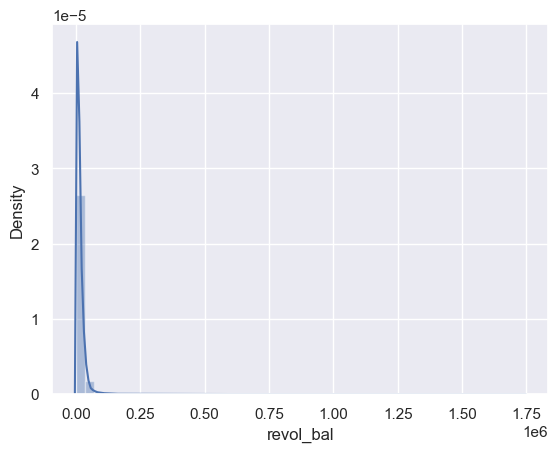

In [32]:
#  distribution plot for revol_bal column
sns.distplot(df['revol_bal'])

C:\Users\0420\AppData\Local\Temp\ipykernel_13648\320986088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['revol_util'])


<Axes: xlabel='revol_util', ylabel='Density'>

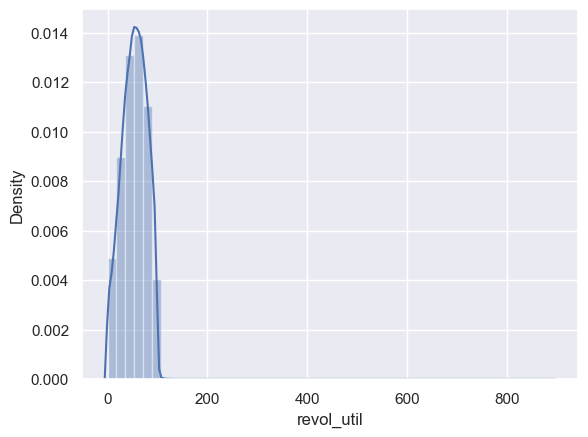

In [33]:
#  distribution plot for revol_util column
sns.distplot(df['revol_util'])

C:\Users\0420\AppData\Local\Temp\ipykernel_13648\3315205959.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_acc'])


<Axes: xlabel='total_acc', ylabel='Density'>

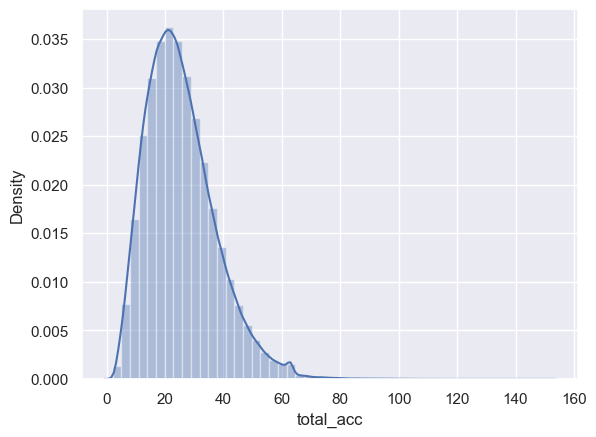

In [34]:
#  distribution plot for total_acc column
sns.distplot(df['total_acc'])

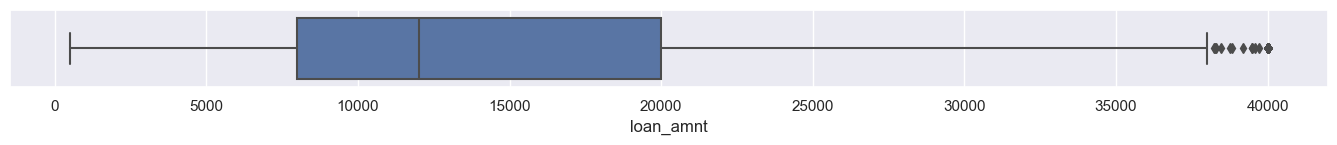

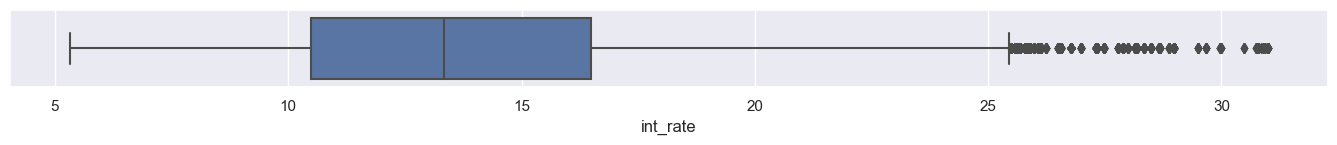

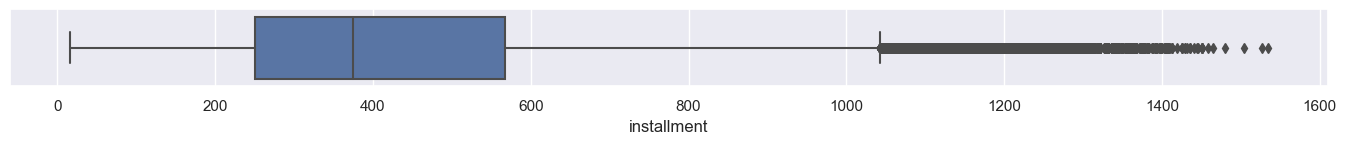

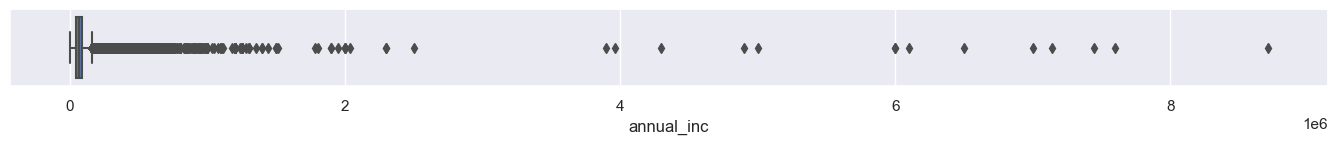

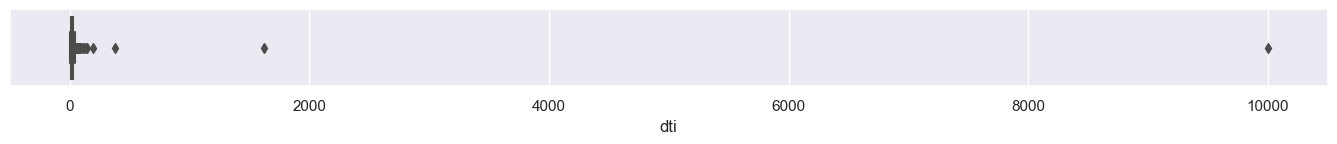

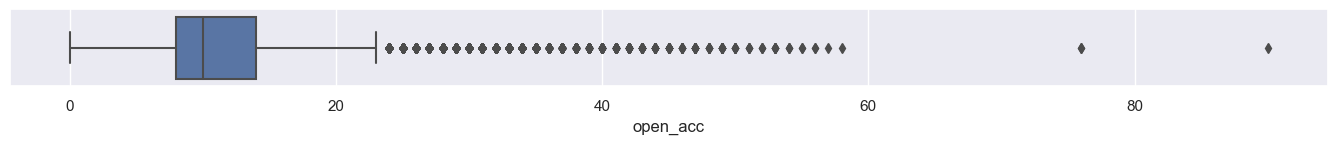

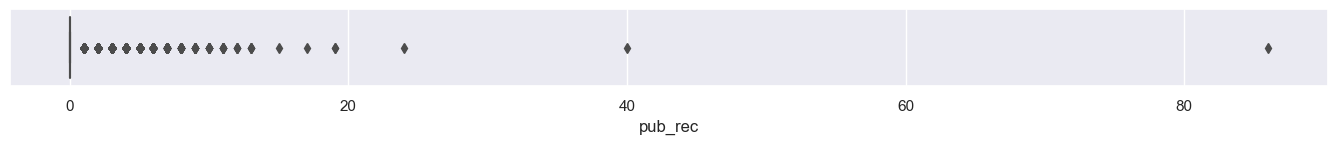

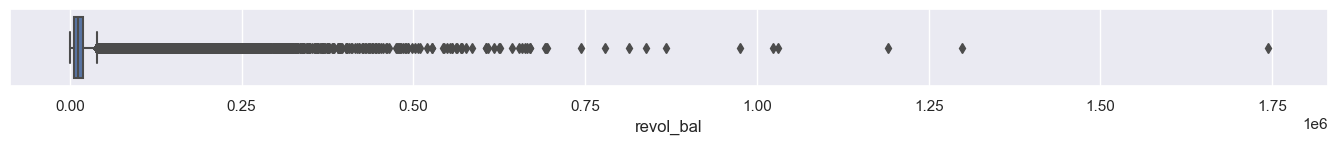

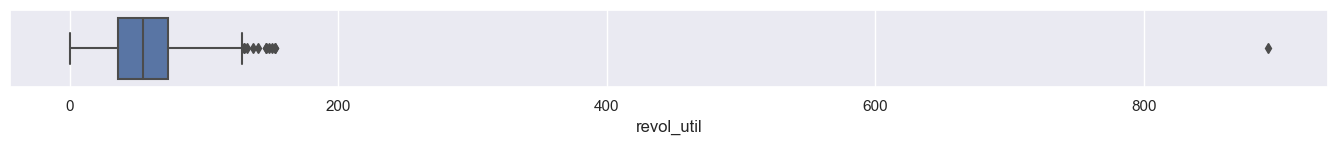

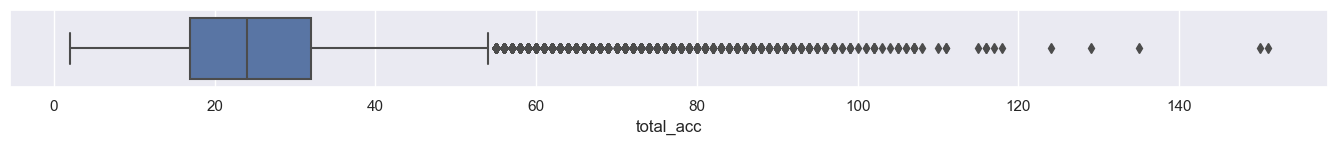

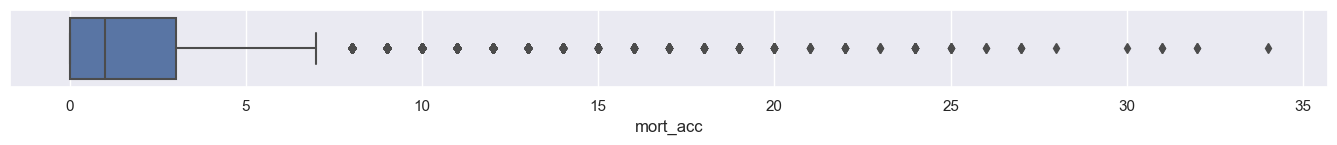

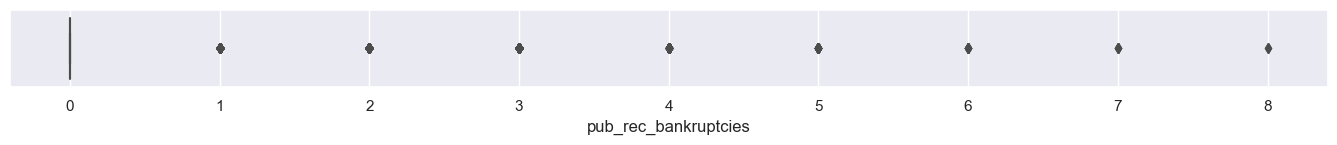

In [35]:
# Univariate Analysis
#Printing boxplot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

C:\Users\0420\AppData\Local\Temp\ipykernel_13648\1747525221.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


<Figure size 1700x100 with 0 Axes>

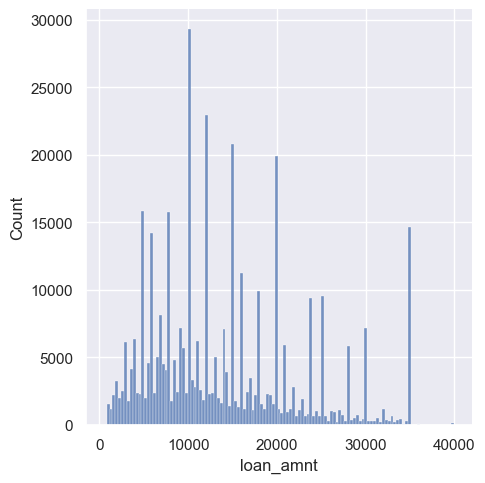

<Figure size 1700x100 with 0 Axes>

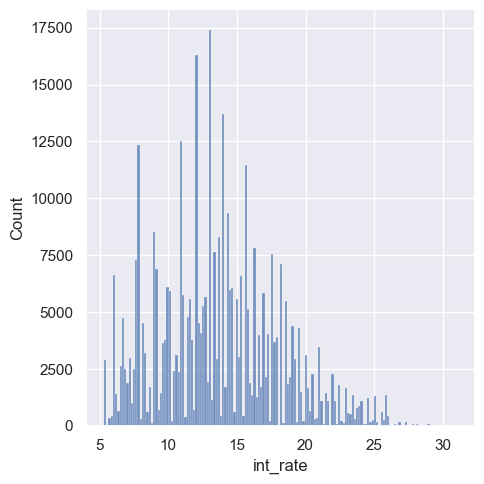

<Figure size 1700x100 with 0 Axes>

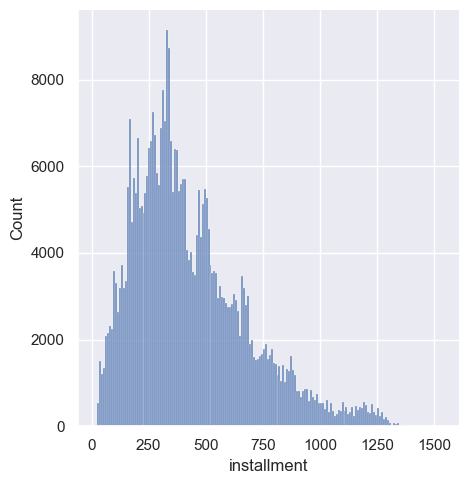

<Figure size 1700x100 with 0 Axes>

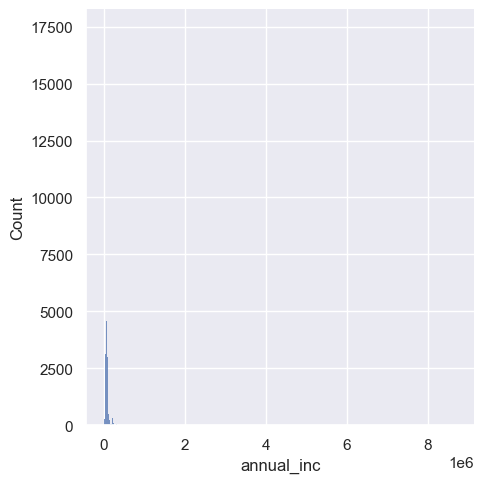

<Figure size 1700x100 with 0 Axes>

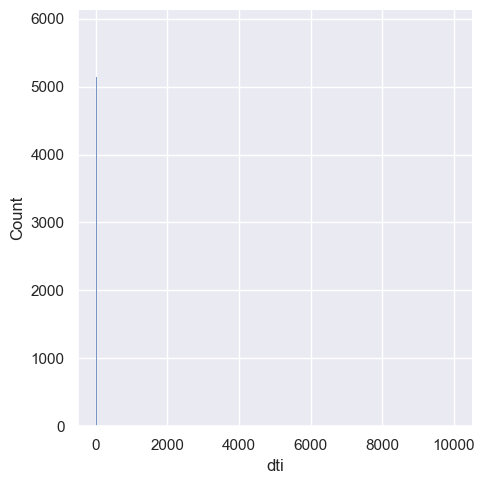

<Figure size 1700x100 with 0 Axes>

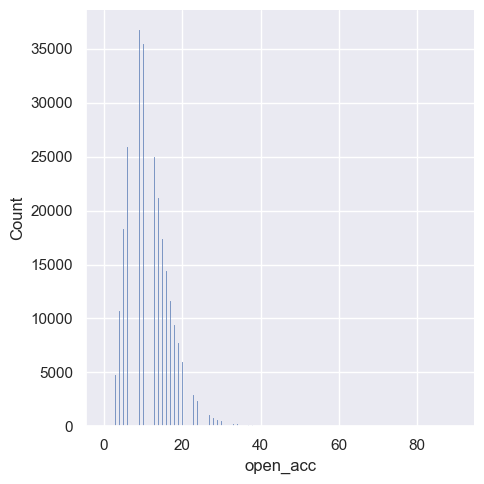

<Figure size 1700x100 with 0 Axes>

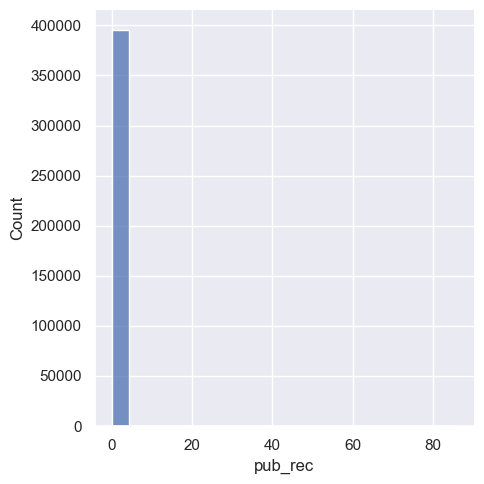

<Figure size 1700x100 with 0 Axes>

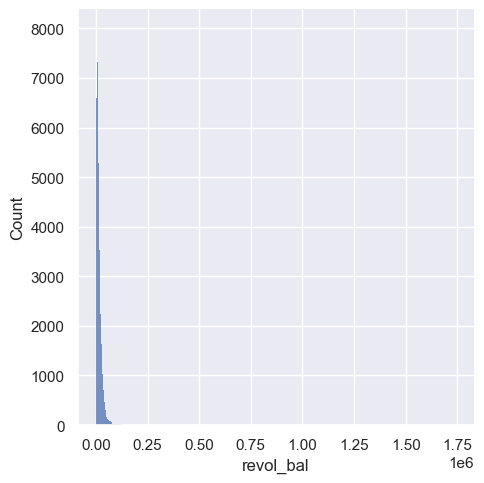

<Figure size 1700x100 with 0 Axes>

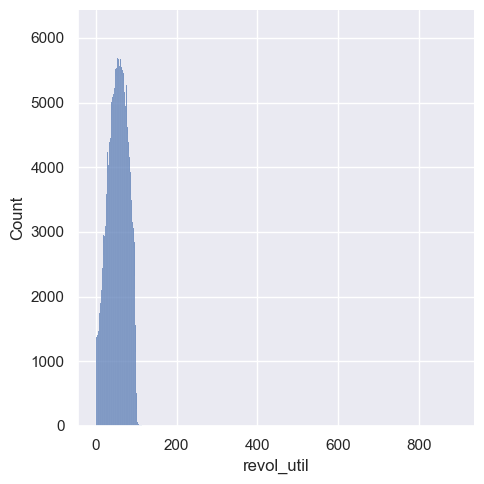

<Figure size 1700x100 with 0 Axes>

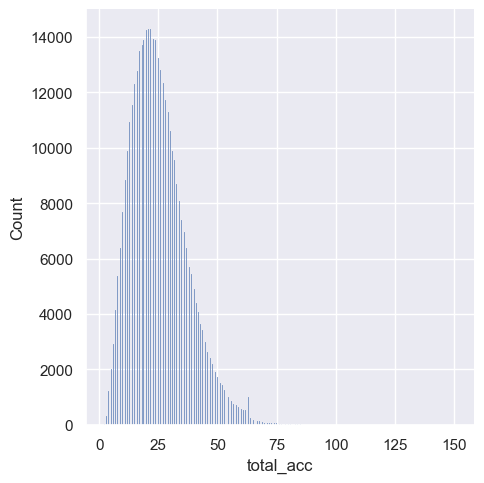

<Figure size 1700x100 with 0 Axes>

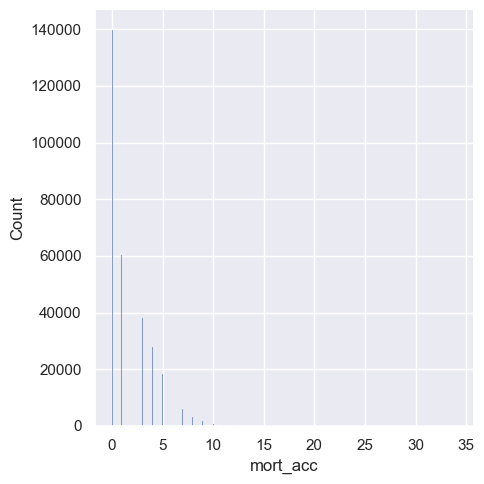

<Figure size 1700x100 with 0 Axes>

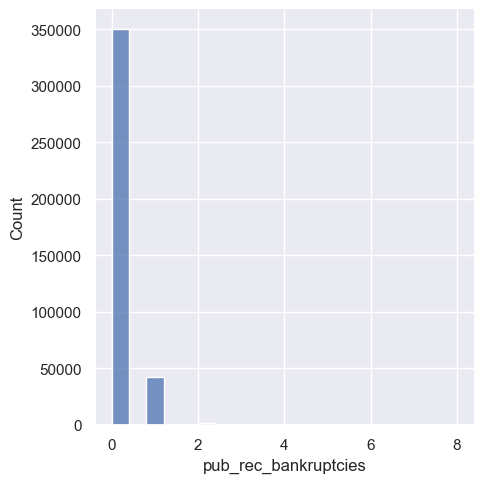

In [36]:
#Printing displot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

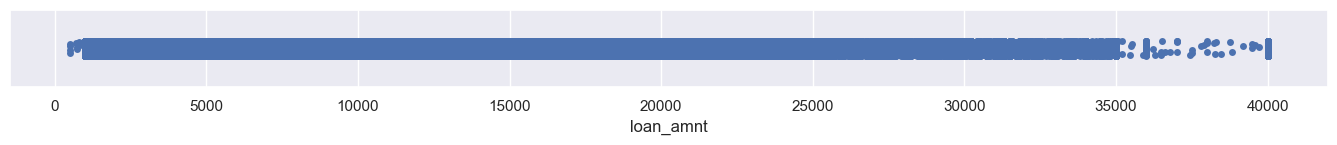

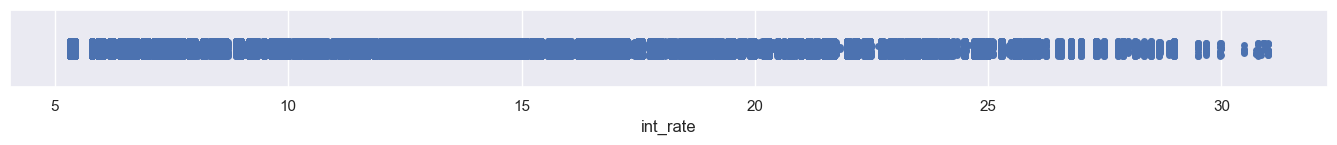

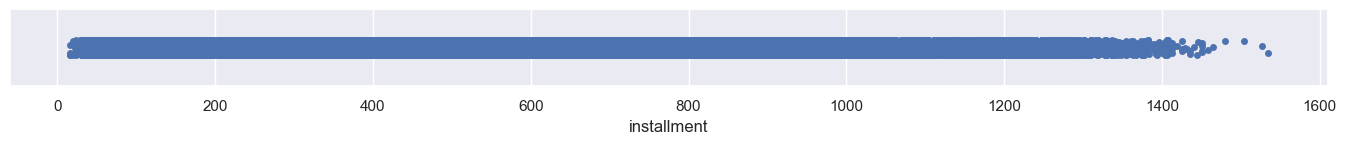

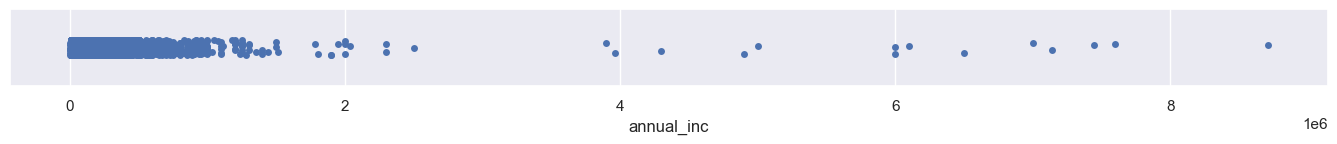

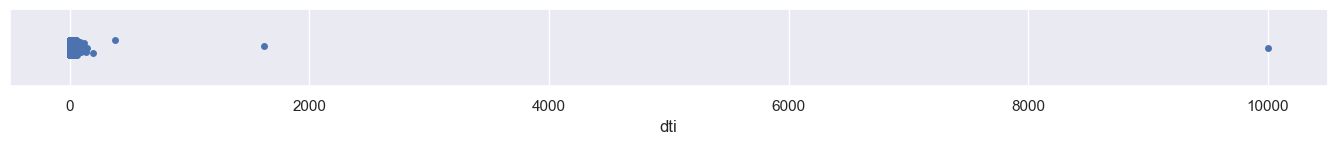

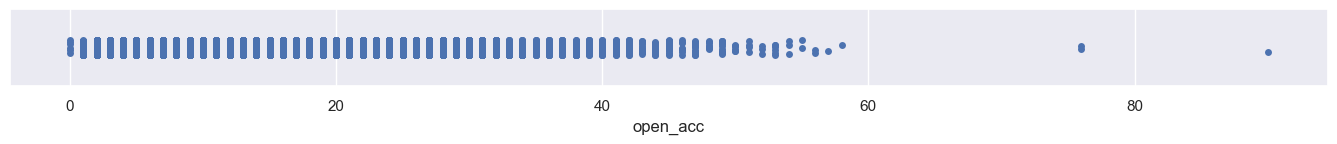

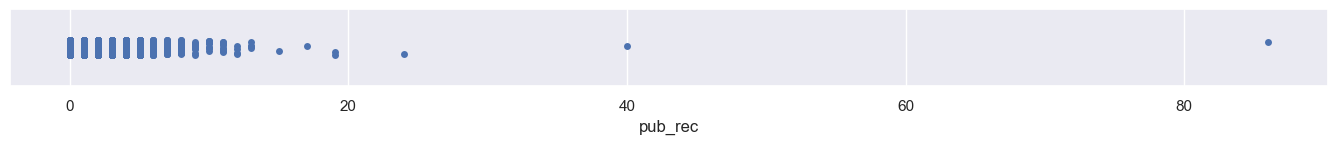

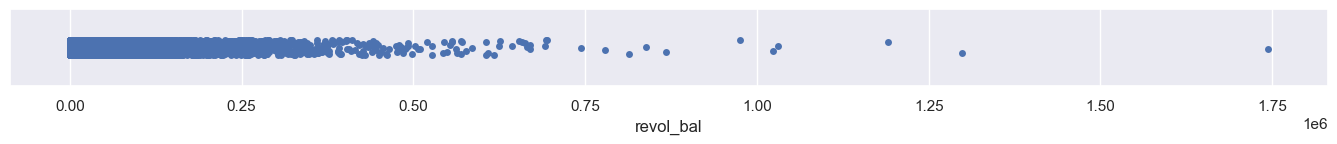

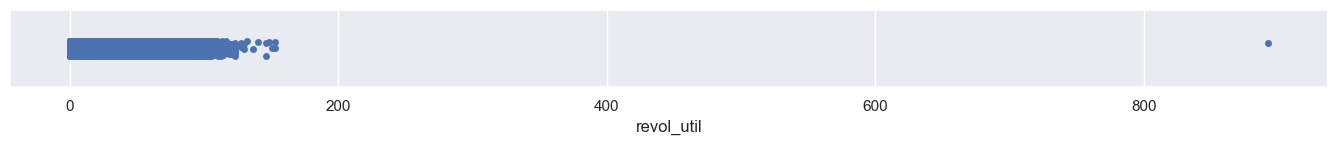

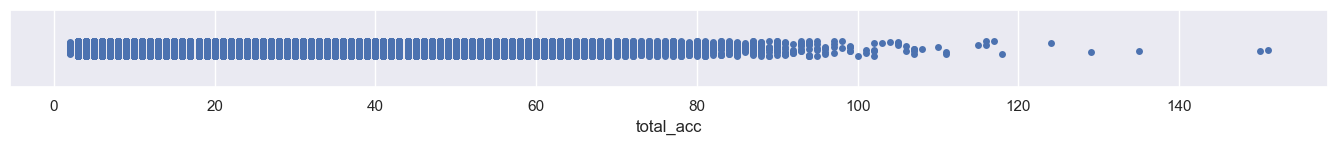

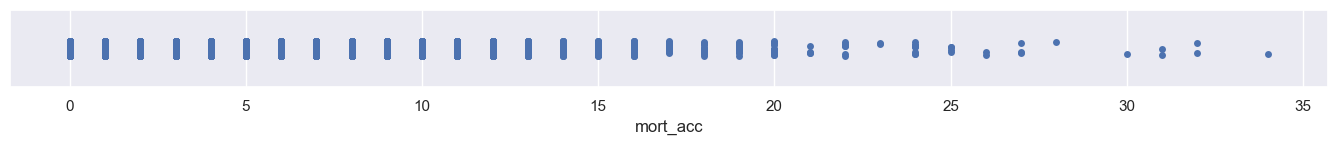

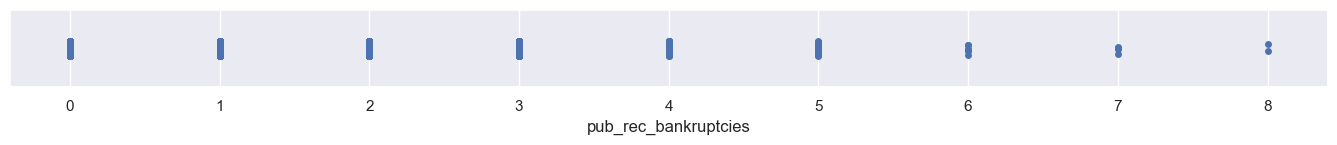

In [37]:
#Printing strip plot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

In [38]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0      10000   36 months     11.44       329.48     B        B4   
1       8000   36 months     11.99       265.68     B        B5   
2      15600   36 months     10.49       506.97     B        B3   
3       7200   36 months      6.49       220.65     A        A2   
4      24375   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0       16       0     36369       41.8        25                    w   
1       17       0     20131       53.3        27                    f   
2       13       0     11987       92.2        26                    f   
3        6       0      5472       21.5        13                    f   
4       13       0     24584       69.8        43                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [39]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [40]:
# ## plot the Correlation matrix
# plt.figure(figsize=(17,8))
# correlation=df.corr()
# sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'open_acc'}>],
       [<Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>]], dtype=object)

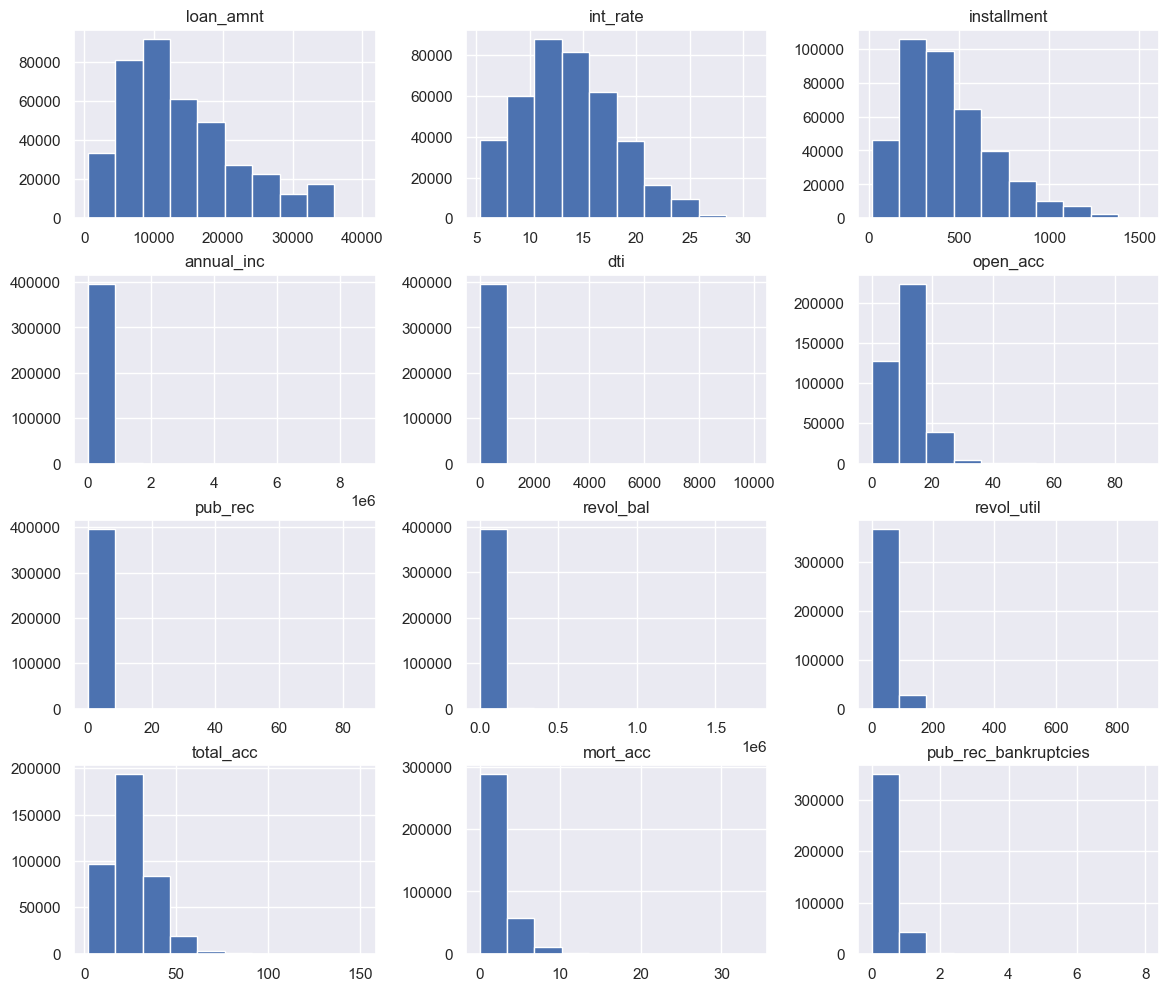

In [41]:
df.hist(figsize = (14,12)) #shows graphically the value counts of each column

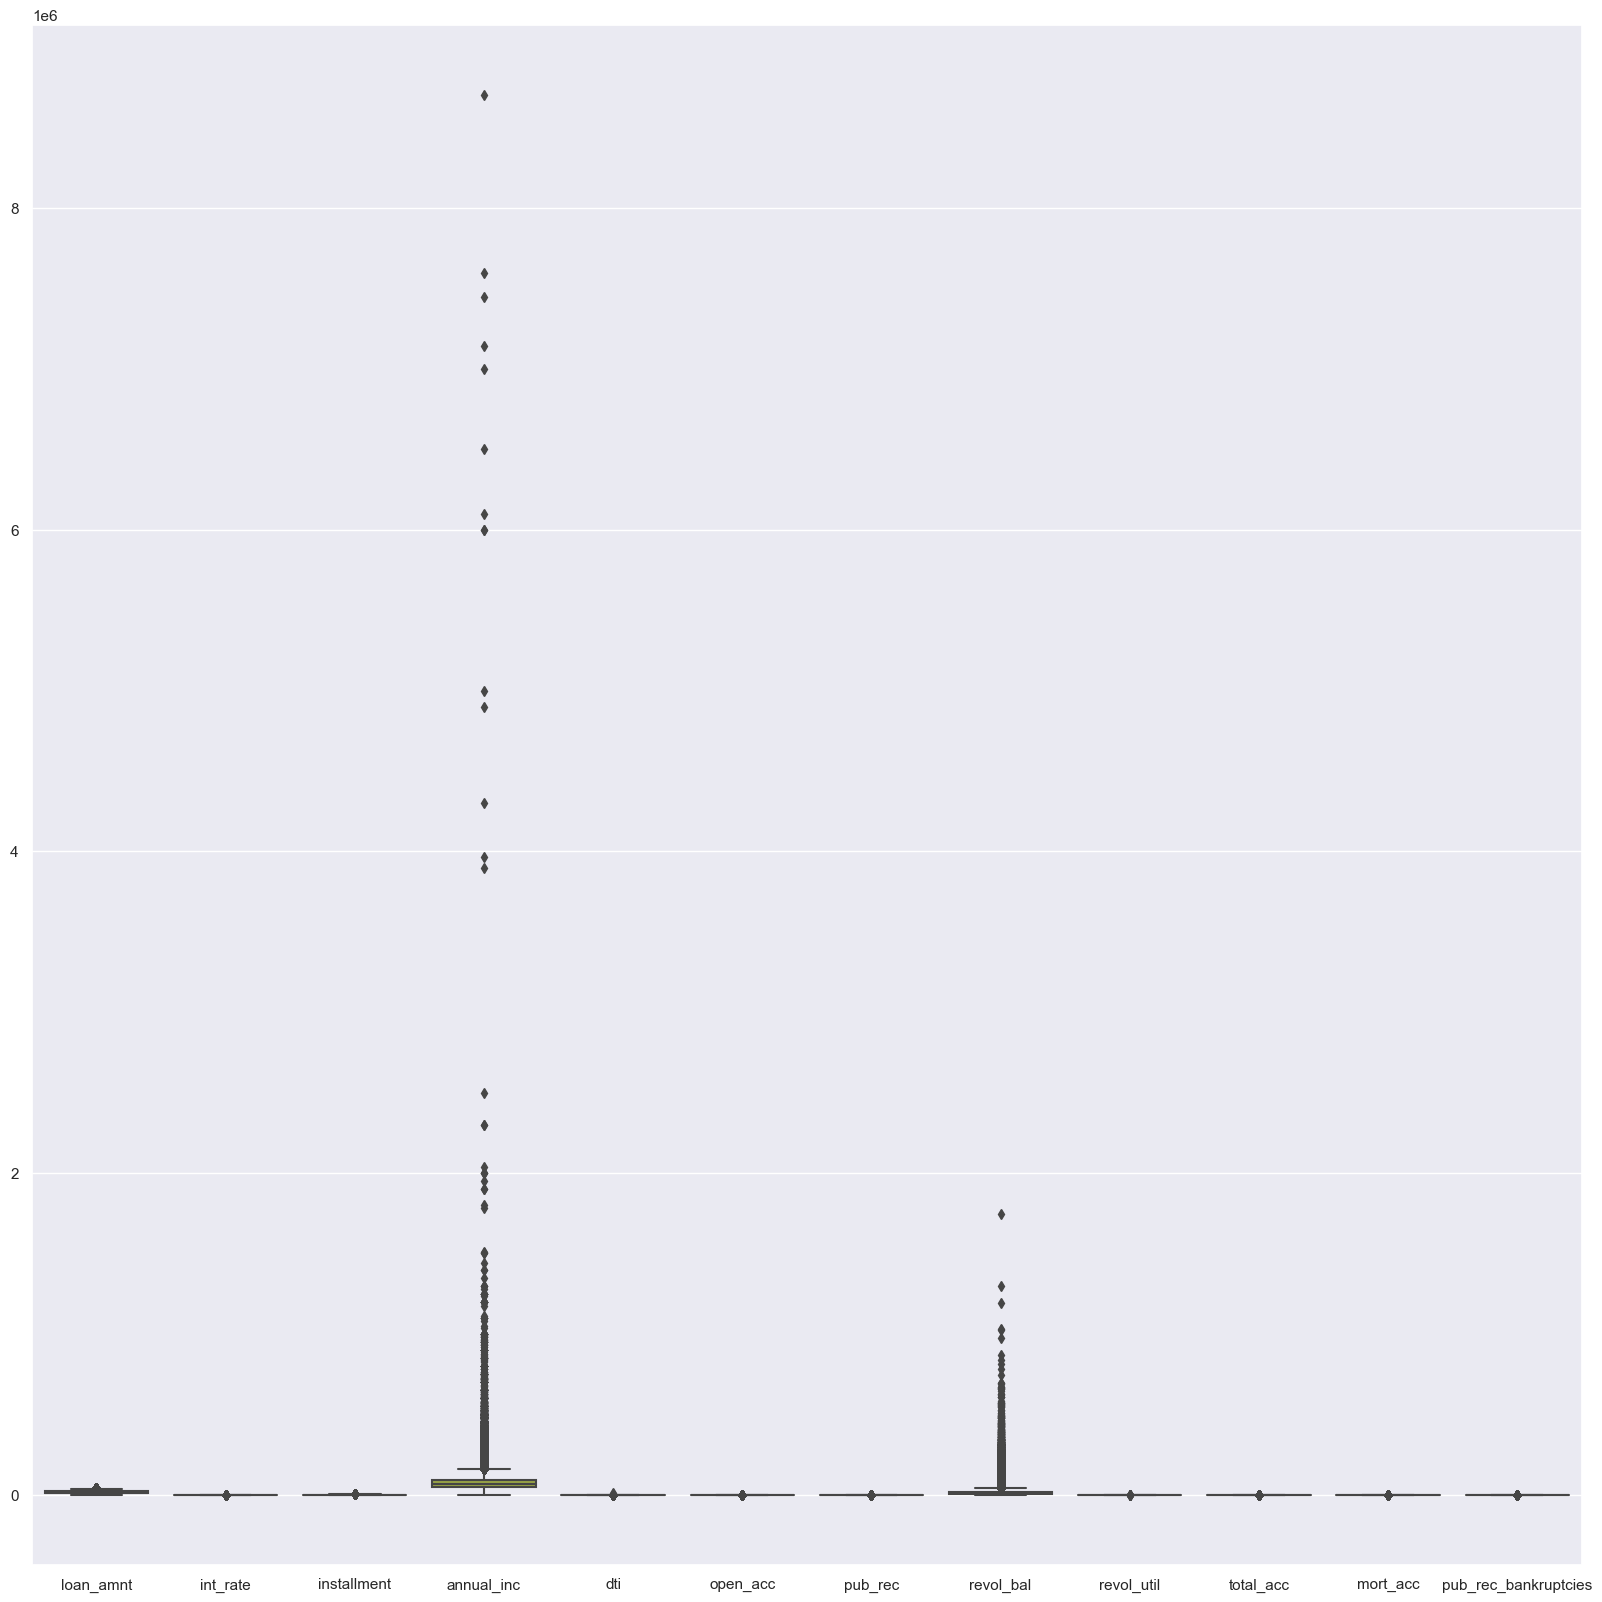

In [42]:
#box plot
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

# **Data Preprocessing**

#### **Missing Value Imputation**

In [43]:
#checking for the null values in the dataset
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [44]:
df.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

**Let's impute the missing values in our dataset**

In [45]:
df['emp_title'].fillna(df['emp_title'].mode()[0], inplace = True)
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace = True)
df['title'].fillna(df['title'].mode()[0], inplace = True)

In [46]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].mean())
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mean())

In [47]:
print("After the null value imputation the number of missing value count is :")
df.isnull().sum()

After the null value imputation the number of missing value count is :


loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

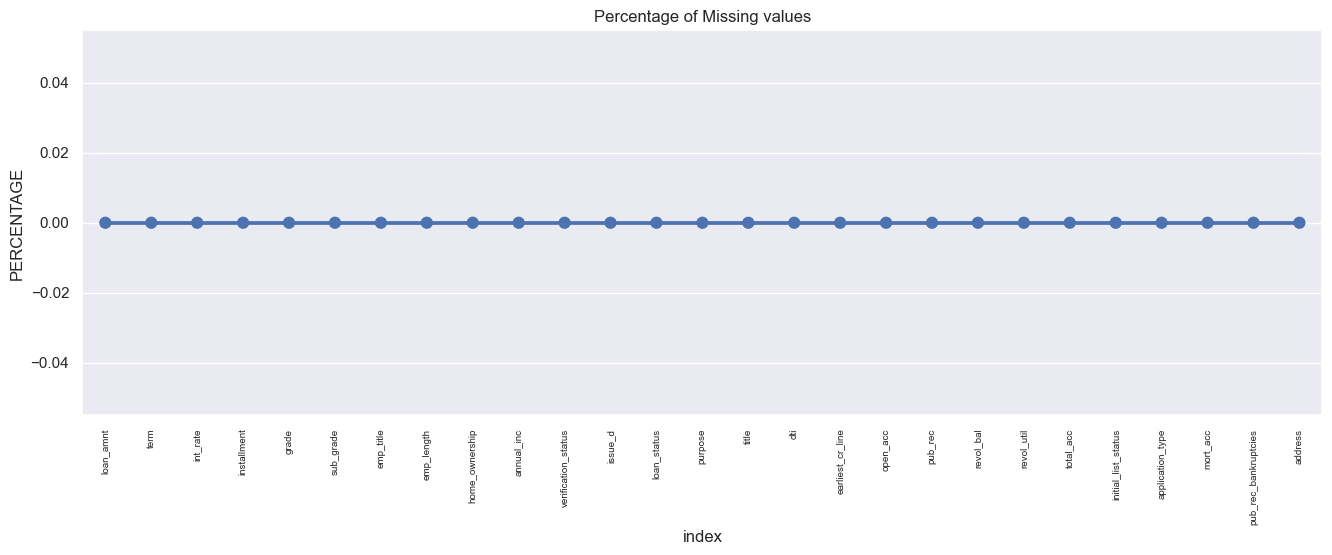

In [48]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

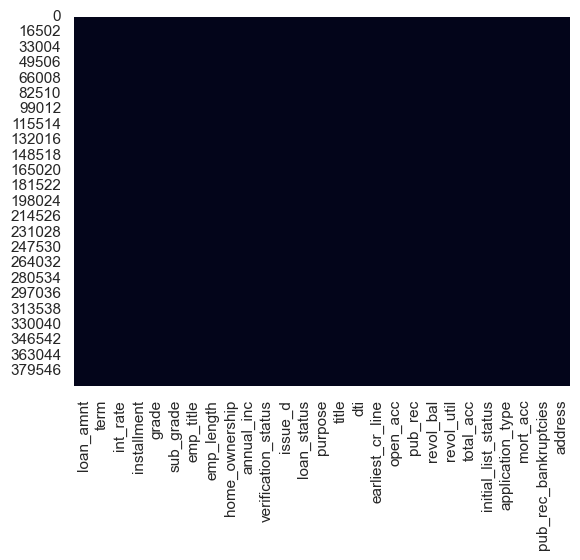

In [49]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

**After Null value Imputation there are no missing value present in our data.**

#### **Labelencoding of Categorical Features**

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
df['term'] = le.fit_transform(df['term'])
df['grade'] = le.fit_transform(df['grade'])
df['sub_grade'] = le.fit_transform(df['sub_grade'])
df['emp_title'] = le.fit_transform(df['emp_title'])
df['emp_length'] = le.fit_transform(df['emp_length'])
df['home_ownership'] = le.fit_transform(df['home_ownership'])
df['verification_status'] = le.fit_transform(df['verification_status'])
df['issue_d'] = le.fit_transform(df['issue_d'])
df['loan_status'] = le.fit_transform(df['loan_status'])
df['purpose'] = le.fit_transform(df['purpose'])
df['title'] = le.fit_transform(df['title'])
df['earliest_cr_line'] = le.fit_transform(df['earliest_cr_line'])
df['initial_list_status'] = le.fit_transform(df['initial_list_status'])
df['application_type'] = le.fit_transform(df['application_type'])
df['address'] = le.fit_transform(df['address'])

In [52]:
df.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
0      10000     0     11.44       329.48      1          8      80954   
1       8000     0     11.99       265.68      1          9      33315   
2      15600     0     10.49       506.97      1          7     127180   
3       7200     0      6.49       220.65      0          1      27758   
4      24375     1     17.27       609.33      2         14      38298   

   emp_length  home_ownership  annual_inc  ...  open_acc  pub_rec  revol_bal  \
0           1               5    117000.0  ...        16        0      36369   
1           4               1     65000.0  ...        17        0      20131   
2          10               5     43057.0  ...        13        0      11987   
3           6               5     54000.0  ...         6        0       5472   
4           9               1     55000.0  ...        13        0      24584   

   revol_util  total_acc  initial_list_status  application_type  mort_acc  \
0        41.8         25                    1                 1       0.0   
1        53.3         27                    0                 1       3.0   
2        92.2         26                    0                 1       0.0   
3        21.5         13                    0                 1       0.0   
4        69.8         43                    0                 1       1.0   

   pub_rec_bankruptcies  address  
0                   0.0     6206  
1                   0.0    38135  
2                   0.0   307942  
3                   0.0   291181  
4                   0.0   240127  

[5 rows x 27 columns]

In [53]:
df.dtypes

loan_amnt                 int64
term                      int32
int_rate                float64
installment             float64
grade                     int32
sub_grade                 int32
emp_title                 int32
emp_length                int32
home_ownership            int32
annual_inc              float64
verification_status       int32
issue_d                   int32
loan_status               int32
purpose                   int32
title                     int32
dti                     float64
earliest_cr_line          int32
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
initial_list_status       int32
application_type          int32
mort_acc                float64
pub_rec_bankruptcies    float64
address                   int32
dtype: object

**Here after applying the Label Encoder all the categorical columns has been converted into numeric.**

#### **Feature Selection**

Let's plot the correlation plot to select the features

<Axes: >

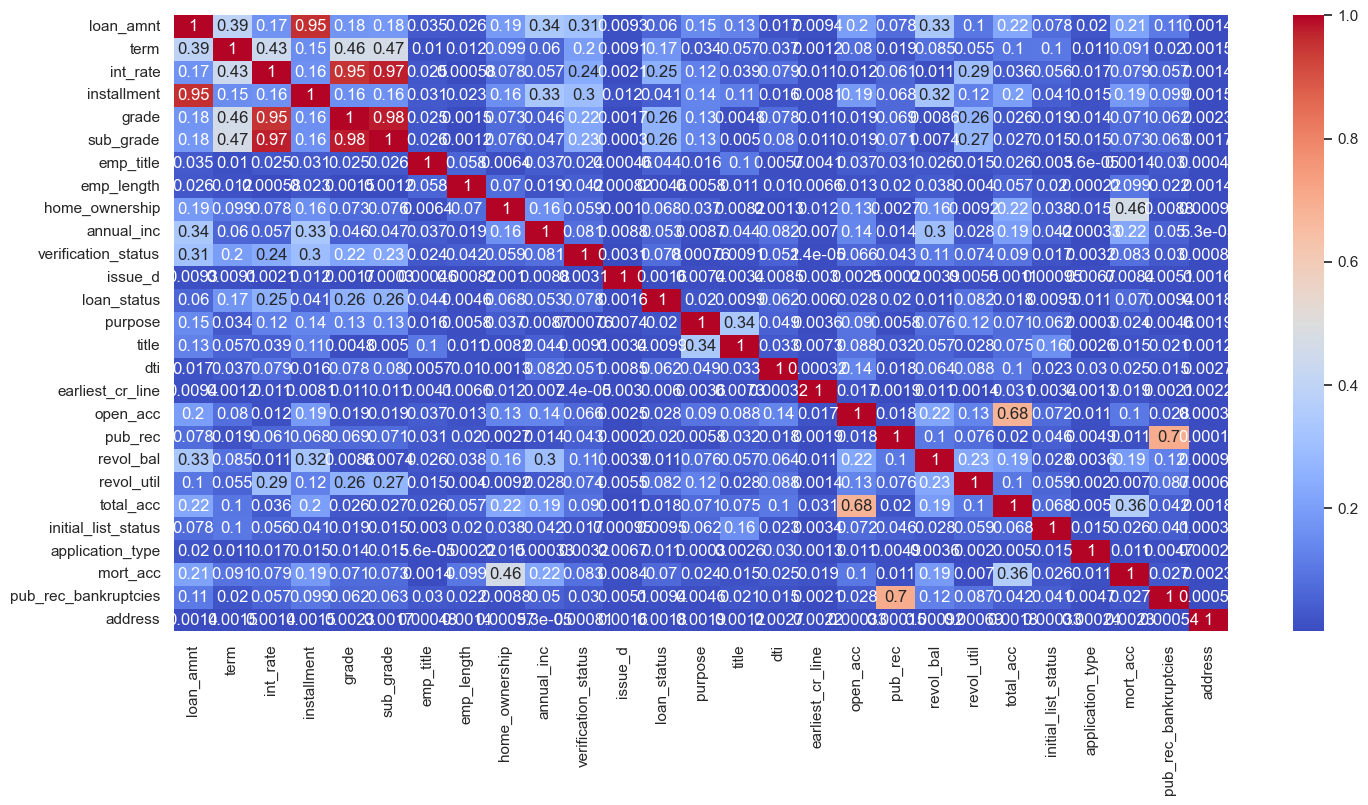

In [54]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Let's save the correlation value in csv format

In [55]:
corr = df.corr()

In [56]:
corr

loan_amnt      term  int_rate  installment     grade  \
loan_amnt              1.000000  0.393862  0.168921     0.953929  0.175198   
term                   0.393862  1.000000  0.434594     0.153378  0.457524   
int_rate               0.168921  0.434594  1.000000     0.162758  0.952473   
installment            0.953929  0.153378  0.162758     1.000000  0.157322   
grade                  0.175198  0.457524  0.952473     0.157322  1.000000   
sub_grade              0.181908  0.468208  0.974217     0.163453  0.977575   
emp_title             -0.035020 -0.010318  0.025344    -0.031353  0.025104   
emp_length            -0.025685 -0.011767 -0.000583    -0.023228 -0.001540   
home_ownership        -0.187771 -0.099195  0.078035    -0.157975  0.072621   
annual_inc             0.336887  0.060330 -0.056771     0.330381 -0.045862   
verification_status    0.310671  0.196390  0.236406     0.296788  0.219524   
issue_d               -0.009260  0.009080  0.002133    -0.012036  0.001679   
loan_status           -0.059836 -0.173246 -0.247758    -0.041082 -0.257286   
purpose               -0.146225 -0.034331  0.122328    -0.135410  0.129869   
title                 -0.126110 -0.056746  0.039425    -0.114390  0.004823   
dti                    0.016636  0.036508  0.079038     0.015786  0.078140   
earliest_cr_line       0.009366  0.001164 -0.011079     0.008104 -0.010649   
open_acc               0.198556  0.079575  0.011649     0.188973  0.019321   
pub_rec               -0.077779 -0.018758  0.060986    -0.067892  0.068778   
revol_bal              0.328320  0.084787 -0.011280     0.316455 -0.008639   
revol_util             0.099862  0.055150  0.293548     0.123851  0.258829   
total_acc              0.223886  0.101346 -0.036404     0.202430 -0.025932   
initial_list_status    0.077743  0.104799 -0.056161     0.040731 -0.018811   
application_type       0.019903  0.010504 -0.017124     0.015213 -0.013820   
mort_acc               0.212167  0.091293 -0.079115     0.185117 -0.071132   
pub_rec_bankruptcies  -0.106477 -0.019822  0.057423    -0.098566  0.061543   
address                0.001405 -0.001525 -0.001391     0.001507 -0.002269   

                      sub_grade  emp_title  emp_length  home_ownership  \
loan_amnt              0.181908  -0.035020   -0.025685       -0.187771   
term                   0.468208  -0.010318   -0.011767       -0.099195   
int_rate               0.974217   0.025344   -0.000583        0.078035   
installment            0.163453  -0.031353   -0.023228       -0.157975   
grade                  0.977575   0.025104   -0.001540        0.072621   
sub_grade              1.000000   0.025928   -0.001189        0.075583   
emp_title              0.025928   1.000000   -0.057522       -0.006383   
emp_length            -0.001189  -0.057522    1.000000        0.070424   
home_ownership         0.075583  -0.006383    0.070424        1.000000   
annual_inc            -0.046798  -0.036773   -0.018821       -0.162512   
verification_status    0.229544   0.024477   -0.041744       -0.058982   
issue_d               -0.000303   0.000464   -0.000820        0.001037   
loan_status           -0.262965  -0.044411   -0.004573       -0.068370   
purpose                0.132865   0.015672    0.005797        0.037094   
title                  0.005031   0.101790   -0.011009        0.008152   
dti                    0.080196   0.005670   -0.010312        0.001286   
earliest_cr_line      -0.010892  -0.004111   -0.006552       -0.012442   
open_acc               0.019105  -0.037194   -0.013034       -0.132056   
pub_rec                0.070811   0.031030   -0.020025        0.002729   
revol_bal             -0.007398  -0.025643   -0.038277       -0.159369   
revol_util             0.269135  -0.014576   -0.003962       -0.009237   
total_acc             -0.026958  -0.026151   -0.056921       -0.222933   
initial_list_status   -0.014506   0.002959   -0.020321       -0.037551   
application_type      -0.014604   0.000056   -0.000224       

In [57]:
# corr.to_csv('correlation.csv')

In [58]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

In [59]:
corr_matrix

loan_amnt      term  int_rate  installment     grade  \
loan_amnt              1.000000  0.393862  0.168921     0.953929  0.175198   
term                   0.393862  1.000000  0.434594     0.153378  0.457524   
int_rate               0.168921  0.434594  1.000000     0.162758  0.952473   
installment            0.953929  0.153378  0.162758     1.000000  0.157322   
grade                  0.175198  0.457524  0.952473     0.157322  1.000000   
sub_grade              0.181908  0.468208  0.974217     0.163453  0.977575   
emp_title              0.035020  0.010318  0.025344     0.031353  0.025104   
emp_length             0.025685  0.011767  0.000583     0.023228  0.001540   
home_ownership         0.187771  0.099195  0.078035     0.157975  0.072621   
annual_inc             0.336887  0.060330  0.056771     0.330381  0.045862   
verification_status    0.310671  0.196390  0.236406     0.296788  0.219524   
issue_d                0.009260  0.009080  0.002133     0.012036  0.001679   
loan_status            0.059836  0.173246  0.247758     0.041082  0.257286   
purpose                0.146225  0.034331  0.122328     0.135410  0.129869   
title                  0.126110  0.056746  0.039425     0.114390  0.004823   
dti                    0.016636  0.036508  0.079038     0.015786  0.078140   
earliest_cr_line       0.009366  0.001164  0.011079     0.008104  0.010649   
open_acc               0.198556  0.079575  0.011649     0.188973  0.019321   
pub_rec                0.077779  0.018758  0.060986     0.067892  0.068778   
revol_bal              0.328320  0.084787  0.011280     0.316455  0.008639   
revol_util             0.099862  0.055150  0.293548     0.123851  0.258829   
total_acc              0.223886  0.101346  0.036404     0.202430  0.025932   
initial_list_status    0.077743  0.104799  0.056161     0.040731  0.018811   
application_type       0.019903  0.010504  0.017124     0.015213  0.013820   
mort_acc               0.212167  0.091293  0.079115     0.185117  0.071132   
pub_rec_bankruptcies   0.106477  0.019822  0.057423     0.098566  0.061543   
address                0.001405  0.001525  0.001391     0.001507  0.002269   

                      sub_grade  emp_title  emp_length  home_ownership  \
loan_amnt              0.181908   0.035020    0.025685        0.187771   
term                   0.468208   0.010318    0.011767        0.099195   
int_rate               0.974217   0.025344    0.000583        0.078035   
installment            0.163453   0.031353    0.023228        0.157975   
grade                  0.977575   0.025104    0.001540        0.072621   
sub_grade              1.000000   0.025928    0.001189        0.075583   
emp_title              0.025928   1.000000    0.057522        0.006383   
emp_length             0.001189   0.057522    1.000000        0.070424   
home_ownership         0.075583   0.006383    0.070424        1.000000   
annual_inc             0.046798   0.036773    0.018821        0.162512   
verification_status    0.229544   0.024477    0.041744        0.058982   
issue_d                0.000303   0.000464    0.000820        0.001037   
loan_status            0.262965   0.044411    0.004573        0.068370   
purpose                0.132865   0.015672    0.005797        0.037094   
title                  0.005031   0.101790    0.011009        0.008152   
dti                    0.080196   0.005670    0.010312        0.001286   
earliest_cr_line       0.010892   0.004111    0.006552        0.012442   
open_acc               0.019105   0.037194    0.013034        0.132056   
pub_rec                0.070811   0.031030    0.020025        0.002729   
revol_bal              0.007398   0.025643    0.038277        0.159369   
revol_util             0.269135   0.014576    0.003962        0.009237   
total_acc              0.026958   0.026151    0.056921        0.222933   
initial_list_status    0.014506   0.002959    0.020321        0.037551   
application_type       0.014604   0.000056    0.000224       

In [60]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

C:\Users\0420\AppData\Local\Temp\ipykernel_13648\2797590206.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


loan_amnt      term  int_rate  installment     grade  \
loan_amnt                   NaN  0.393862  0.168921     0.953929  0.175198   
term                        NaN       NaN  0.434594     0.153378  0.457524   
int_rate                    NaN       NaN       NaN     0.162758  0.952473   
installment                 NaN       NaN       NaN          NaN  0.157322   
grade                       NaN       NaN       NaN          NaN       NaN   
sub_grade                   NaN       NaN       NaN          NaN       NaN   
emp_title                   NaN       NaN       NaN          NaN       NaN   
emp_length                  NaN       NaN       NaN          NaN       NaN   
home_ownership              NaN       NaN       NaN          NaN       NaN   
annual_inc                  NaN       NaN       NaN          NaN       NaN   
verification_status         NaN       NaN       NaN          NaN       NaN   
issue_d                     NaN       NaN       NaN          NaN       NaN   
loan_status                 NaN       NaN       NaN          NaN       NaN   
purpose                     NaN       NaN       NaN          NaN       NaN   
title                       NaN       NaN       NaN          NaN       NaN   
dti                         NaN       NaN       NaN          NaN       NaN   
earliest_cr_line            NaN       NaN       NaN          NaN       NaN   
open_acc                    NaN       NaN       NaN          NaN       NaN   
pub_rec                     NaN       NaN       NaN          NaN       NaN   
revol_bal                   NaN       NaN       NaN          NaN       NaN   
revol_util                  NaN       NaN       NaN          NaN       NaN   
total_acc                   NaN       NaN       NaN          NaN       NaN   
initial_list_status         NaN       NaN       NaN          NaN       NaN   
application_type            NaN       NaN       NaN          NaN       NaN   
mort_acc                    NaN       NaN       NaN          NaN       NaN   
pub_rec_bankruptcies        NaN       NaN       NaN          NaN       NaN   
address                     NaN       NaN       NaN          NaN       NaN   

                      sub_grade  emp_title  emp_length  home_ownership  \
loan_amnt              0.181908   0.035020    0.025685        0.187771   
term                   0.468208   0.010318    0.011767        0.099195   
int_rate               0.974217   0.025344    0.000583        0.078035   
installment            0.163453   0.031353    0.023228        0.157975   
grade                  0.977575   0.025104    0.001540        0.072621   
sub_grade                   NaN   0.025928    0.001189        0.075583   
emp_title                   NaN        NaN    0.057522        0.006383   
emp_length                  NaN        NaN         NaN        0.070424   
home_ownership              NaN        NaN         NaN             NaN   
annual_inc                  NaN        NaN         NaN             NaN   
verification_status         NaN        NaN         NaN             NaN   
issue_d                     NaN        NaN         NaN             NaN   
loan_status                 NaN        NaN         NaN             NaN   
purpose                     NaN        NaN         NaN             NaN   
title                       NaN        NaN         NaN             NaN   
dti                         NaN        NaN         NaN             NaN   
earliest_cr_line            NaN        NaN         NaN             NaN   
open_acc                    NaN        NaN         NaN             NaN   
pub_rec                     NaN        NaN         NaN             NaN   
revol_bal                   NaN        NaN         NaN             NaN   
revol_util                  NaN        NaN         NaN             NaN   
total_acc                   NaN        NaN         NaN             NaN   
initial_list_status         NaN        NaN         NaN             NaN   
application_type            NaN        NaN         NaN       

In [61]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.30)]

In [62]:
to_drop


['term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'annual_inc',
 'verification_status',
 'title',
 'revol_bal',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

So here as per the correlation values we have selected the above features to train our model

In [63]:

final_data = df[['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'annual_inc', 'verification_status', 'title', 'revol_bal',
                     'total_acc', 'mort_acc', 'pub_rec_bankruptcies','loan_status']]

In [64]:
final_data.head()

term  int_rate  installment  grade  sub_grade  annual_inc  \
0     0     11.44       329.48      1          8    117000.0   
1     0     11.99       265.68      1          9     65000.0   
2     0     10.49       506.97      1          7     43057.0   
3     0      6.49       220.65      0          1     54000.0   
4     1     17.27       609.33      2         14     55000.0   

   verification_status  title  revol_bal  total_acc  mort_acc  \
0                    0  36943      36369         25       0.0   
1                    0  12929      20131         27       3.0   
2                    1  10163      11987         26       0.0   
3                    0  10163       5472         13       0.0   
4                    2   9272      24584         43       1.0   

   pub_rec_bankruptcies  loan_status  
0                   0.0            1  
1                   0.0            1  
2                   0.0            1  
3                   0.0            1  
4                   0.0            0

In [65]:
final_data.shape

(396030, 13)

In [66]:
final_data.columns

Index(['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'annual_inc',
       'verification_status', 'title', 'revol_bal', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_status'],
      dtype='object')

#### **Splitting of data into train and test**

In [67]:
x = final_data.drop(['loan_status'], axis=1)
y = final_data['loan_status']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,stratify=y, random_state= 42)

In [69]:
x_test

term  int_rate  installment  grade  sub_grade  annual_inc  \
23128      0     12.99       673.79      2         10     80000.0   
218503     0     18.25       798.12      3         17     84840.0   
298012     1     16.24       711.38      2         14     65000.0   
218185     0      7.90       125.17      0          3     14700.0   
243494     1     26.57       579.84      5         29     54000.0   
...      ...       ...          ...    ...        ...         ...   
274299     0      9.76       900.33      1          5     75000.0   
193796     0     13.33       379.16      2         12     74000.0   
45257      0     17.76       180.17      3         15     63180.0   
338012     0     12.29       667.06      2         10     48000.0   
379965     0      9.99       387.15      1          7     29120.0   

        verification_status  title  revol_bal  total_acc  mort_acc  \
23128                     2  12929       9802         37       1.0   
218503                    1  12929       3400         16       1.0   
298012                    2  10163      28182         30       3.0   
218185                    2   5639        561         18       0.0   
243494                    0  12929      20863         20       1.0   
...                     ...    ...        ...        ...       ...   
274299                    2   2727      24707         35       0.0   
193796                    2  12929      13337         30       1.0   
45257                     2  41083       4368         27       0.0   
338012                    1  10163      18854         24       2.0   
379965                    0  24078       3471          9       0.0   

        pub_rec_bankruptcies  
23128                    0.0  
218503                   0.0  
298012                   0.0  
218185                   1.0  
243494                   0.0  
...                      ...  
274299                   0.0  
193796                   0.0  
45257                    0.0  
338012                   0.0  
379965                   0.0  

[118809 rows x 12 columns]

In [70]:
y_test

23128     0
218503    0
298012    1
218185    0
243494    1
         ..
274299    1
193796    1
45257     1
338012    1
379965    1
Name: loan_status, Length: 118809, dtype: int32

# **Model Building**

### **Unsupervised Machine Learning**

#### **K-Means Clustering**

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [72]:
# df = data

In [73]:
df1

loan_amnt  int_rate  installment  annual_inc    dti  open_acc  \
0           10000     11.44       329.48    117000.0  26.24        16   
1            8000     11.99       265.68     65000.0  22.05        17   
2           15600     10.49       506.97     43057.0  12.79        13   
3            7200      6.49       220.65     54000.0   2.60         6   
4           24375     17.27       609.33     55000.0  33.95        13   
...           ...       ...          ...         ...    ...       ...   
396025      10000     10.99       217.38     40000.0  15.63         6   
396026      21000     12.29       700.42    110000.0  21.45         6   
396027       5000      9.99       161.32     56500.0  17.56        15   
396028      21000     15.31       503.02     64000.0  15.88         9   
396029       2000     13.61        67.98     42996.0   8.32         3   

        pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
0             0      36369        41.8         25       0.0   
1             0      20131        53.3         27       3.0   
2             0      11987        92.2         26       0.0   
3             0       5472        21.5         13       0.0   
4             0      24584        69.8         43       1.0   
...         ...        ...         ...        ...       ...   
396025        0       1990        34.3         23       0.0   
396026        0      43263        95.7          8       1.0   
396027        0      32704        66.9         23       0.0   
396028        0      15704        53.8         20       5.0   
396029        0       4292        91.3         19       NaN   

        pub_rec_bankruptcies  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
...                      ...  
396025                   0.0  
396026                   0.0  
396027                   0.0  
396028                   0.0  
396029                   0.0  

[396030 rows x 12 columns]

In [74]:
df1.head()

loan_amnt  int_rate  installment  annual_inc    dti  open_acc  pub_rec  \
0      10000     11.44       329.48    117000.0  26.24        16        0   
1       8000     11.99       265.68     65000.0  22.05        17        0   
2      15600     10.49       506.97     43057.0  12.79        13        0   
3       7200      6.49       220.65     54000.0   2.60         6        0   
4      24375     17.27       609.33     55000.0  33.95        13        0   

   revol_bal  revol_util  total_acc  mort_acc  pub_rec_bankruptcies  
0      36369        41.8         25       0.0                   0.0  
1      20131        53.3         27       3.0                   0.0  
2      11987        92.2         26       0.0                   0.0  
3       5472        21.5         13       0.0                   0.0  
4      24584        69.8         43       1.0                   0.0

In [75]:
df1.isnull().sum()

loan_amnt                   0
int_rate                    0
installment                 0
annual_inc                  0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [76]:
# df1['emp_title'].fillna(df1['emp_title'].mode()[0], inplace = True)
# df1['emp_length'].fillna(df1['emp_length'].mode()[0], inplace = True)
# df1['title'].fillna(df1['title'].mode()[0], inplace = True)

In [77]:
df1['revol_util'] = df1['revol_util'].fillna(df1['revol_util'].mean())
df1['mort_acc'] = df1['mort_acc'].fillna(df1['mort_acc'].mean())
df1['pub_rec_bankruptcies'] = df1['pub_rec_bankruptcies'].fillna(df1['pub_rec_bankruptcies'].mean())

In [78]:
# Normalization function
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)
print(x)

        term  int_rate  installment  grade  sub_grade  annual_inc  \
0          0     11.44       329.48      1          8    117000.0   
1          0     11.99       265.68      1          9     65000.0   
2          0     10.49       506.97      1          7     43057.0   
3          0      6.49       220.65      0          1     54000.0   
4          1     17.27       609.33      2         14     55000.0   
...      ...       ...          ...    ...        ...         ...   
396025     1     10.99       217.38      1          8     40000.0   
396026     0     12.29       700.42      2         10    110000.0   
396027     0      9.99       161.32      1          5     56500.0   
396028     1     15.31       503.02      2         11     64000.0   
396029     0     13.61        67.98      2         11     42996.0   

        verification_status  title  revol_bal  total_acc  mort_acc  \
0                         0  36943      36369         25  0.000000   
1                         0  12

In [79]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df1)

In [80]:
df_norm.isnull().sum()

loan_amnt               0
int_rate                0
installment             0
annual_inc              0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [81]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

TWSS

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

[27291.950998246448,
 22426.16796589595,
 18270.277342295572,
 16054.639373058806,
 14634.768171388037,
 13623.089138949214,
 12801.606450307216]

Text(0, 0.5, 'total_within_SS')

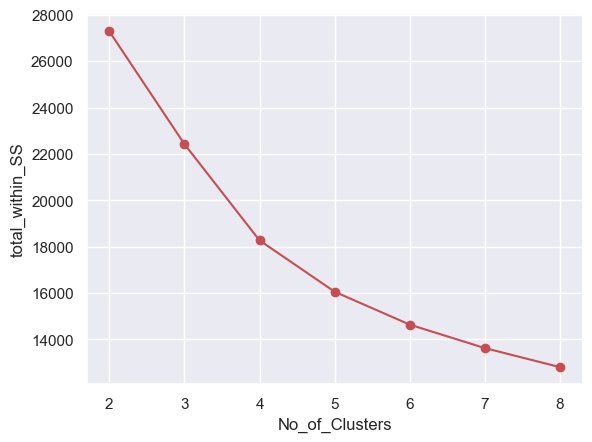

In [82]:
# Scree plot
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [83]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters
model = KMeans(n_clusters = 4)
model.fit(df_norm)

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [84]:
x.isnull().sum()

term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
annual_inc              0
verification_status     0
title                   0
revol_bal               0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [85]:
x['mort_acc'] = x['mort_acc'].fillna(x['mort_acc'].mean())
x['pub_rec_bankruptcies'] = x['pub_rec_bankruptcies'].fillna(x['pub_rec_bankruptcies'].mean())

In [86]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    pred = kmeans.predict(x_test)
    accc_km= accuracy_score(y_test,pred)
    wcss.append(kmeans.inertia_)

In [87]:
print(accc_km*100)

9.782928902692557


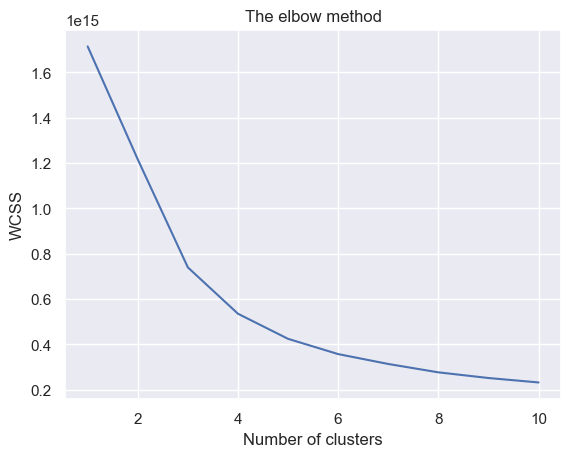

In [88]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [89]:
kmeans = KMeans( n_clusters = 5, init='k-means++')
kmeans.fit(df1)
pred = kmeans.predict(df1)

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [90]:
frame = pd.DataFrame(df1)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
0    234798
3    135990
4     24239
2       989
1        14
Name: count, dtype: int64

#### **Principle Component Analysis**

In [91]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [92]:
# Normalizing the numerical data
uni_normal = scale(df1)
uni_normal

array([[-4.92243154e-01, -4.91799066e-01, -4.08290710e-01, ...,
        -3.48906099e-02, -8.87964304e-01, -3.41770779e-01],
       [-7.31551148e-01, -3.68815761e-01, -6.62750261e-01, ...,
         1.33360764e-01,  5.80561825e-01, -3.41770779e-01],
       [ 1.77819230e-01, -7.04224774e-01,  2.99609377e-01, ...,
         4.92350772e-02, -8.87964304e-01, -3.41770779e-01],
       ...,
       [-1.09051314e+00, -8.16027778e-01, -1.07897908e+00, ...,
        -2.03141984e-01, -8.87964304e-01, -3.41770779e-01],
       [ 8.23950815e-01,  3.73556188e-01,  2.83855220e-01, ...,
        -4.55519046e-01,  1.55957924e+00, -3.41770779e-01],
       [-1.44947513e+00, -6.57402682e-03, -1.45125579e+00, ...,
        -5.39644733e-01, -3.26078304e-16, -3.41770779e-01]])

In [93]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(uni_normal)

In [94]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.23808993, 0.14923541, 0.13034872, 0.10589044, 0.08552743,
       0.07202388])

In [95]:
# PCA weights
pca.components_
pca.components_[0]

array([ 0.49037306,  0.0687431 ,  0.48205491,  0.31848204,  0.05242259,
        0.30299869, -0.10435586,  0.34265769,  0.08907684,  0.33351157,
        0.25397069, -0.12030947])

In [96]:
# Cumulative variance
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([23.81, 38.73, 51.76, 62.35, 70.9 , 78.1 ])

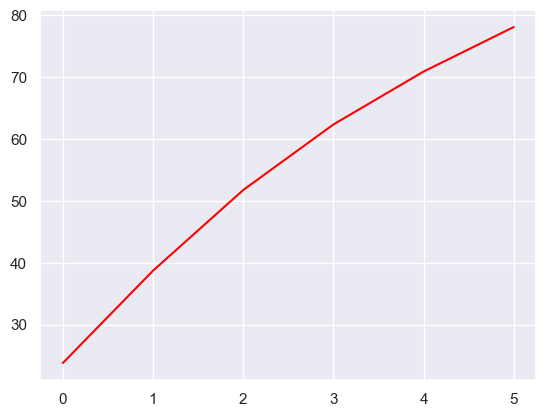

In [97]:
# Variance plot for PCA components obtained
plt.plot(var1, color = "red")

In [98]:
# PCA scores
pca_values

array([[ 0.18827379, -0.05261813, -1.09022229,  0.35771567,  0.20147585,
         0.85988154],
       [-0.06440785,  0.27190219, -1.28133258,  0.56906929,  0.62176437,
        -0.18541114],
       [ 0.05137013, -0.87101137,  0.07196709,  0.44417367,  0.05225159,
        -0.08996829],
       ...,
       [-0.87316436, -0.35482626, -1.08649195,  0.62426043,  0.88889753,
         0.27087087],
       [ 0.69118834, -0.53150576,  0.31350917, -0.51853034,  0.22740434,
        -0.36850068],
       [-2.24795708, -1.22463666,  0.22661464,  0.01696173,  1.56612735,
        -0.8106309 ]])

In [99]:
len(pca_values)

396030

In [100]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5"
final = pd.concat([df, pca_data.iloc[:, 0:5]], axis = 1)

In [101]:
final

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
0           10000     0     11.44       329.48      1          8      80954   
1            8000     0     11.99       265.68      1          9      33315   
2           15600     0     10.49       506.97      1          7     127180   
3            7200     0      6.49       220.65      0          1      27758   
4           24375     1     17.27       609.33      2         14      38298   
...           ...   ...       ...          ...    ...        ...        ...   
396025      10000     1     10.99       217.38      1          8     160363   
396026      21000     0     12.29       700.42      2         10       5777   
396027       5000     0      9.99       161.32      1          5      26144   
396028      21000     1     15.31       503.02      2         11      56710   
396029       2000     0     13.61        67.98      2         11      66735   

        emp_length  home_ownership  annual_inc  ...  initial_list_status  \
0                1               5    117000.0  ...                    1   
1                4               1     65000.0  ...                    0   
2               10               5     43057.0  ...                    0   
3                6               5     54000.0  ...                    0   
4                9               1     55000.0  ...                    0   
...            ...             ...         ...  ...                  ...   
396025           2               5     40000.0  ...                    1   
396026           5               1    110000.0  ...                    0   
396027           1               5     56500.0  ...                    0   
396028           1               1     64000.0  ...                    0   
396029           1               5     42996.0  ...                    0   

        application_type  mort_acc  pub_rec_bankruptcies  address     comp0  \
0                      1  0.000000                   0.0     6206  0.188274   
1                      1  3.000000                   0.0    38135 -0.064408   
2                      1  0.000000                   0.0   307942  0.051370   
3                      1  0.000000                   0.0   291181 -2.170204   
4                      1  1.000000                   0.0   240127  1.719811   
...                  ...       ...                   ...      ...       ...   
396025                 1  0.000000                   0.0    45846 -1.708188   
396026                 1  1.000000                   0.0     4098  0.878571   
396027                 1  0.000000                   0.0   337236 -0.873164   
396028                 1  5.000000                   0.0   277498  0.691188   
396029                 1  1.813991                   0.0   278484 -2.247957   

           comp1     comp2     comp3     comp4  
0      -0.052618 -1.090222  0.357716  0.201476  
1       0.271902 -1.281333  0.569069  0.621764  
2      -0.871011  0.071967  0.444174  0.052252  
3      -0.525793 -1.108979 -1.633609 -0.535666  
4      -0.282074  0.268547  1.517839 -0.485754  
...          ...       ...       ...       ...  
396025 -0.476522 -0.681251 -0.392497 -0.586744  
396026 -2.047729  1.570602 -0.515312  0.981841  
396027 -0.354826 -1.086492  0.624260  0.888898  
396028 -0.531506  0.313509 -0.518530  0.227404  
396029 -1.224637  0.226615  0.016962  1.566127  

[396030 rows x 32 columns]

### **Supervised Machine Learning**

#### **Artificial Neural Network (ANN)**

In [102]:
# !pip install keras

In [103]:
from sklearn.metrics import confusion_matrix
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

**MODEL EVALUATION**

In [104]:
# !pip install numpy --upgrade

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

In [106]:
# !pip install tensorflow==2.13.0

In [107]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import Add, Input, Dense, Dropout

In [108]:
x_train = tf.convert_to_tensor(x_train,  dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

In [109]:
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [110]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [111]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [112]:
History= model.fit(x_train, y_train, batch_size=500, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10


555/555 [==============================] - 3s 3ms/step - loss: 54.2468 - accuracy: 0.8039 - val_loss: 60.5302 - val_accuracy: 0.8039
Epoch 2/10
555/555 [==============================] - 1s 2ms/step - loss: 18.7567 - accuracy: 0.8039 - val_loss: 12.9378 - val_accuracy: 0.8039
Epoch 3/10
555/555 [==============================] - 1s 2ms/step - loss: 17.6686 - accuracy: 0.8039 - val_loss: 9.9990 - val_accuracy: 0.8039
Epoch 4/10
555/555 [==============================] - 1s 2ms/step - loss: 16.5306 - accuracy: 0.8039 - val_loss: 13.8832 - val_accuracy: 0.8039
Epoch 5/10
555/555 [==============================] - 1s 2ms/step - loss: 16.3844 - accuracy: 0.8039 - val_loss: 16.2963 - val_accuracy: 0.8039
Epoch 6/10
555/555 [==============================] - 1s 2ms/step - loss: 16.1066 - accuracy: 0.8039 - val_loss: 12.9357 - val_accuracy: 0.8039
Epoch 7/10
555/555 [==============================] - 1s 2ms/step - loss: 15.6076 - accuracy: 0.8039 - val_loss: 6.2773 - val_accuracy: 0.8039
Epoch

In [113]:
y_pred=model.predict(x_test)

3713/3713 [==============================] - 4s 1ms/step


In [114]:
accc_ann =accuracy_score(y_pred,y_test)

In [115]:
accc_ann

0.803870077182705

In [116]:
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(History.history['loss'], label='Loss')
    plt.plot(History.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(History.history['accuracy'], label='accuracy')
    plt.plot(History.history['val_accuracy'], label='val_accuracy')
    plt.title('accuracy score evolution during trainig')
    plt.legend();

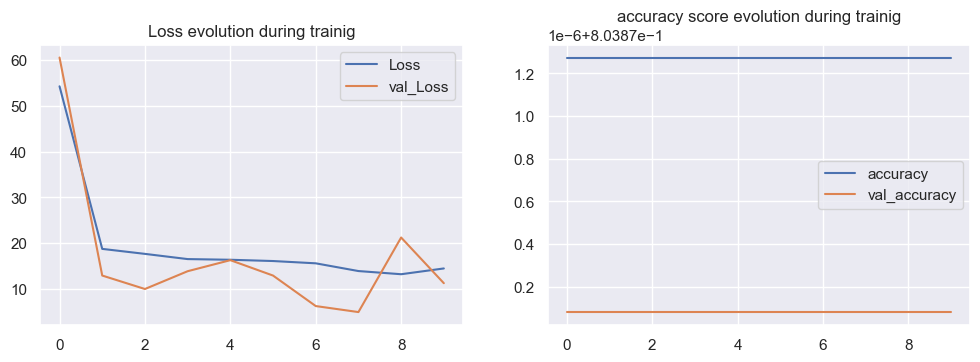

In [117]:
plot_learning_evolution(model)

#### **XGBoost Classifier**

In [118]:
# !pip install xgboost

In [119]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=100)
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)
accc_xgb = accuracy_score(y_test, y_pred)*100
print ("The accuracy obtained by the XGBoost classifier is :",accc_xgb,"%")

The accuracy obtained by the XGBoost classifier is : 80.49642703835568 %


In [120]:
pre_dts = precision_score(y_test, y_pred, average='weighted') * 100
recall_dts = recall_score(y_test, y_pred, average='weighted') * 100
f1_dts = f1_score(y_test, y_pred, average='weighted') * 100
print(pre_dts)
print(recall_dts)
print(f1_dts)

75.55206584649416
80.49642703835568
74.0607680774976


In [121]:
#Printing the Classification report for XGBoost classifier model
print('The classificatin report for XGBoost classifier as follows:')
report  = classification_report(y_pred,y_test)
print(report)

The classificatin report for XGBoost classifier as follows:
              precision    recall  f1-score   support

           0       0.07      0.52      0.13      3254
           1       0.98      0.81      0.89    115555

    accuracy                           0.80    118809
   macro avg       0.53      0.67      0.51    118809
weighted avg       0.96      0.80      0.87    118809



In [122]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

Here is the confusion matrix of the model 
 
 [[ 1692 21610]
 [ 1562 93945]]


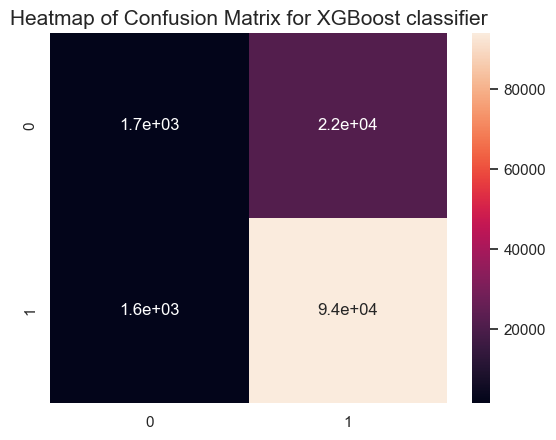

In [123]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for XGBoost classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve

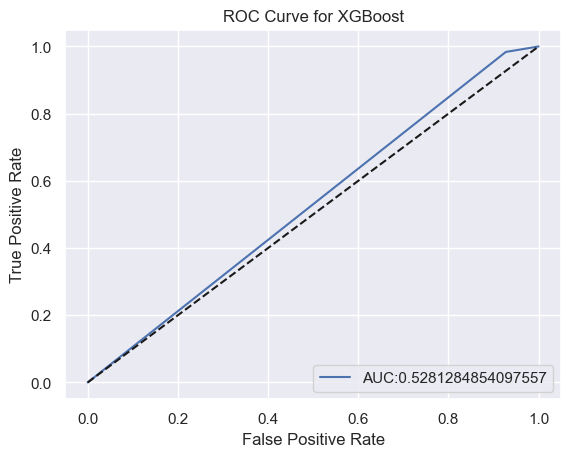

In [125]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

## After applying hyperparameter tuning


In [126]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,stratify=y, random_state= 42)

In [128]:

# Define your pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBClassifier())
])

In [129]:
# Define your hyperparameters for GridSearchCV
params = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.5],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.5, 0.8, 1.0],
    'xgb__colsample_bytree': [0.5, 0.8, 1.0],
    'pca__n_components': [10, 20, 50]
}


In [130]:
# Define your GridSearchCV object
grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [131]:
# Fit your GridSearchCV object to your training data
grid_search.fit(x_train[:100], y_train[:100])

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2430 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      impo...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [10, 20, 50],
                         'xgb__colsample_bytree': [0.5, 0.8, 1.0],
                         'xgb__learning_rate': [0.01, 0.1, 0.5],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 200],
                         'xgb__subsample': [0.5, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [132]:
# Evaluate your model on your test data
y_preds = grid_search.predict(x_test)
accuracy1= accuracy_score(y_test, y_preds)*100
print(f'Test accuracy: {accuracy1:.2f}')


Test accuracy: 77.03


In [133]:
pre_dts1 = precision_score(y_test, y_preds, average='weighted') * 100
recall_dts1 = recall_score(y_test, y_preds, average='weighted') * 100
f1_dts1 = f1_score(y_test, y_preds, average='weighted') * 100
print(pre_dts1)
print(recall_dts1)
print(f1_dts1)

72.14947081428336
77.03035965288825
73.80317755753056


In [134]:
#Printing the Classification report for XGBoost classifier model
print('The classificatin report for XGBoost classifier as follows:')
report  = classification_report(y_preds,y_test)
print(report)

The classificatin report for XGBoost classifier as follows:
              precision    recall  f1-score   support

           0       0.16      0.33      0.22     11498
           1       0.92      0.82      0.87    107311

    accuracy                           0.77    118809
   macro avg       0.54      0.57      0.54    118809
weighted avg       0.85      0.77      0.80    118809



In [135]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_preds)}')

Here is the confusion matrix of the model 
 
 [[ 3755 19547]
 [ 7743 87764]]


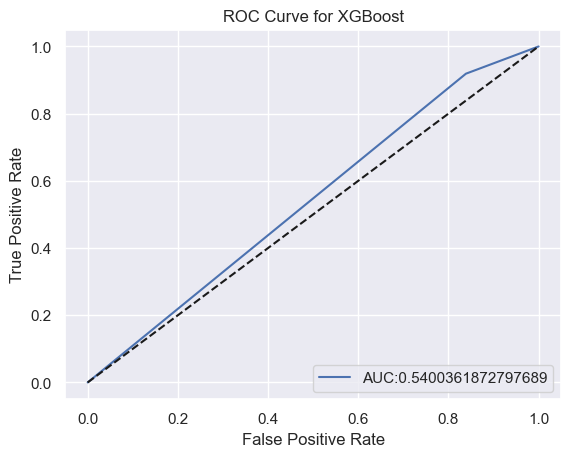

In [136]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_preds)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_preds)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

#### **AdaBoost Classifier**

In [137]:
from sklearn.ensemble import AdaBoostClassifier

adb_classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)
adb_classifier.fit(x_train, y_train)
y_pred1 = adb_classifier.predict(x_test)
accc_adb = accuracy_score(y_test, y_pred1)*100
print ("The accuracy obtained by the AdaBoost classifier is :",accc_adb,"%")

The accuracy obtained by the AdaBoost classifier is : 80.49390197712295 %


In [138]:
pre_dts2 = precision_score(y_test, y_pred1, average='weighted') * 100
recall_dts2 = recall_score(y_test, y_pred1, average='weighted') * 100
f1_dts2 = f1_score(y_test, y_pred1, average='weighted') * 100
print(pre_dts2)
print(recall_dts2)
print(f1_dts2)

75.51966155658401
80.49390197712295
73.21363588485274


In [139]:
#Printing the Classification report for AdaBoost classifier model
print('The classificatin report for AdaBoost classifier as follows:')
report  = classification_report(y_pred1,y_test)
print(report)

The classificatin report for AdaBoost classifier as follows:
              precision    recall  f1-score   support

           0       0.04      0.53      0.08      1929
           1       0.99      0.81      0.89    116880

    accuracy                           0.80    118809
   macro avg       0.52      0.67      0.49    118809
weighted avg       0.98      0.80      0.88    118809



In [140]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred1)}')

Here is the confusion matrix of the model 
 
 [[ 1028 22274]
 [  901 94606]]


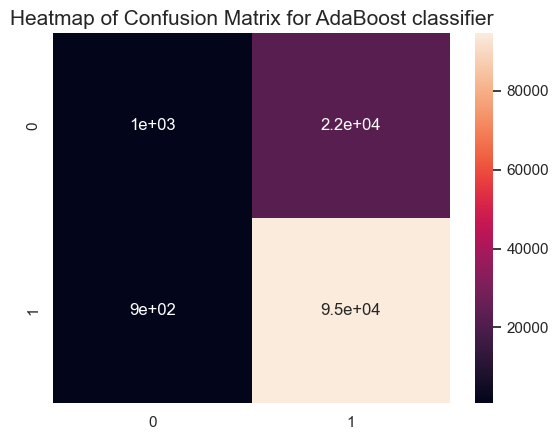

In [141]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred1)
plt.title('Heatmap of Confusion Matrix for AdaBoost classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

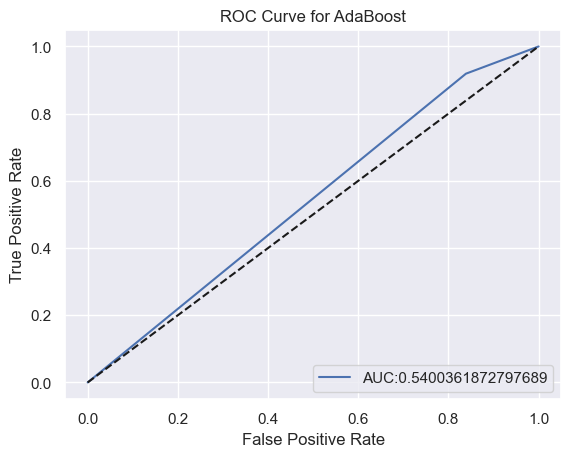

In [142]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_preds)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_preds)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

## After  hyperparameter tuning

In [143]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize your features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create an AdaBoostClassifier
adb_classifier = AdaBoostClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(adb_classifier, param_grid, cv=5)
grid_search.fit(x_train[:100], y_train[:100])

# Get the best model from the grid search
best_adb_classifier = grid_search.best_estimator_

# Fit the best model on the training data
best_adb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred2 = best_adb_classifier.predict(x_test)

# Calculate accuracy
accuracy2 = accuracy_score(y_test[:100], y_pred2[:100]) * 100
print("The accuracy obtained by the AdaBoost classifier is:", accuracy2, "%")


The accuracy obtained by the AdaBoost classifier is: 80.0 %


In [144]:
pre_dts3 = precision_score(y_test, y_pred2, average='weighted') * 100
recall_dts3 = recall_score(y_test, y_pred2, average='weighted') * 100
f1_dts3 = f1_score(y_test, y_pred2, average='weighted') * 100
print(pre_dts3)
print(recall_dts3)
print(f1_dts3)

64.53480956881515
80.33356058884428
71.57271154419537


c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
#Printing the Classification report for AdaBoost classifier model
print('The classificatin report for AdaBoost classifier as follows:')
report  = classification_report(y_pred2,y_test)
print(report)

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classificatin report for AdaBoost classifier as follows:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89     79206

    accuracy                           0.80     79206
   macro avg       0.50      0.40      0.45     79206
weighted avg       1.00      0.80      0.89     79206



c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred2)}')

Here is the confusion matrix of the model 
 
 [[    0 15577]
 [    0 63629]]


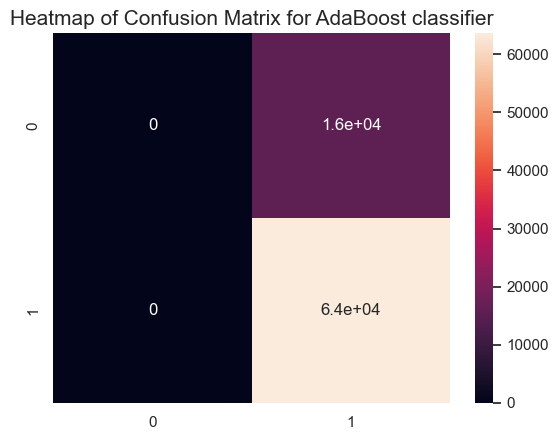

In [147]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred2)
plt.title('Heatmap of Confusion Matrix for AdaBoost classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

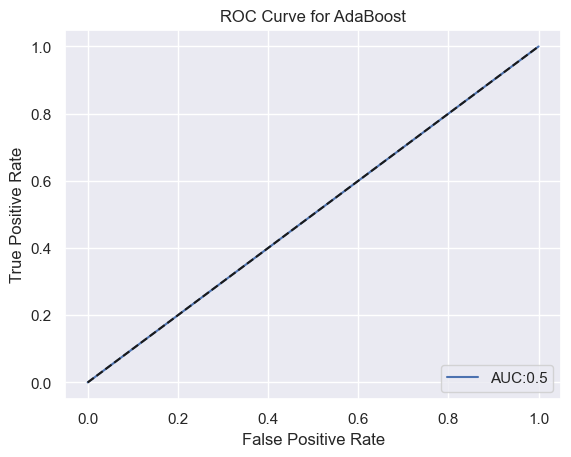

In [148]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred2)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [149]:
# # Evaluate your model on your test data
# y_pred = grid_search_aba.predict(x_test)
# accuracy_aba = accuracy_score(y_test, y_pred)*100
# print(f'Test accuracy: {accuracy_aba:.2f}')


#### **Random Forest Classifier**

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred3 = rf_classifier.predict(x_test)
accc_rf = accuracy_score(y_test, y_pred3)*100
print ("The accuracy obtained by the RandomForestClassifier is :",accc_rf,"%")


The accuracy obtained by the RandomForestClassifier is : 80.01792793475242 %


In [151]:
pre_dts4 = precision_score(y_test, y_pred3, average='weighted') * 100
recall_dts4 = recall_score(y_test, y_pred3, average='weighted') * 100
f1_dts4 = f1_score(y_test, y_pred3, average='weighted') * 100
print(pre_dts4)
print(recall_dts4)
print(f1_dts4)

74.57798463182877
80.01792793475242
74.43943120018787


In [152]:
#Printing the Classification report for  RandomForestClassifier model
print('The classificatin report for  RandomForestClassifier as follows:')
report  = classification_report(y_pred3,y_test)
print(report)

The classificatin report for  RandomForestClassifier as follows:
              precision    recall  f1-score   support

           0       0.10      0.46      0.16      3350
           1       0.97      0.82      0.89     75856

    accuracy                           0.80     79206
   macro avg       0.54      0.64      0.53     79206
weighted avg       0.93      0.80      0.86     79206



param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [153]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred3)}')

Here is the confusion matrix of the model 
 
 [[ 1550 14027]
 [ 1800 61829]]


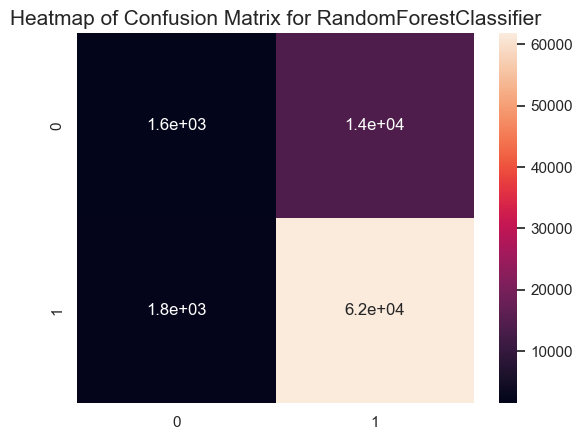

In [154]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred3)
plt.title('Heatmap of Confusion Matrix for RandomForestClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

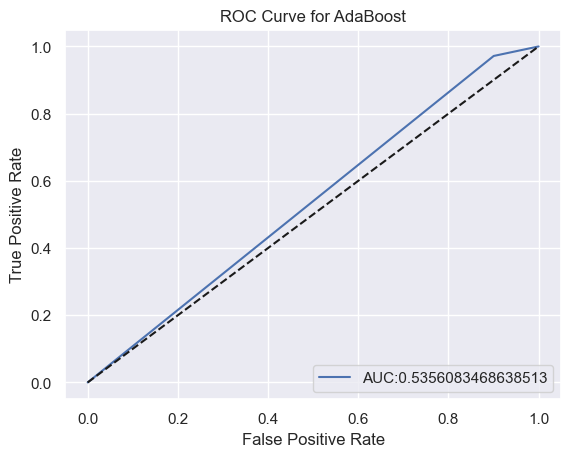

In [155]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred3)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred3)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

## After  hyperparameter tuning

In [156]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train[:100], y_train[:100])

best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(x_train[:100], y_train[:100])
y_pred6 = best_rf_classifier.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred6) * 100
print("The accuracy obtained by the RandomForestClassifier after tuning is:", accuracy3, "%")


The accuracy obtained by the RandomForestClassifier after tuning is: 76.44749135166528 %


In [157]:
pre_dts5 = precision_score(y_test, y_pred6, average='weighted') * 100
recall_dts5 = recall_score(y_test, y_pred6, average='weighted') * 100
f1_dts5 = f1_score(y_test, y_pred6, average='weighted') * 100
print(pre_dts5)
print(recall_dts5)
print(f1_dts5)

72.72522017998165
76.44749135166528
74.12743910680324


In [158]:
#Printing the Classification report for  RandomForestClassifier model
print('The classificatin report for  RandomForestClassifier as follows:')
report  = classification_report(y_pred6,y_test)
print(report)

The classificatin report for  RandomForestClassifier as follows:
              precision    recall  f1-score   support

           0       0.21      0.34      0.26      9494
           1       0.90      0.82      0.86     69712

    accuracy                           0.76     79206
   macro avg       0.55      0.58      0.56     79206
weighted avg       0.82      0.76      0.79     79206



param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [159]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred6)}')

Here is the confusion matrix of the model 
 
 [[ 3208 12369]
 [ 6286 57343]]


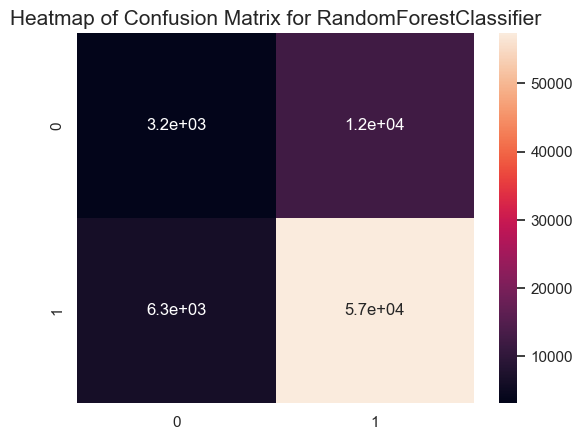

In [160]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred6)
plt.title('Heatmap of Confusion Matrix for RandomForestClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

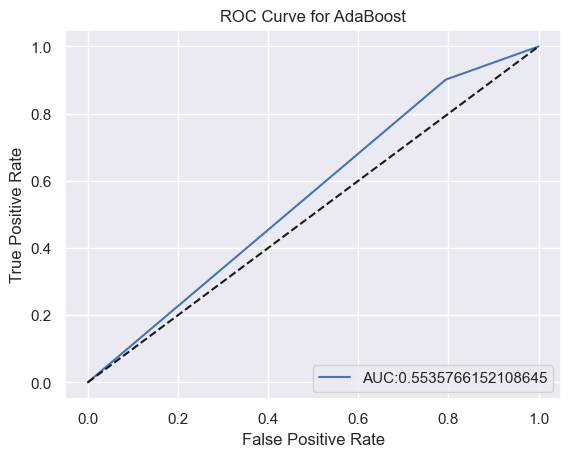

In [161]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred6)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred6)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from tabulate import tabulate
import time

In [163]:


# Store results in a dictionary
results_mlp_best = {
    'Accuracy': accuracy3,
    'Precision': pre_dts5,
    'Recall': recall_dts5,
    'F1_score': f1_dts5,

}

# Display results
print("\nMLP Classifier Results (After Hyperparameter Tuning):")
print(tabulate(results_mlp_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification Report (After Hyperparameter Tuning):')



MLP Classifier Results (After Hyperparameter Tuning):
+-----------+---------+
| Metrics   |   Value |
+===========+=========+
| Accuracy  | 76.4475 |
+-----------+---------+
| Precision | 72.7252 |
+-----------+---------+
| Recall    | 76.4475 |
+-----------+---------+
| F1_score  | 74.1274 |
+-----------+---------+

Classification Report (After Hyperparameter Tuning):


## DecisionTreeClassifier

In [164]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred4 = dt_classifier.predict(x_test)
accc_dt = accuracy_score(y_test, y_pred4)*100
print ("The accuracy obtained by the Decision Tree Classifier is :",accc_dt,"%")

The accuracy obtained by the Decision Tree Classifier is : 70.14872610660808 %


In [165]:
pre_dts6 = precision_score(y_test, y_pred4, average='weighted') * 100
recall_dts6 = recall_score(y_test, y_pred4, average='weighted') * 100
f1_dts6 = f1_score(y_test, y_pred4, average='weighted') * 100
print(pre_dts6)
print(recall_dts6)
print(f1_dts6)

71.26728982221002
70.14872610660808
70.68464795052081


In [166]:
#Printing the Classification report for Decision Tree Classifier model
print('The classificatin report for Decision Tree Classifier as follows:')
report  = classification_report(y_pred4,y_test)
print(report)

The classificatin report for Decision Tree Classifier as follows:
              precision    recall  f1-score   support

           0       0.29      0.27      0.28     17167
           1       0.80      0.82      0.81     62039

    accuracy                           0.70     79206
   macro avg       0.55      0.54      0.54     79206
weighted avg       0.69      0.70      0.70     79206



In [167]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred4)}')

Here is the confusion matrix of the model 
 
 [[ 4550 11027]
 [12617 51012]]


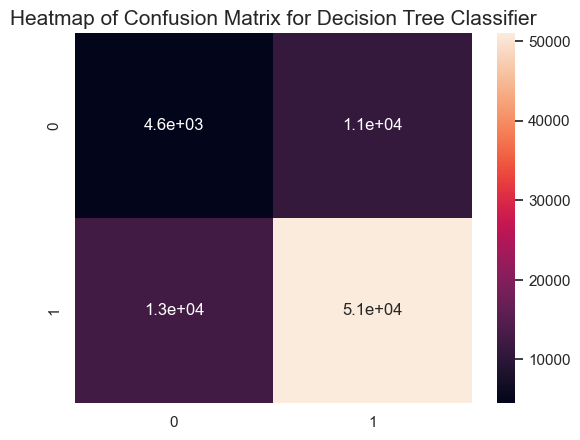

In [168]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred4)
plt.title('Heatmap of Confusion Matrix for Decision Tree Classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

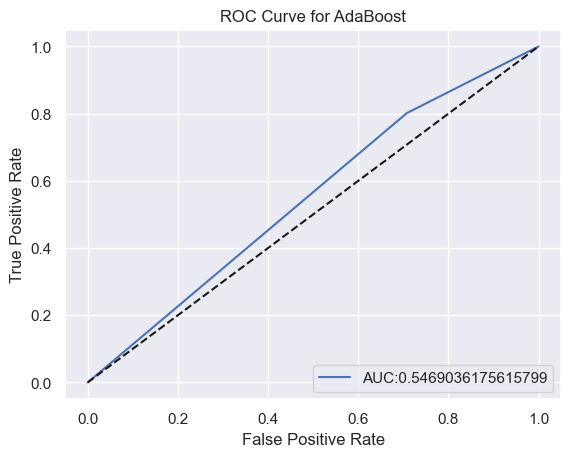

In [169]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred4)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred4)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [170]:
# Store results in a dictionary
results_mlp = {
    'Accuracy': accc_dt,
    'Precision': pre_dts6,
    'Recall': recall_dts6,
    'F1_score': f1_dts6,

}

# Display results
print("MLP Classifier Results (Before Hyperparameter Tuning):")
print(tabulate(results_mlp.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification Report (Before Hyperparameter Tuning):')
# print(report)

MLP Classifier Results (Before Hyperparameter Tuning):
+-----------+---------+
| Metrics   |   Value |
+===========+=========+
| Accuracy  | 70.1487 |
+-----------+---------+
| Precision | 71.2673 |
+-----------+---------+
| Recall    | 70.1487 |
+-----------+---------+
| F1_score  | 70.6846 |
+-----------+---------+

Classification Report (Before Hyperparameter Tuning):


## After  hyperparameter tuning

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Step 1: Data Preprocessing and Feature Engineering
# Ensure your data is loaded and preprocessed appropriately.

# Step 2: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train[:100], y_train[:100])

best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Step 4: Train the Decision Tree Classifier with the best parameters
best_dt_classifier.fit(x_train, y_train)

# Step 5: Make predictions and calculate accuracy
y_pred7 = best_dt_classifier.predict(x_test)
accuracy4 = accuracy_score(y_test, y_pred7) * 100

print("Best Parameters:", best_params)
print("The accuracy obtained by the Decision Tree Classifier is:", accuracy4, "%")


Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
The accuracy obtained by the Decision Tree Classifier is: 71.01987223190163 %


In [172]:
pre_dts7 = precision_score(y_test, y_pred7, average='weighted') * 100
recall_dts7 = recall_score(y_test, y_pred7, average='weighted') * 100
f1_dts7 = f1_score(y_test, y_pred7, average='weighted') * 100
print(pre_dts7)
print(recall_dts7)
print(f1_dts7)

71.53182770120054
71.01987223190163
71.27065944224888


In [173]:
#Printing the Classification report for Decision Tree Classifier model
print('The classificatin report for Decision Tree Classifier as follows:')
report  = classification_report(y_pred7,y_test)
print(report)

The classificatin report for Decision Tree Classifier as follows:
              precision    recall  f1-score   support

           0       0.29      0.27      0.28     16315
           1       0.81      0.82      0.82     62891

    accuracy                           0.71     79206
   macro avg       0.55      0.55      0.55     79206
weighted avg       0.71      0.71      0.71     79206



In [174]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred7)}')

Here is the confusion matrix of the model 
 
 [[ 4469 11108]
 [11846 51783]]


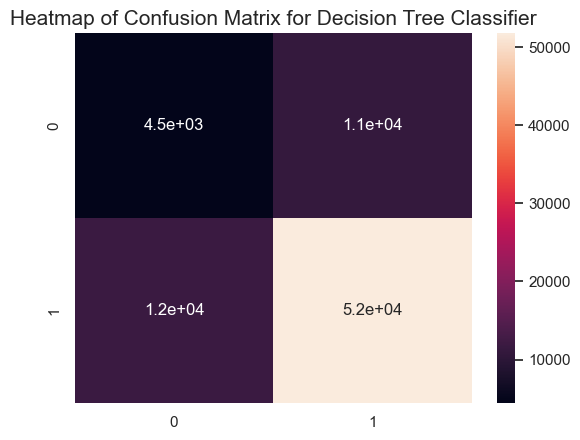

In [175]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred7)
plt.title('Heatmap of Confusion Matrix for Decision Tree Classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

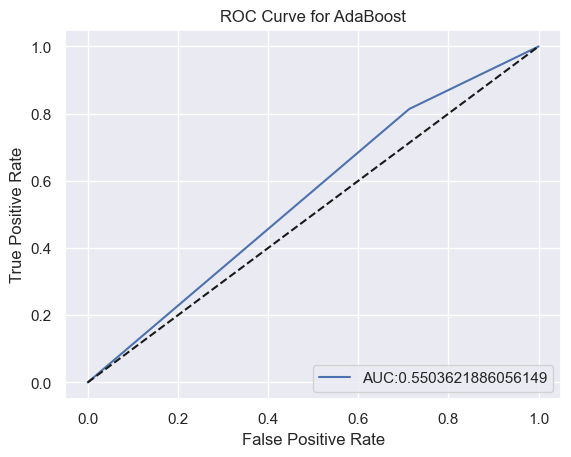

In [176]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred7)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred7)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [177]:
from tabulate import tabulate

In [178]:
# Store results in a dictionary
results_mlp_best = {
    'Accuracy': accuracy4,
    'Precision': pre_dts7,
    'Recall': recall_dts7,
    'F1_score': f1_dts7,

}

# Display results
print("\nMLP Classifier Results (After Hyperparameter Tuning):")
print(tabulate(results_mlp_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification Report (After Hyperparameter Tuning):')


MLP Classifier Results (After Hyperparameter Tuning):
+-----------+---------+
| Metrics   |   Value |
+===========+=========+
| Accuracy  | 71.0199 |
+-----------+---------+
| Precision | 71.5318 |
+-----------+---------+
| Recall    | 71.0199 |
+-----------+---------+
| F1_score  | 71.2707 |
+-----------+---------+

Classification Report (After Hyperparameter Tuning):


In [179]:
graph5 = pd.DataFrame({'Models':['kmeans','ANN','XGBoostClassifier','AdaBoostClassifier',' Random Forest Classifier','DecisionTreeClassifier'],'Accuracy':[19.782929,81.387008,82.030360,81.333561
,82.820458,78.657677]})
graph5

Models   Accuracy
0                     kmeans  19.782929
1                        ANN  81.387008
2          XGBoostClassifier  82.030360
3         AdaBoostClassifier  81.333561
4   Random Forest Classifier  82.820458
5     DecisionTreeClassifier  78.657677

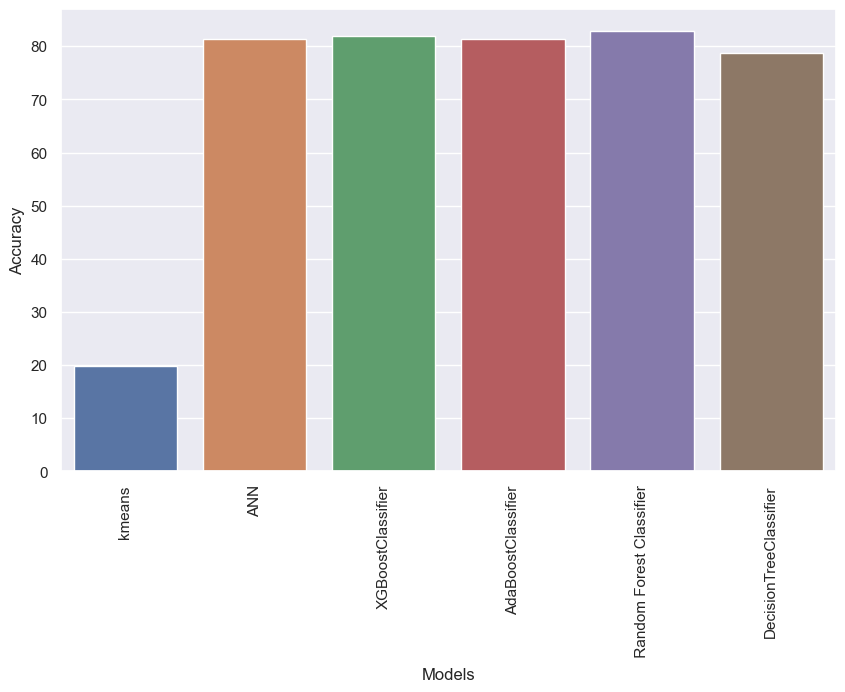

In [180]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph5.Accuracy,x = graph5.Models)
plt.xticks(rotation = 'vertical')
plt.show()

In [181]:
# !pip install plotly

In [182]:
import plotly.graph_objects as go

# Data for Before Feature Selection
models = ['kmeans','ANN','XGBoostClassifier','AdaBoostClassifier',' Random Forest Classifier','DecisionTreeClassifier']
accuracy_before = [accc_km*100,accc_ann*100,accc_xgb,accc_adb,accc_rf,accc_dt]
precision=[accc_km*100,accc_ann*100,pre_dts,pre_dts2,pre_dts4,pre_dts6]
recall = [accc_km*100,accc_ann*100,recall_dts,recall_dts2,recall_dts4,recall_dts6]
F1_score = [accc_km*100,accc_ann*100,f1_dts,f1_dts2,f1_dts4,f1_dts6]

# Data for After Feature Selection
accuracy_after = [19.782929,81.387008,82.030360,81.333561,82.820458,78.657677]
precision_after=[19.782929,81.387008,pre_dts1,pre_dts3,pre_dts5,pre_dts7]
recall_after = [19.782929,81.387008,recall_dts1,recall_dts3,recall_dts5,recall_dts7]
F1_score_after = [19.782929,81.387008,f1_dts1,f1_dts3,f1_dts5,f1_dts7]

# Create the side-by-side bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=models,
    y=accuracy_before,
    name='Before Feature Selection',
    offsetgroup=0
))
fig.add_trace(go.Bar(
    x=models,
    y=accuracy_after,
    name='After Feature Selection',
    offsetgroup=1
))

# Set the layout
fig.update_layout(
    title='Model Comparison Before and After Feature Selection',
    xaxis_title='Models',
    yaxis_title='Accuracy',
    barmode='group',
    bargroupgap=0.2
)

# Show the plot
fig.show()

In [183]:
accuracy =[accc_km*100,accc_ann*100,accc_xgb,accc_adb,accc_rf,accc_dt]
precision = [accc_km*100,accc_ann*100,pre_dts,pre_dts2,pre_dts4,pre_dts6]
recall = [accc_km*100,accc_ann*100,recall_dts,recall_dts2,recall_dts4,recall_dts6]
f1_score =[accc_km*100,accc_ann*100,f1_dts,f1_dts2,f1_dts4,f1_dts6]

In [184]:
accuracy1 =[19.782929,81.387008,82.030360,81.333561,82.820458,78.657677]
precision1 = [19.782929,81.387008,pre_dts1,pre_dts3,pre_dts5,pre_dts7]
recall1 = [19.782929,81.387008,recall_dts1,recall_dts3,recall_dts5,recall_dts7]
f1_score1 =[19.782929,81.387008,f1_dts1,f1_dts3,f1_dts5,f1_dts7]

In [185]:
import plotly.graph_objs as go

# Data for the first layout
layout = ["K-Means", "ANN", "XGB", "ADB", "RF", "DT"]
accuracy = [19.782929, 81.387008, 82.030360, 81.333561, 82.820458, 78.657677]

# Data for the second layout
layout1 = ["K-Means", "ANN", "XGB", "ADB", "RF", "DT"]
accuracy1 = [19.782929, 81.387008, 82.030360, 81.333561, 82.820458, 78.657677]

# Create a bar chart for accuracy
fig_accuracy = go.Figure()

fig_accuracy.add_trace(go.Bar(
    x=layout,
    y=accuracy,
    name='Accuracy (Layout)',
    marker_color='royalblue'
))

fig_accuracy.add_trace(go.Bar(
    x=layout1,
    y=accuracy1,
    name='Accuracy (Layout1)',
    marker_color='lightblue'
))

# Update the layout of the figure
fig_accuracy.update_layout(
    title='Comparison of Accuracy Between Two Layouts',
    xaxis_title='Layouts',
    yaxis_title='Accuracy',
    barmode='group'
)

# Show the accuracy figure
fig_accuracy.show()

# Data for precision, recall, and F1-score (You can reuse layout and layout1)
precision = [19.782929, 81.387008, pre_dts1, pre_dts3, pre_dts5, pre_dts7]
recall = [19.782929, 81.387008, recall_dts1, recall_dts3, recall_dts5, recall_dts7]
f1_score = [19.782929, 81.387008, f1_dts1, f1_dts3, f1_dts5, f1_dts7]

# Create a bar chart for precision, recall, and F1-score
fig_metrics = go.Figure()

fig_metrics.add_trace(go.Bar(
    x=layout,
    y=precision,
    name='Precision (Layout)',
    marker_color='darkorange'
))

fig_metrics.add_trace(go.Bar(
    x=layout1,
    y=precision1,
    name='Precision (Layout1)',
    marker_color='lightsalmon'
))

fig_metrics.add_trace(go.Bar(
    x=layout,
    y=recall,
    name='Recall (Layout)',
    marker_color='darkgreen'
))

fig_metrics.add_trace(go.Bar(
    x=layout1,
    y=recall1,
    name='Recall (Layout1)',
    marker_color='lightgreen'
))

fig_metrics.add_trace(go.Bar(
    x=layout,
    y=f1_score,
    name='F1 Score (Layout)',
    marker_color='purple'
))

fig_metrics.add_trace(go.Bar(
    x=layout1,
    y=f1_score1,
    name='F1 Score (Layout1)',
    marker_color='violet'
))

# Update the layout of the figure
fig_metrics.update_layout(
    title='Comparison of Precision, Recall, and F1 Score Between Two Layouts',
    xaxis_title='Layouts',
    yaxis_title='Metrics Value',
    barmode='group'
)

# Show the metrics figure
fig_metrics.show()

In [186]:
# from sklearn.metrics import plot_roc_curve
# disp = plot_roc_curve(nb_classifier, x_test, y_test)

In [187]:
final_data[final_data['loan_status']==1]

term  int_rate  installment  grade  sub_grade  annual_inc  \
0          0     11.44       329.48      1          8    117000.0   
1          0     11.99       265.68      1          9     65000.0   
2          0     10.49       506.97      1          7     43057.0   
3          0      6.49       220.65      0          1     54000.0   
5          0     13.33       677.07      2         12     86788.0   
...      ...       ...          ...    ...        ...         ...   
396025     1     10.99       217.38      1          8     40000.0   
396026     0     12.29       700.42      2         10    110000.0   
396027     0      9.99       161.32      1          5     56500.0   
396028     1     15.31       503.02      2         11     64000.0   
396029     0     13.61        67.98      2         11     42996.0   

        verification_status  title  revol_bal  total_acc  mort_acc  \
0                         0  36943      36369         25  0.000000   
1                         0  12929      20131         27  3.000000   
2                         1  10163      11987         26  0.000000   
3                         0  10163       5472         13  0.000000   
5                         2  12929      25757         23  4.000000   
...                     ...    ...        ...        ...       ...   
396025                    1  12929       1990         23  0.000000   
396026                    1  12929      43263          8  1.000000   
396027                    2  45938      32704         23  0.000000   
396028                    2  23296      15704         20  5.000000   
396029                    2  36366       4292         19  1.813991   

        pub_rec_bankruptcies  loan_status  
0                        0.0            1  
1                        0.0            1  
2                        0.0            1  
3                        0.0            1  
5                        0.0            1  
...                      ...          ...  
396025                   0.0            1  
396026                   0.0            1  
396027                   0.0            1  
396028                   0.0            1  
396029                   0.0            1  

[318357 rows x 13 columns]

# **Prediction**

In [188]:
abc=[1,17.27,609.33,2,14,55000.0,2,9268,43.0,1.000000,1,1]
result=rf_classifier.predict([abc])
result=result[0]
if result==0:
    print("The prediction result is the Fully Paid")
elif result==1:
    print("The prediction result is the Charged Off")

The prediction result is the Charged Off


In [189]:
ef=[0	,11.44,	329.48,	1,	8,	117000.0,	0,	36961,	25.0,	0.000000	,0,1]
result=rf_classifier.predict([ef])
result=result[0]
if result==0:
    print("The prediction result is the Fully Paid")
elif result==1:
    print("The prediction result is the Charged Off")

The prediction result is the Charged Off


# **Model Comparison**

**Here we are going to plot a barplot to compare all models.**

**From the above it is seen that all the model is giving almost same accuracy but amongs all these xgboost and gradient boosting classifier is giving high accuracy.**

# *Applying k-best future selection*

1 .K-best feature selection is applied to select a subset of the most relevant features from a larger set of features in a dataset. This is done in order to reduce the complexity of the model, improve its accuracy and speed up the training process, while avoiding overfitting.

2 .Overfitting refers to the situation where the machine learning model performs well on the training data, but poorly on new, unseen data. This can happen when the model is too complex and includes irrelevant features that are not generalized by the model, leading to a poor fit to the new data. K-best feature selection tries to address this problem by selecting only the most relevant features for the model, discarding the less relevant ones, and preventing the model from fitting to noise in the data.

3 .By selecting only the k best features, where k is chosen based on experimentation and domain knowledge, the model becomes simpler, easier to interpret, and less prone to overfitting due to high dimensionality. K-best feature selection can be performed using statistical techniques, such as ANOVA F-value for classification, or mutual information for regression, among others. Different feature selection techniques have their own strengths and weaknesses, depending on the specific problem.

In [190]:
data=pd.read_csv('lending_club_loan_two.csv')
data.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0      10000   36 months     11.44       329.48     B        B4   
1       8000   36 months     11.99       265.68     B        B5   
2      15600   36 months     10.49       506.97     B        B3   
3       7200   36 months      6.49       220.65     A        A2   
4      24375   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0       16       0     36369       41.8        25                    w   
1       17       0     20131       53.3        27                    f   
2       13       0     11987       92.2        26                    f   
3        6       0      5472       21.5        13                    f   
4       13       0     24584       69.8        43                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [191]:
data.shape

(396030, 27)

# **Data Preprocessing**

#### **Missing Value Imputation**

In [192]:
#checking for the null values in the dataset
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [193]:
data.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

**Let's impute the missing values in our dataset**

In [194]:
data['emp_title'].fillna(data['emp_title'].mode()[0], inplace = True)
data['emp_length'].fillna(data['emp_length'].mode()[0], inplace = True)
data['title'].fillna(data['title'].mode()[0], inplace = True)

In [195]:
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].mean())
data['mort_acc'] = data['mort_acc'].fillna(data['mort_acc'].mean())
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mean())

In [196]:
print("After the null value imputation the number of missing value count is :")
data.isnull().sum()

After the null value imputation the number of missing value count is :


loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

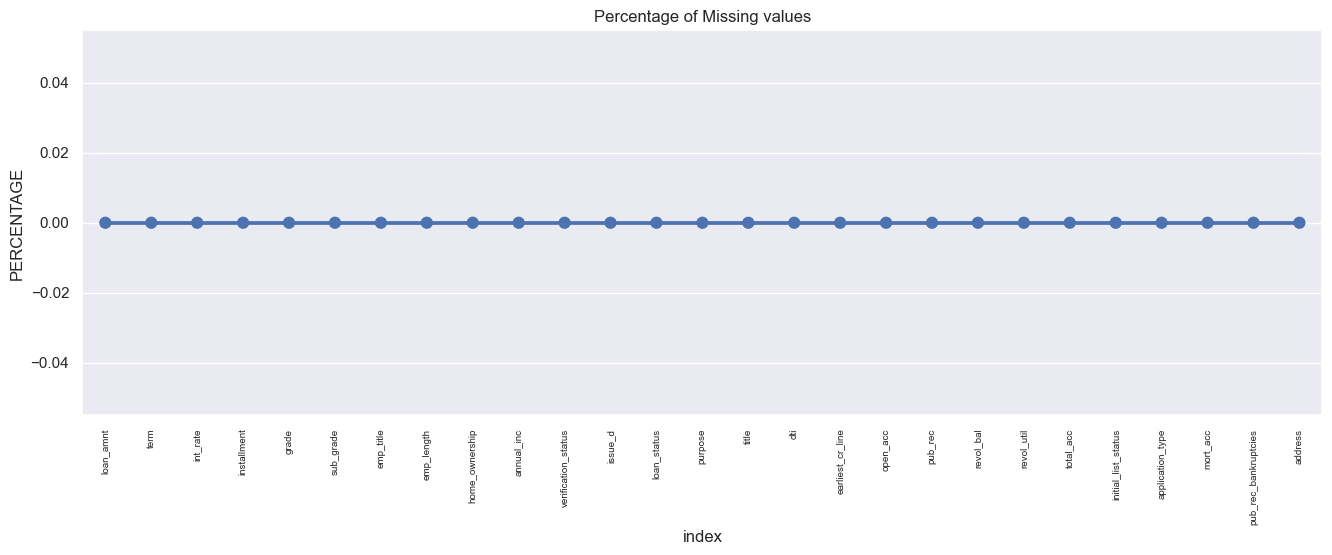

In [197]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

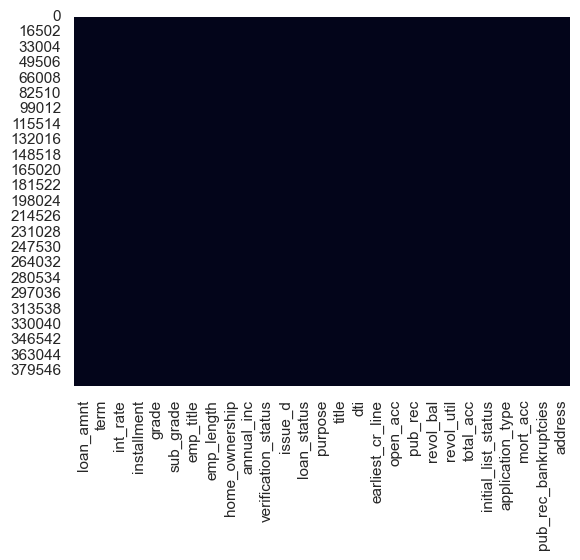

In [198]:
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

**After Null value Imputation there are no missing value present in our data.**

#### **Labelencoding of Categorical Features**

In [199]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [200]:
data['term'] = le.fit_transform(data['term'])
data['grade'] = le.fit_transform(data['grade'])
data['sub_grade'] = le.fit_transform(data['sub_grade'])
data['emp_title'] = le.fit_transform(data['emp_title'])
data['emp_length'] = le.fit_transform(data['emp_length'])
data['home_ownership'] = le.fit_transform(data['home_ownership'])
data['verification_status'] = le.fit_transform(data['verification_status'])
data['issue_d'] = le.fit_transform(data['issue_d'])
data['loan_status'] = le.fit_transform(data['loan_status'])
data['purpose'] = le.fit_transform(data['purpose'])
data['title'] = le.fit_transform(data['title'])
data['earliest_cr_line'] = le.fit_transform(data['earliest_cr_line'])
data['initial_list_status'] = le.fit_transform(data['initial_list_status'])
data['application_type'] = le.fit_transform(data['application_type'])
data['address'] = le.fit_transform(data['address'])

In [201]:
data.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
0      10000     0     11.44       329.48      1          8      80954   
1       8000     0     11.99       265.68      1          9      33315   
2      15600     0     10.49       506.97      1          7     127180   
3       7200     0      6.49       220.65      0          1      27758   
4      24375     1     17.27       609.33      2         14      38298   

   emp_length  home_ownership  annual_inc  ...  open_acc  pub_rec  revol_bal  \
0           1               5    117000.0  ...        16        0      36369   
1           4               1     65000.0  ...        17        0      20131   
2          10               5     43057.0  ...        13        0      11987   
3           6               5     54000.0  ...         6        0       5472   
4           9               1     55000.0  ...        13        0      24584   

   revol_util  total_acc  initial_list_status  application_type  mort_acc  \
0        41.8         25                    1                 1       0.0   
1        53.3         27                    0                 1       3.0   
2        92.2         26                    0                 1       0.0   
3        21.5         13                    0                 1       0.0   
4        69.8         43                    0                 1       1.0   

   pub_rec_bankruptcies  address  
0                   0.0     6206  
1                   0.0    38135  
2                   0.0   307942  
3                   0.0   291181  
4                   0.0   240127  

[5 rows x 27 columns]

In [202]:
data.dtypes

loan_amnt                 int64
term                      int32
int_rate                float64
installment             float64
grade                     int32
sub_grade                 int32
emp_title                 int32
emp_length                int32
home_ownership            int32
annual_inc              float64
verification_status       int32
issue_d                   int32
loan_status               int32
purpose                   int32
title                     int32
dti                     float64
earliest_cr_line          int32
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
initial_list_status       int32
application_type          int32
mort_acc                float64
pub_rec_bankruptcies    float64
address                   int32
dtype: object

**Here after applying the Label Encoder all the categorical columns has been converted into numeric.**

#### **Feature Selection**

Let's plot the correlation plot to select the features

<Axes: >

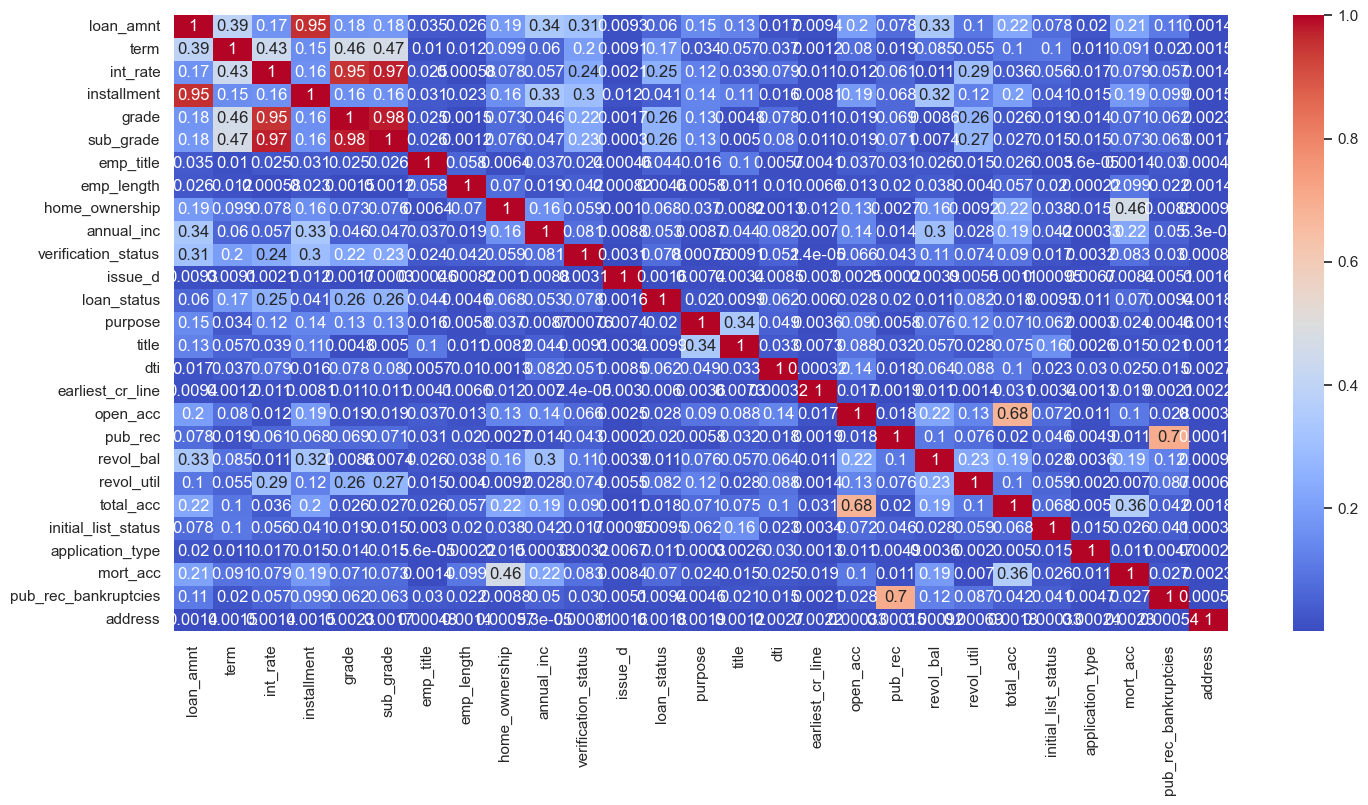

In [203]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Let's save the correlation value in csv format

In [204]:
corr = df.corr()

In [205]:
corr

loan_amnt      term  int_rate  installment     grade  \
loan_amnt              1.000000  0.393862  0.168921     0.953929  0.175198   
term                   0.393862  1.000000  0.434594     0.153378  0.457524   
int_rate               0.168921  0.434594  1.000000     0.162758  0.952473   
installment            0.953929  0.153378  0.162758     1.000000  0.157322   
grade                  0.175198  0.457524  0.952473     0.157322  1.000000   
sub_grade              0.181908  0.468208  0.974217     0.163453  0.977575   
emp_title             -0.035020 -0.010318  0.025344    -0.031353  0.025104   
emp_length            -0.025685 -0.011767 -0.000583    -0.023228 -0.001540   
home_ownership        -0.187771 -0.099195  0.078035    -0.157975  0.072621   
annual_inc             0.336887  0.060330 -0.056771     0.330381 -0.045862   
verification_status    0.310671  0.196390  0.236406     0.296788  0.219524   
issue_d               -0.009260  0.009080  0.002133    -0.012036  0.001679   
loan_status           -0.059836 -0.173246 -0.247758    -0.041082 -0.257286   
purpose               -0.146225 -0.034331  0.122328    -0.135410  0.129869   
title                 -0.126110 -0.056746  0.039425    -0.114390  0.004823   
dti                    0.016636  0.036508  0.079038     0.015786  0.078140   
earliest_cr_line       0.009366  0.001164 -0.011079     0.008104 -0.010649   
open_acc               0.198556  0.079575  0.011649     0.188973  0.019321   
pub_rec               -0.077779 -0.018758  0.060986    -0.067892  0.068778   
revol_bal              0.328320  0.084787 -0.011280     0.316455 -0.008639   
revol_util             0.099862  0.055150  0.293548     0.123851  0.258829   
total_acc              0.223886  0.101346 -0.036404     0.202430 -0.025932   
initial_list_status    0.077743  0.104799 -0.056161     0.040731 -0.018811   
application_type       0.019903  0.010504 -0.017124     0.015213 -0.013820   
mort_acc               0.212167  0.091293 -0.079115     0.185117 -0.071132   
pub_rec_bankruptcies  -0.106477 -0.019822  0.057423    -0.098566  0.061543   
address                0.001405 -0.001525 -0.001391     0.001507 -0.002269   

                      sub_grade  emp_title  emp_length  home_ownership  \
loan_amnt              0.181908  -0.035020   -0.025685       -0.187771   
term                   0.468208  -0.010318   -0.011767       -0.099195   
int_rate               0.974217   0.025344   -0.000583        0.078035   
installment            0.163453  -0.031353   -0.023228       -0.157975   
grade                  0.977575   0.025104   -0.001540        0.072621   
sub_grade              1.000000   0.025928   -0.001189        0.075583   
emp_title              0.025928   1.000000   -0.057522       -0.006383   
emp_length            -0.001189  -0.057522    1.000000        0.070424   
home_ownership         0.075583  -0.006383    0.070424        1.000000   
annual_inc            -0.046798  -0.036773   -0.018821       -0.162512   
verification_status    0.229544   0.024477   -0.041744       -0.058982   
issue_d               -0.000303   0.000464   -0.000820        0.001037   
loan_status           -0.262965  -0.044411   -0.004573       -0.068370   
purpose                0.132865   0.015672    0.005797        0.037094   
title                  0.005031   0.101790   -0.011009        0.008152   
dti                    0.080196   0.005670   -0.010312        0.001286   
earliest_cr_line      -0.010892  -0.004111   -0.006552       -0.012442   
open_acc               0.019105  -0.037194   -0.013034       -0.132056   
pub_rec                0.070811   0.031030   -0.020025        0.002729   
revol_bal             -0.007398  -0.025643   -0.038277       -0.159369   
revol_util             0.269135  -0.014576   -0.003962       -0.009237   
total_acc             -0.026958  -0.026151   -0.056921       -0.222933   
initial_list_status   -0.014506   0.002959   -0.020321       -0.037551   
application_type      -0.014604   0.000056   -0.000224       

In [206]:
# corr.to_csv('correlation.csv')

In [207]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

In [208]:
corr_matrix

loan_amnt      term  int_rate  installment     grade  \
loan_amnt              1.000000  0.393862  0.168921     0.953929  0.175198   
term                   0.393862  1.000000  0.434594     0.153378  0.457524   
int_rate               0.168921  0.434594  1.000000     0.162758  0.952473   
installment            0.953929  0.153378  0.162758     1.000000  0.157322   
grade                  0.175198  0.457524  0.952473     0.157322  1.000000   
sub_grade              0.181908  0.468208  0.974217     0.163453  0.977575   
emp_title              0.035020  0.010318  0.025344     0.031353  0.025104   
emp_length             0.025685  0.011767  0.000583     0.023228  0.001540   
home_ownership         0.187771  0.099195  0.078035     0.157975  0.072621   
annual_inc             0.336887  0.060330  0.056771     0.330381  0.045862   
verification_status    0.310671  0.196390  0.236406     0.296788  0.219524   
issue_d                0.009260  0.009080  0.002133     0.012036  0.001679   
loan_status            0.059836  0.173246  0.247758     0.041082  0.257286   
purpose                0.146225  0.034331  0.122328     0.135410  0.129869   
title                  0.126110  0.056746  0.039425     0.114390  0.004823   
dti                    0.016636  0.036508  0.079038     0.015786  0.078140   
earliest_cr_line       0.009366  0.001164  0.011079     0.008104  0.010649   
open_acc               0.198556  0.079575  0.011649     0.188973  0.019321   
pub_rec                0.077779  0.018758  0.060986     0.067892  0.068778   
revol_bal              0.328320  0.084787  0.011280     0.316455  0.008639   
revol_util             0.099862  0.055150  0.293548     0.123851  0.258829   
total_acc              0.223886  0.101346  0.036404     0.202430  0.025932   
initial_list_status    0.077743  0.104799  0.056161     0.040731  0.018811   
application_type       0.019903  0.010504  0.017124     0.015213  0.013820   
mort_acc               0.212167  0.091293  0.079115     0.185117  0.071132   
pub_rec_bankruptcies   0.106477  0.019822  0.057423     0.098566  0.061543   
address                0.001405  0.001525  0.001391     0.001507  0.002269   

                      sub_grade  emp_title  emp_length  home_ownership  \
loan_amnt              0.181908   0.035020    0.025685        0.187771   
term                   0.468208   0.010318    0.011767        0.099195   
int_rate               0.974217   0.025344    0.000583        0.078035   
installment            0.163453   0.031353    0.023228        0.157975   
grade                  0.977575   0.025104    0.001540        0.072621   
sub_grade              1.000000   0.025928    0.001189        0.075583   
emp_title              0.025928   1.000000    0.057522        0.006383   
emp_length             0.001189   0.057522    1.000000        0.070424   
home_ownership         0.075583   0.006383    0.070424        1.000000   
annual_inc             0.046798   0.036773    0.018821        0.162512   
verification_status    0.229544   0.024477    0.041744        0.058982   
issue_d                0.000303   0.000464    0.000820        0.001037   
loan_status            0.262965   0.044411    0.004573        0.068370   
purpose                0.132865   0.015672    0.005797        0.037094   
title                  0.005031   0.101790    0.011009        0.008152   
dti                    0.080196   0.005670    0.010312        0.001286   
earliest_cr_line       0.010892   0.004111    0.006552        0.012442   
open_acc               0.019105   0.037194    0.013034        0.132056   
pub_rec                0.070811   0.031030    0.020025        0.002729   
revol_bal              0.007398   0.025643    0.038277        0.159369   
revol_util             0.269135   0.014576    0.003962        0.009237   
total_acc              0.026958   0.026151    0.056921        0.222933   
initial_list_status    0.014506   0.002959    0.020321        0.037551   
application_type       0.014604   0.000056    0.000224       

In [209]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

C:\Users\0420\AppData\Local\Temp\ipykernel_13648\2797590206.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



loan_amnt      term  int_rate  installment     grade  \
loan_amnt                   NaN  0.393862  0.168921     0.953929  0.175198   
term                        NaN       NaN  0.434594     0.153378  0.457524   
int_rate                    NaN       NaN       NaN     0.162758  0.952473   
installment                 NaN       NaN       NaN          NaN  0.157322   
grade                       NaN       NaN       NaN          NaN       NaN   
sub_grade                   NaN       NaN       NaN          NaN       NaN   
emp_title                   NaN       NaN       NaN          NaN       NaN   
emp_length                  NaN       NaN       NaN          NaN       NaN   
home_ownership              NaN       NaN       NaN          NaN       NaN   
annual_inc                  NaN       NaN       NaN          NaN       NaN   
verification_status         NaN       NaN       NaN          NaN       NaN   
issue_d                     NaN       NaN       NaN          NaN       NaN   
loan_status                 NaN       NaN       NaN          NaN       NaN   
purpose                     NaN       NaN       NaN          NaN       NaN   
title                       NaN       NaN       NaN          NaN       NaN   
dti                         NaN       NaN       NaN          NaN       NaN   
earliest_cr_line            NaN       NaN       NaN          NaN       NaN   
open_acc                    NaN       NaN       NaN          NaN       NaN   
pub_rec                     NaN       NaN       NaN          NaN       NaN   
revol_bal                   NaN       NaN       NaN          NaN       NaN   
revol_util                  NaN       NaN       NaN          NaN       NaN   
total_acc                   NaN       NaN       NaN          NaN       NaN   
initial_list_status         NaN       NaN       NaN          NaN       NaN   
application_type            NaN       NaN       NaN          NaN       NaN   
mort_acc                    NaN       NaN       NaN          NaN       NaN   
pub_rec_bankruptcies        NaN       NaN       NaN          NaN       NaN   
address                     NaN       NaN       NaN          NaN       NaN   

                      sub_grade  emp_title  emp_length  home_ownership  \
loan_amnt              0.181908   0.035020    0.025685        0.187771   
term                   0.468208   0.010318    0.011767        0.099195   
int_rate               0.974217   0.025344    0.000583        0.078035   
installment            0.163453   0.031353    0.023228        0.157975   
grade                  0.977575   0.025104    0.001540        0.072621   
sub_grade                   NaN   0.025928    0.001189        0.075583   
emp_title                   NaN        NaN    0.057522        0.006383   
emp_length                  NaN        NaN         NaN        0.070424   
home_ownership              NaN        NaN         NaN             NaN   
annual_inc                  NaN        NaN         NaN             NaN   
verification_status         NaN        NaN         NaN             NaN   
issue_d                     NaN        NaN         NaN             NaN   
loan_status                 NaN        NaN         NaN             NaN   
purpose                     NaN        NaN         NaN             NaN   
title                       NaN        NaN         NaN             NaN   
dti                         NaN        NaN         NaN             NaN   
earliest_cr_line            NaN        NaN         NaN             NaN   
open_acc                    NaN        NaN         NaN             NaN   
pub_rec                     NaN        NaN         NaN             NaN   
revol_bal                   NaN        NaN         NaN             NaN   
revol_util                  NaN        NaN         NaN             NaN   
total_acc                   NaN        NaN         NaN             NaN   
initial_list_status         NaN        NaN         NaN             NaN   
application_type            NaN        NaN         NaN       

In [210]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.30)]

In [211]:
to_drop


['term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'annual_inc',
 'verification_status',
 'title',
 'revol_bal',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

So here as per the correlation values we have selected the above features to train our model

In [212]:

final_data1 = data[['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'annual_inc', 'verification_status', 'title', 'revol_bal',
                     'total_acc', 'mort_acc', 'pub_rec_bankruptcies','loan_status']]

In [213]:
final_data1.head()

term  int_rate  installment  grade  sub_grade  annual_inc  \
0     0     11.44       329.48      1          8    117000.0   
1     0     11.99       265.68      1          9     65000.0   
2     0     10.49       506.97      1          7     43057.0   
3     0      6.49       220.65      0          1     54000.0   
4     1     17.27       609.33      2         14     55000.0   

   verification_status  title  revol_bal  total_acc  mort_acc  \
0                    0  36943      36369         25       0.0   
1                    0  12929      20131         27       3.0   
2                    1  10163      11987         26       0.0   
3                    0  10163       5472         13       0.0   
4                    2   9272      24584         43       1.0   

   pub_rec_bankruptcies  loan_status  
0                   0.0            1  
1                   0.0            1  
2                   0.0            1  
3                   0.0            1  
4                   0.0            0

In [214]:
final_data1.shape

(396030, 13)

In [215]:
final_data1.columns

Index(['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'annual_inc',
       'verification_status', 'title', 'revol_bal', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_status'],
      dtype='object')

#### **Splitting of data into train and test**

In [216]:
a = final_data1.drop(['loan_status'], axis=1)
b = final_data1['loan_status']

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3,stratify=y, random_state= 42)

In [218]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(a_train, b_train)
mutual_info

array([0.01922691, 0.03827986, 0.02669009, 0.04232125, 0.03605707,
       0.00422556, 0.02078865, 0.01204442, 0.00030214, 0.00077447,
       0.00514308, 0.00196064])

In [219]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = a_train.columns
mutual_info.sort_values(ascending=False)

grade                   0.042321
int_rate                0.038280
sub_grade               0.036057
installment             0.026690
verification_status     0.020789
term                    0.019227
title                   0.012044
mort_acc                0.005143
annual_inc              0.004226
pub_rec_bankruptcies    0.001961
total_acc               0.000774
revol_bal               0.000302
dtype: float64

In [220]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(a_train, b_train)
mutual_info

array([0.02013758, 0.03777243, 0.02467605, 0.0419075 , 0.03592841,
       0.00509935, 0.02006728, 0.01241143, 0.        , 0.00056887,
       0.00604223, 0.00071731])

In [221]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(a_train, b_train)
a_train.columns[sel_five_cols.get_support()]

Index(['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'annual_inc',
       'verification_status', 'title', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [222]:
# Define the list of columns you want to select
columns_to_select = ['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'annual_inc',
       'verification_status', 'title', 'total_acc', 'mort_acc','loan_status']



In [223]:
# Create a new DataFrame with the selected columns
data1 = data[columns_to_select].copy()
data1.head()

term  int_rate  installment  grade  sub_grade  annual_inc  \
0     0     11.44       329.48      1          8    117000.0   
1     0     11.99       265.68      1          9     65000.0   
2     0     10.49       506.97      1          7     43057.0   
3     0      6.49       220.65      0          1     54000.0   
4     1     17.27       609.33      2         14     55000.0   

   verification_status  title  total_acc  mort_acc  loan_status  
0                    0  36943         25       0.0            1  
1                    0  12929         27       3.0            1  
2                    1  10163         26       0.0            1  
3                    0  10163         13       0.0            1  
4                    2   9272         43       1.0            0

In [224]:
data1.tail()

term  int_rate  installment  grade  sub_grade  annual_inc  \
396025     1     10.99       217.38      1          8     40000.0   
396026     0     12.29       700.42      2         10    110000.0   
396027     0      9.99       161.32      1          5     56500.0   
396028     1     15.31       503.02      2         11     64000.0   
396029     0     13.61        67.98      2         11     42996.0   

        verification_status  title  total_acc  mort_acc  loan_status  
396025                    1  12929         23  0.000000            1  
396026                    1  12929          8  1.000000            1  
396027                    2  45938         23  0.000000            1  
396028                    2  23296         20  5.000000            1  
396029                    2  36366         19  1.813991            1

# **Model Building**

### **Unsupervised Machine Learning**

#### **K-Means Clustering**

In [225]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [226]:
# df = data

In [227]:
data1

term  int_rate  installment  grade  sub_grade  annual_inc  \
0          0     11.44       329.48      1          8    117000.0   
1          0     11.99       265.68      1          9     65000.0   
2          0     10.49       506.97      1          7     43057.0   
3          0      6.49       220.65      0          1     54000.0   
4          1     17.27       609.33      2         14     55000.0   
...      ...       ...          ...    ...        ...         ...   
396025     1     10.99       217.38      1          8     40000.0   
396026     0     12.29       700.42      2         10    110000.0   
396027     0      9.99       161.32      1          5     56500.0   
396028     1     15.31       503.02      2         11     64000.0   
396029     0     13.61        67.98      2         11     42996.0   

        verification_status  title  total_acc  mort_acc  loan_status  
0                         0  36943         25  0.000000            1  
1                         0  12929         27  3.000000            1  
2                         1  10163         26  0.000000            1  
3                         0  10163         13  0.000000            1  
4                         2   9272         43  1.000000            0  
...                     ...    ...        ...       ...          ...  
396025                    1  12929         23  0.000000            1  
396026                    1  12929          8  1.000000            1  
396027                    2  45938         23  0.000000            1  
396028                    2  23296         20  5.000000            1  
396029                    2  36366         19  1.813991            1  

[396030 rows x 11 columns]

In [228]:
data1.head()

term  int_rate  installment  grade  sub_grade  annual_inc  \
0     0     11.44       329.48      1          8    117000.0   
1     0     11.99       265.68      1          9     65000.0   
2     0     10.49       506.97      1          7     43057.0   
3     0      6.49       220.65      0          1     54000.0   
4     1     17.27       609.33      2         14     55000.0   

   verification_status  title  total_acc  mort_acc  loan_status  
0                    0  36943         25       0.0            1  
1                    0  12929         27       3.0            1  
2                    1  10163         26       0.0            1  
3                    0  10163         13       0.0            1  
4                    2   9272         43       1.0            0

In [229]:
data1.isnull().sum()

term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
annual_inc             0
verification_status    0
title                  0
total_acc              0
mort_acc               0
loan_status            0
dtype: int64

In [230]:
# Normalization function
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)
print(x)

        term  int_rate  installment  grade  sub_grade  annual_inc  \
0          0     11.44       329.48      1          8    117000.0   
1          0     11.99       265.68      1          9     65000.0   
2          0     10.49       506.97      1          7     43057.0   
3          0      6.49       220.65      0          1     54000.0   
4          1     17.27       609.33      2         14     55000.0   
...      ...       ...          ...    ...        ...         ...   
396025     1     10.99       217.38      1          8     40000.0   
396026     0     12.29       700.42      2         10    110000.0   
396027     0      9.99       161.32      1          5     56500.0   
396028     1     15.31       503.02      2         11     64000.0   
396029     0     13.61        67.98      2         11     42996.0   

        verification_status  title  revol_bal  total_acc  mort_acc  \
0                         0  36943      36369         25  0.000000   
1                         0  12

In [231]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data1)

In [232]:
df_norm.isnull().sum()

term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
annual_inc             0
verification_status    0
title                  0
total_acc              0
mort_acc               0
loan_status            0
dtype: int64

In [233]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

TWSS

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages

[192972.75001700924,
 151400.1129488555,
 116733.65411944184,
 95860.73870652856,
 85776.44251674817,
 79109.85156047044,
 73662.44576460027]

Text(0, 0.5, 'total_within_SS')

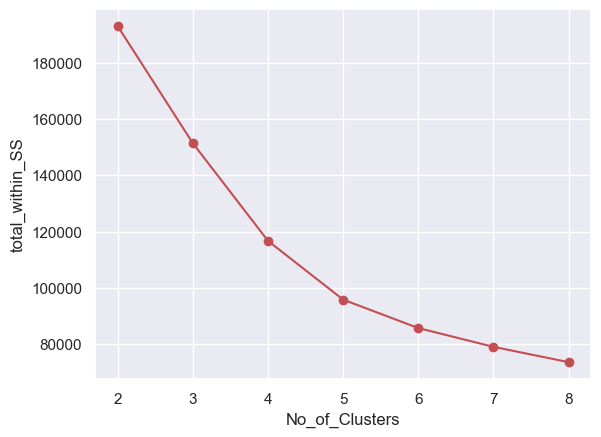

In [234]:
# Scree plot
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [235]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters
model = KMeans(n_clusters = 4)
model.fit(df_norm)

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [236]:
x.isnull().sum()

term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
annual_inc              0
verification_status     0
title                   0
revol_bal               0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [237]:
x['mort_acc'] = x['mort_acc'].fillna(x['mort_acc'].mean())
x['pub_rec_bankruptcies'] = x['pub_rec_bankruptcies'].fillna(x['pub_rec_bankruptcies'].mean())

In [238]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(a)
    pred = kmeans.predict(a_test)
    acc_km= accuracy_score(b_test,pred)
    wcss.append(kmeans.inertia_)

In [239]:
print(acc_km*100)

9.782928902692557


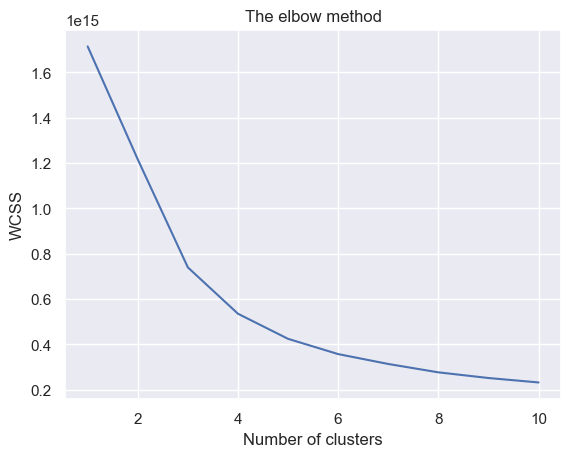

In [240]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [241]:
kmeans = KMeans( n_clusters = 5, init='k-means++')
kmeans.fit(data1)
pred = kmeans.predict(data1)


c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [242]:
frame = pd.DataFrame(data1)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
0    240584
4    131440
2     23040
3       952
1        14
Name: count, dtype: int64

#### **Principle Component Analysis**

In [243]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [244]:
# Normalizing the numerical data
uni_normal = scale(data1)
uni_normal

array([[-5.57974825e-01, -4.91799066e-01, -4.08290710e-01, ...,
        -3.48906099e-02, -8.87964304e-01,  4.93944141e-01],
       [-5.57974825e-01, -3.68815761e-01, -6.62750261e-01, ...,
         1.33360764e-01,  5.80561825e-01,  4.93944141e-01],
       [-5.57974825e-01, -7.04224774e-01,  2.99609377e-01, ...,
         4.92350772e-02, -8.87964304e-01,  4.93944141e-01],
       ...,
       [-5.57974825e-01, -8.16027778e-01, -1.07897908e+00, ...,
        -2.03141984e-01, -8.87964304e-01,  4.93944141e-01],
       [ 1.79219555e+00,  3.73556188e-01,  2.83855220e-01, ...,
        -4.55519046e-01,  1.55957924e+00,  4.93944141e-01],
       [-5.57974825e-01, -6.57402682e-03, -1.45125579e+00, ...,
        -5.39644733e-01, -3.26078304e-16,  4.93944141e-01]])

In [245]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(uni_normal)

In [246]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.31382971, 0.17028949, 0.09224362, 0.08868543, 0.08177218,
       0.07641326])

In [247]:
# PCA weights
pca.components_
pca.components_[0]

array([ 0.32415134,  0.51239764,  0.14769643,  0.51446716,  0.51988661,
       -0.0024861 ,  0.19366457, -0.00567842,  0.00928308, -0.0216019 ,
       -0.19366096])

In [248]:
# Cumulative variance
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([31.38, 48.41, 57.63, 66.5 , 74.68, 82.32])

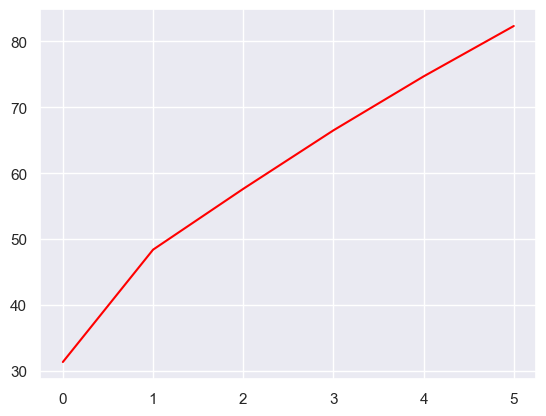

In [249]:
# Variance plot for PCA components obtained
plt.plot(var1, color = "red")

In [250]:
# PCA scores
pca_values

array([[-1.38846009, -0.79937733,  1.49254595,  0.67906817,  0.18469329,
         1.3894476 ],
       [-1.29908395, -0.20206152,  0.15531065, -1.08886149,  0.62713147,
         0.35957496],
       [-1.2158287 , -0.26943404, -0.96436583,  0.2398335 ,  0.28279814,
        -0.46020961],
       ...,
       [-1.41972047, -1.09297221,  2.12551503,  1.8139402 , -0.78833928,
        -0.83224858],
       [ 0.96815883,  1.01722447,  0.95233461,  0.23980729,  0.07853021,
        -1.07443653],
       [-0.21815329, -1.17592735,  1.81911508,  1.03649896, -0.22104408,
        -1.0444883 ]])

In [251]:
len(pca_values)

396030

In [252]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5"
final = pd.concat([data1, pca_data.iloc[:, 0:5]], axis = 1)

In [253]:
final

term  int_rate  installment  grade  sub_grade  annual_inc  \
0          0     11.44       329.48      1          8    117000.0   
1          0     11.99       265.68      1          9     65000.0   
2          0     10.49       506.97      1          7     43057.0   
3          0      6.49       220.65      0          1     54000.0   
4          1     17.27       609.33      2         14     55000.0   
...      ...       ...          ...    ...        ...         ...   
396025     1     10.99       217.38      1          8     40000.0   
396026     0     12.29       700.42      2         10    110000.0   
396027     0      9.99       161.32      1          5     56500.0   
396028     1     15.31       503.02      2         11     64000.0   
396029     0     13.61        67.98      2         11     42996.0   

        verification_status  title  total_acc  mort_acc  loan_status  \
0                         0  36943         25  0.000000            1   
1                         0  12929         27  3.000000            1   
2                         1  10163         26  0.000000            1   
3                         0  10163         13  0.000000            1   
4                         2   9272         43  1.000000            0   
...                     ...    ...        ...       ...          ...   
396025                    1  12929         23  0.000000            1   
396026                    1  12929          8  1.000000            1   
396027                    2  45938         23  0.000000            1   
396028                    2  23296         20  5.000000            1   
396029                    2  36366         19  1.813991            1   

           comp0     comp1     comp2     comp3     comp4  
0      -1.388460 -0.799377  1.492546  0.679068  0.184693  
1      -1.299084 -0.202062  0.155311 -1.088861  0.627131  
2      -1.215829 -0.269434 -0.964366  0.239834  0.282798  
3      -2.948802 -1.303612 -0.981445 -0.211722  0.344808  
4       2.047715  1.031738 -1.022947 -0.790162 -1.911314  
...          ...       ...       ...       ...       ...  
396025 -0.492305 -0.698019 -0.480365 -0.540816  0.283832  
396026 -0.302503 -0.074223 -0.981179  1.375935  0.689127  
396027 -1.419720 -1.092972  2.125515  1.813940 -0.788339  
396028  0.968159  1.017224  0.952335  0.239807  0.078530  
396029 -0.218153 -1.175927  1.819115  1.036499 -0.221044  

[396030 rows x 16 columns]

### **Supervised Machine Learning**

#### **Artificial Neural Network (ANN)**

In [254]:
# !pip install keras

In [255]:
from sklearn.metrics import confusion_matrix
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

**MODEL EVALUATION**

In [256]:
# !pip install numpy --upgrade

In [257]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import Add, Input, Dense, Dropout

In [258]:
a_train = tf.convert_to_tensor(a_train,  dtype=tf.float32)
b_train = tf.convert_to_tensor(b_train, dtype=tf.float32)

In [259]:
a_test = tf.convert_to_tensor(a_test, dtype=tf.float32)
b_test = tf.convert_to_tensor(b_test, dtype=tf.float32)

In [260]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [261]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [262]:
History= model.fit(a_train, b_train, batch_size=500, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
 46/555 [=>............................] - ETA: 1s - loss: 321.0837 - accuracy: 0.8027 

555/555 [==============================] - 3s 3ms/step - loss: 70.4169 - accuracy: 0.8039 - val_loss: 9.1869 - val_accuracy: 0.8033
Epoch 2/10
555/555 [==============================] - 1s 2ms/step - loss: 26.0056 - accuracy: 0.8039 - val_loss: 25.7106 - val_accuracy: 0.8033
Epoch 3/10
555/555 [==============================] - 1s 2ms/step - loss: 22.3715 - accuracy: 0.8039 - val_loss: 23.1378 - val_accuracy: 0.8033
Epoch 4/10
555/555 [==============================] - 1s 2ms/step - loss: 23.2189 - accuracy: 0.8039 - val_loss: 6.6498 - val_accuracy: 0.8033
Epoch 5/10
555/555 [==============================] - 1s 2ms/step - loss: 26.4090 - accuracy: 0.8039 - val_loss: 50.5055 - val_accuracy: 0.8033
Epoch 6/10
555/555 [==============================] - 1s 2ms/step - loss: 26.5983 - accuracy: 0.8039 - val_loss: 5.3931 - val_accuracy: 0.8033
Epoch 7/10
555/555 [==============================] - 1s 2ms/step - loss: 21.1238 - accuracy: 0.8039 - val_loss: 16.6649 - val_accuracy: 0.8033
Epoch 

In [263]:
abc=model.predict(a_test)

  33/3713 [..............................] - ETA: 5s  

3713/3713 [==============================] - 4s 1ms/step


In [264]:
acc_ann =accuracy_score(abc,b_test)

In [265]:
acc_ann

0.803870077182705

In [266]:
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(History.history['loss'], label='Loss')
    plt.plot(History.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(History.history['accuracy'], label='accuracy')
    plt.plot(History.history['val_accuracy'], label='val_accuracy')
    plt.title('accuracy score evolution during trainig')
    plt.legend();

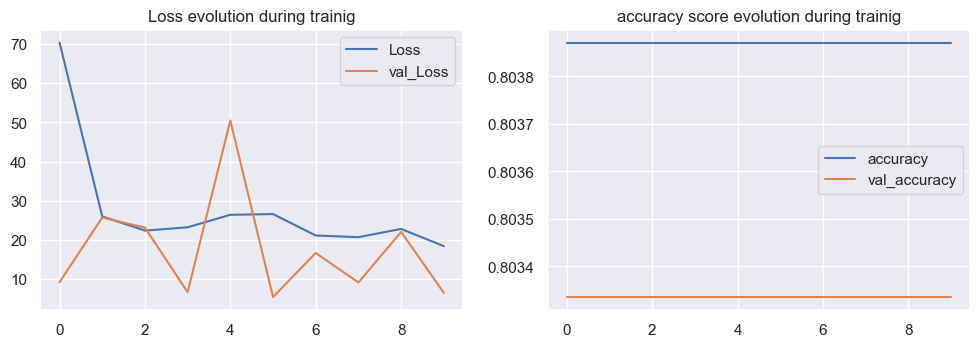

In [267]:
plot_learning_evolution(model)

#### **XGBoost Classifier**

In [268]:
# !pip install xgboost

In [269]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=100)
xgb_classifier.fit(a_train, b_train)
y_predk = xgb_classifier.predict(a_test)
accc_xgbk = accuracy_score(b_test, y_predk)*100
print ("The accuracy obtained by the XGBoost classifier is :",accc_xgbk,"%")

The accuracy obtained by the XGBoost classifier is : 80.49642703835568 %


In [270]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve,f1_score,precision_score

In [271]:
pre_dtsk = precision_score(b_test, y_predk, average='weighted') * 100
recall_dtsk = recall_score(b_test, y_predk, average='weighted') * 100
f1_dtsk = f1_score(b_test, y_predk, average='weighted') * 100
print(pre_dtsk)
print(recall_dtsk)
print(f1_dtsk)

75.55206584649416
80.49642703835568
74.0607680774976


In [272]:
#Printing the Classification report for XGBoost classifier model
print('The classificatin report for XGBoost classifier as follows:')
report  = classification_report(y_predk,b_test)
print(report)

The classificatin report for XGBoost classifier as follows:
              precision    recall  f1-score   support

           0       0.07      0.52      0.13      3254
           1       0.98      0.81      0.89    115555

    accuracy                           0.80    118809
   macro avg       0.53      0.67      0.51    118809
weighted avg       0.96      0.80      0.87    118809



In [273]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(b_test,y_predk)}')

Here is the confusion matrix of the model 
 
 [[ 1692 21610]
 [ 1562 93945]]


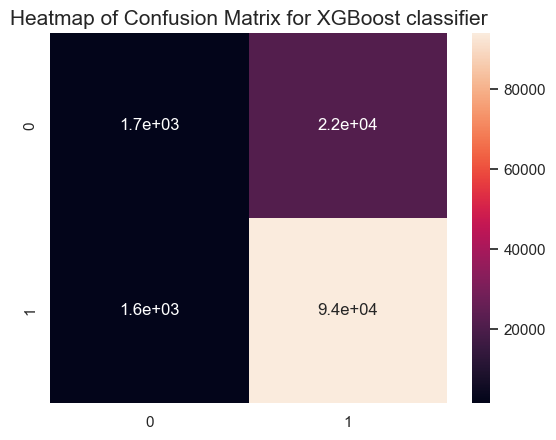

In [274]:
#confustion metrix
cm = confusion_matrix(b_test, y_predk)
plt.title('Heatmap of Confusion Matrix for XGBoost classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [275]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve

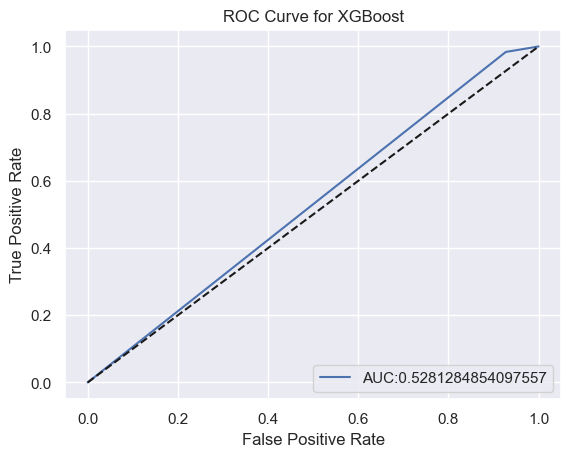

In [276]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(b_test,y_predk)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(b_test,y_predk)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

## After applying hyperparameter tuning


In [277]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [278]:
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.3,stratify=y, random_state= 42)

In [279]:

# Define your pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBClassifier())
])

In [280]:
# Define your hyperparameters for GridSearchCV
params = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.5],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.5, 0.8, 1.0],
    'xgb__colsample_bytree': [0.5, 0.8, 1.0],
    'pca__n_components': [10, 20, 50]
}


In [281]:
# Define your GridSearchCV object
grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [282]:
# Fit your GridSearchCV object to your training data
grid_search.fit(a_train[:100], b_train[:100])

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


2430 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._f

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      impo...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [10, 20, 50],
                         'xgb__colsample_bytree': [0.5, 0.8, 1.0],
                         'xgb__learning_rate': [0.01, 0.1, 0.5],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 200],
                         'xgb__subsample': [0.5, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [283]:
# Evaluate your model on your test data
y_predsk1 = grid_search.predict(a_test)
accuracyk1= accuracy_score(b_test, y_predsk1)*100
print(f'Test accuracy: {accuracyk1:.2f}')


Test accuracy: 77.03


In [284]:
pre_dtsk1 = precision_score(b_test, y_predsk1, average='weighted') * 100
recall_dtsk1 = recall_score(b_test, y_predsk1, average='weighted') * 100
f1_dtsk1 = f1_score(b_test, y_predsk1, average='weighted') * 100
print(pre_dtsk1)
print(recall_dtsk1)
print(f1_dtsk1)

72.14947081428336
77.03035965288825
73.80317755753056


In [285]:
#Printing the Classification report for XGBoost classifier model
print('The classificatin report for XGBoost classifier as follows:')
report  = classification_report(b_test, y_predsk1)
print(report)

The classificatin report for XGBoost classifier as follows:
              precision    recall  f1-score   support

           0       0.33      0.16      0.22     23302
           1       0.82      0.92      0.87     95507

    accuracy                           0.77    118809
   macro avg       0.57      0.54      0.54    118809
weighted avg       0.72      0.77      0.74    118809



In [286]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(b_test, y_predsk1)}')

Here is the confusion matrix of the model 
 
 [[ 3755 19547]
 [ 7743 87764]]


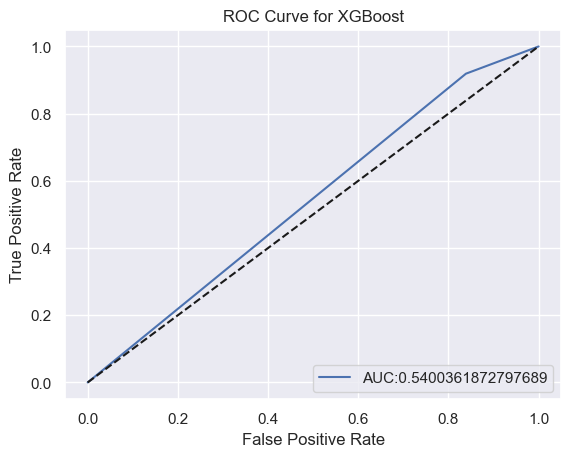

In [287]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(b_test, y_predsk1)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(b_test, y_predsk1)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

#### **AdaBoost Classifier**

In [288]:
from sklearn.ensemble import AdaBoostClassifier

adb_classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)
adb_classifier.fit(a_train, b_train)
y_predk2 = adb_classifier.predict(a_test)
accc_adb2 = accuracy_score(b_test, y_predk2)*100
print ("The accuracy obtained by the AdaBoost classifier is :",accc_adb2,"%")

The accuracy obtained by the AdaBoost classifier is : 80.49390197712295 %


In [291]:
pre_dtsk2 = precision_score(b_test, y_predk2, average='weighted') * 100
recall_dtsk2 = recall_score(b_test, y_predk2, average='weighted') * 100
f1_dtsk2 = f1_score(b_test, y_predk2, average='weighted') * 100
print(pre_dtsk2)
print(recall_dtsk2)
print(f1_dtsk2)

75.51966155658401
80.49390197712295
73.21363588485274


In [292]:
#Printing the Classification report for AdaBoost classifier model
print('The classificatin report for AdaBoost classifier as follows:')
report  = classification_report(b_test, y_predk2)
print(report)

The classificatin report for AdaBoost classifier as follows:
              precision    recall  f1-score   support

           0       0.53      0.04      0.08     23302
           1       0.81      0.99      0.89     95507

    accuracy                           0.80    118809
   macro avg       0.67      0.52      0.49    118809
weighted avg       0.76      0.80      0.73    118809



In [293]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(b_test, y_predk2)}')

Here is the confusion matrix of the model 
 
 [[ 1028 22274]
 [  901 94606]]


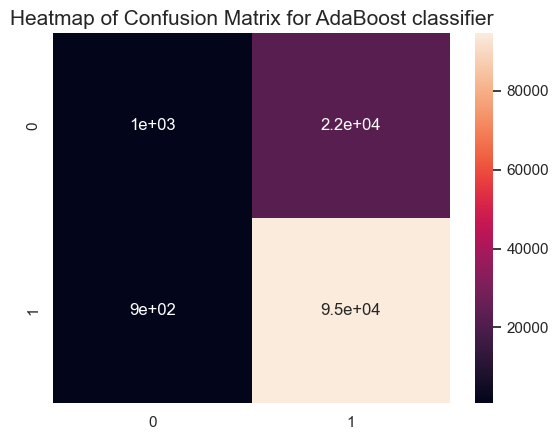

In [294]:
#confustion metrix
cm = confusion_matrix(b_test, y_predk2)
plt.title('Heatmap of Confusion Matrix for AdaBoost classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

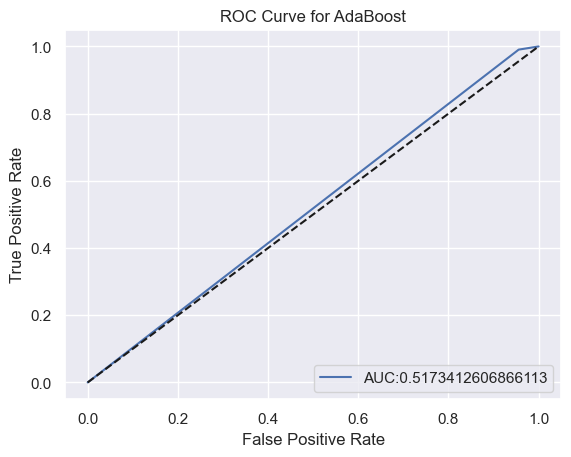

In [295]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(b_test, y_predk2)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(b_test, y_predk2)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

## After  hyperparameter tuning

In [333]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split your data into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

# Standardize your features
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

# Create an AdaBoostClassifier
adb_classifier = AdaBoostClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(adb_classifier, param_grid, cv=5)
grid_search.fit(a_train[:100], b_train[:100])

# Get the best model from the grid search
best_adb_classifier = grid_search.best_estimator_

# Fit the best model on the training data
best_adb_classifier.fit(a_train, b_train)

# Make predictions on the test data
y_predk3 = best_adb_classifier.predict(a_test)

# Calculate accuracy
accuracyk3 = accuracy_score(b_test[:100], y_predk3[:100]) * 100
print("The accuracy obtained by the AdaBoost classifier is:", accuracyk3, "%")


The accuracy obtained by the AdaBoost classifier is: 80.0 %


In [297]:
pre_dtsk3 = precision_score(b_test, y_predk3, average='weighted') * 100
recall_dtsk3 = recall_score(b_test, y_predk3, average='weighted') * 100
f1_dtsk3 = f1_score(b_test, y_predk3, average='weighted') * 100
print(pre_dtsk3)
print(recall_dtsk3)
print(f1_dtsk3)

64.53480956881515
80.33356058884428
71.57271154419537


c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [298]:
#Printing the Classification report for AdaBoost classifier model
print('The classificatin report for AdaBoost classifier as follows:')
report  = classification_report(b_test, y_predk3)
print(report)

The classificatin report for AdaBoost classifier as follows:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15577
           1       0.80      1.00      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.40      0.50      0.45     79206
weighted avg       0.65      0.80      0.72     79206



c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\0420\AppData\Local\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [299]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(b_test, y_predk3)}')

Here is the confusion matrix of the model 
 
 [[    0 15577]
 [    0 63629]]


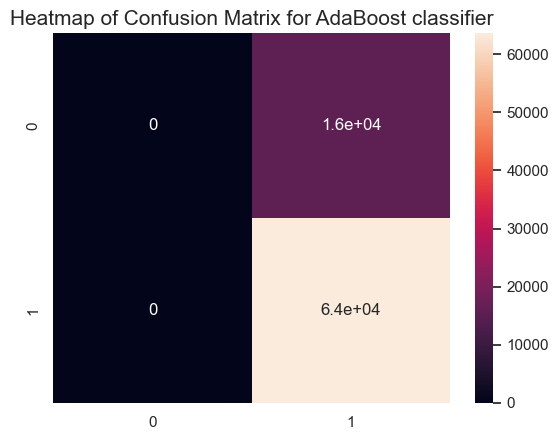

In [300]:
#confustion metrix
cm = confusion_matrix(b_test, y_predk3)
plt.title('Heatmap of Confusion Matrix for AdaBoost classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

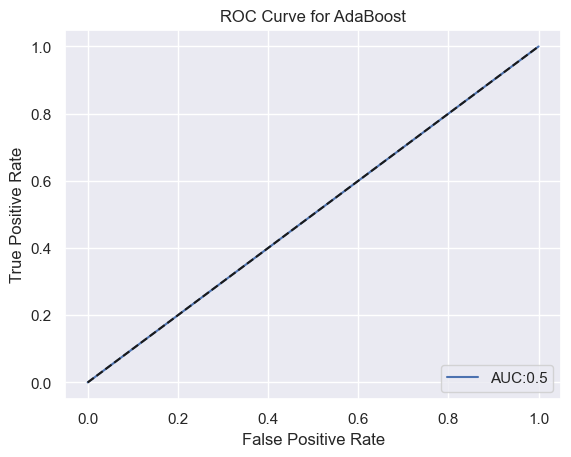

In [301]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(b_test, y_predk3)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(b_test, y_predk3)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [302]:
# # Evaluate your model on your test data
# y_pred = grid_search_aba.predict(x_test)
# accuracy_aba = accuracy_score(y_test, y_pred)*100
# print(f'Test accuracy: {accuracy_aba:.2f}')


#### **Random Forest Classifier**

In [303]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(a_train, b_train)
y_predk3 = rf_classifier.predict(a_test)
accc_rf3 = accuracy_score(b_test, y_predk3)*100
print ("The accuracy obtained by the RandomForestClassifier is :",accc_rf3,"%")


The accuracy obtained by the RandomForestClassifier is : 80.00404009797238 %


In [304]:
pre_dtsk4 = precision_score(b_test, y_predk3, average='weighted') * 100
recall_dtsk4 = recall_score(b_test, y_predk3, average='weighted') * 100
f1_dtsk4 = f1_score(b_test, y_predk3, average='weighted') * 100
print(pre_dtsk4)
print(recall_dtsk4)
print(f1_dtsk4)

74.58832118921026
80.00404009797238
74.49127248568362


In [305]:
#Printing the Classification report for  RandomForestClassifier model
print('The classificatin report for  RandomForestClassifier as follows:')
report  = classification_report(b_test, y_predk3)
print(report)

The classificatin report for  RandomForestClassifier as follows:
              precision    recall  f1-score   support

           0       0.46      0.10      0.17     15577
           1       0.82      0.97      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.64      0.54      0.53     79206
weighted avg       0.75      0.80      0.74     79206



param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [306]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(b_test, y_predk3)}')

Here is the confusion matrix of the model 
 
 [[ 1588 13989]
 [ 1849 61780]]


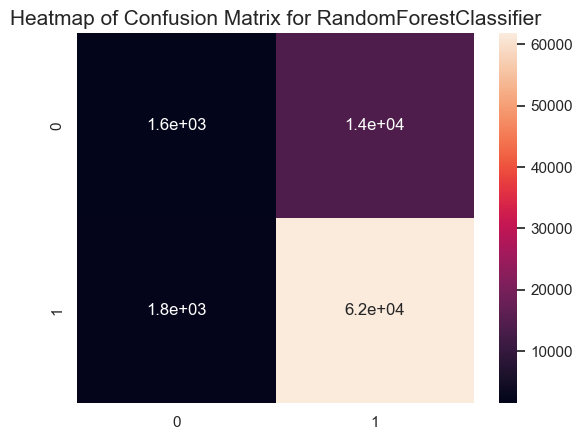

In [307]:
#confustion metrix
cm = confusion_matrix(b_test, y_predk3)
plt.title('Heatmap of Confusion Matrix for RandomForestClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

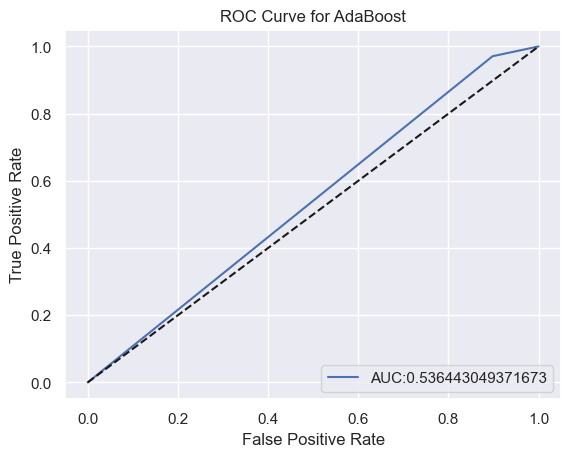

In [308]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(b_test, y_predk3)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(b_test, y_predk3)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

## After  hyperparameter tuning

In [309]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(a_train[:100], b_train[:100])

best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(a_train[:100], b_train[:100])
y_predk6 = best_rf_classifier.predict(a_test)
accuracyk4 = accuracy_score(b_test, y_predk6) * 100
print("The accuracy obtained by the RandomForestClassifier after tuning is:", accuracyk4, "%")


The accuracy obtained by the RandomForestClassifier after tuning is: 75.96772971744565 %


In [310]:
pre_dtsk5 = precision_score(b_test, y_predk6, average='weighted') * 100
recall_dtsk5 = recall_score(b_test, y_predk6, average='weighted') * 100
f1_dtsk5 = f1_score(b_test, y_predk6, average='weighted') * 100
print(pre_dtsk5)
print(recall_dtsk5)
print(f1_dtsk5)

72.97955388848818
75.96772971744565
74.1883141454607


In [311]:
#Printing the Classification report for  RandomForestClassifier model
print('The classificatin report for  RandomForestClassifier as follows:')
report  = classification_report(b_test, y_predk6)
print(report)

The classificatin report for  RandomForestClassifier as follows:
              precision    recall  f1-score   support

           0       0.34      0.23      0.28     15577
           1       0.83      0.89      0.86     63629

    accuracy                           0.76     79206
   macro avg       0.58      0.56      0.57     79206
weighted avg       0.73      0.76      0.74     79206



param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [312]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(b_test, y_predk6)}')

Here is the confusion matrix of the model 
 
 [[ 3629 11948]
 [ 7087 56542]]


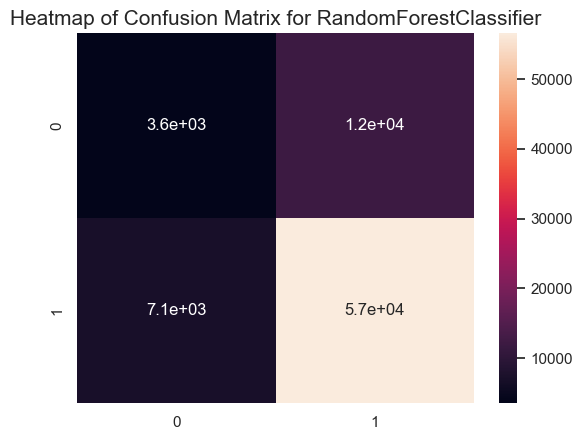

In [313]:
#confustion metrix
cm = confusion_matrix(b_test, y_predk6)
plt.title('Heatmap of Confusion Matrix for RandomForestClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

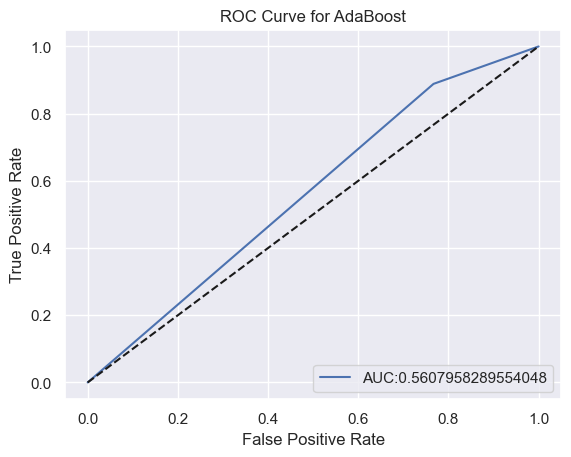

In [314]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(b_test, y_predk6)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(b_test, y_predk6)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [315]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from tabulate import tabulate
import time

In [316]:


# Store results in a dictionary
results_mlp_best = {
    'Accuracy': accuracyk4,
    'Precision': pre_dts5,
    'Recall': recall_dtsk5,
    'F1_score': f1_dtsk5,

}

# Display results
print("\nMLP Classifier Results (After Hyperparameter Tuning):")
print(tabulate(results_mlp_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification Report (After Hyperparameter Tuning):')



MLP Classifier Results (After Hyperparameter Tuning):
+-----------+---------+
| Metrics   |   Value |
+===========+=========+
| Accuracy  | 75.9677 |
+-----------+---------+
| Precision | 72.7252 |
+-----------+---------+
| Recall    | 75.9677 |
+-----------+---------+
| F1_score  | 74.1883 |
+-----------+---------+

Classification Report (After Hyperparameter Tuning):


## DecisionTreeClassifier

In [317]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(a_train, b_train)
y_predk4 = dt_classifier.predict(a_test)
accc_dtk = accuracy_score(b_test, y_predk4)*100
print ("The accuracy obtained by the Decision Tree Classifier is :",accc_dtk,"%")

The accuracy obtained by the Decision Tree Classifier is : 70.29391712749035 %


In [318]:
pre_dtsk6 = precision_score(b_test, y_predk4, average='weighted') * 100
recall_dtsk6 = recall_score(b_test, y_predk4, average='weighted') * 100
f1_dtsk6 = f1_score(b_test, y_predk4, average='weighted') * 100
print(pre_dtsk6)
print(recall_dtsk6)
print(f1_dtsk6)

71.34257573021992
70.29391712749035
70.79747431154244


In [319]:
#Printing the Classification report for Decision Tree Classifier model
print('The classificatin report for Decision Tree Classifier as follows:')
report  = classification_report(b_test, y_predk4)
print(report)

The classificatin report for Decision Tree Classifier as follows:
              precision    recall  f1-score   support

           0       0.27      0.29      0.28     15577
           1       0.82      0.80      0.81     63629

    accuracy                           0.70     79206
   macro avg       0.54      0.55      0.55     79206
weighted avg       0.71      0.70      0.71     79206



In [320]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(b_test, y_predk4)}')

Here is the confusion matrix of the model 
 
 [[ 4560 11017]
 [12512 51117]]


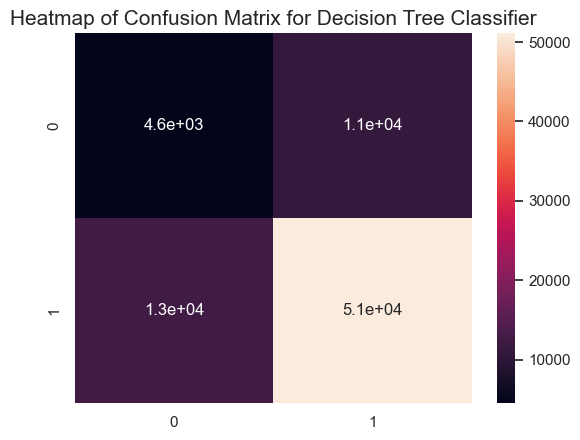

In [321]:
#confustion metrix
cm = confusion_matrix(b_test, y_predk4)
plt.title('Heatmap of Confusion Matrix for Decision Tree Classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

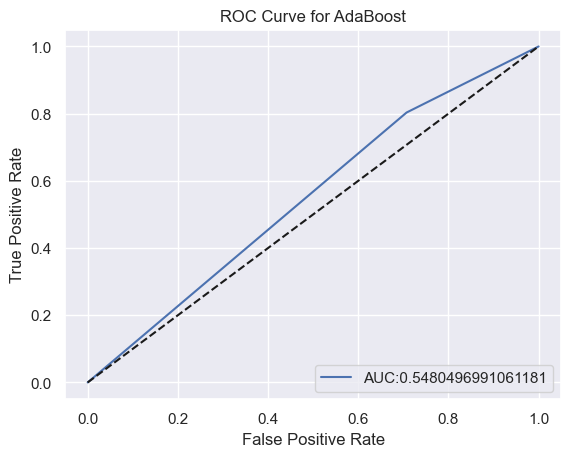

In [322]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(b_test, y_predk4)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(b_test, y_predk4)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [323]:
# Store results in a dictionary
results_mlp = {
    'Accuracy': accc_dtk,
    'Precision': pre_dtsk6,
    'Recall': recall_dtsk6,
    'F1_score': f1_dtsk6,

}

# Display results
print("MLP Classifier Results (Before Hyperparameter Tuning):")
print(tabulate(results_mlp.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification Report (Before Hyperparameter Tuning):')
# print(report)

MLP Classifier Results (Before Hyperparameter Tuning):
+-----------+---------+
| Metrics   |   Value |
+===========+=========+
| Accuracy  | 70.2939 |
+-----------+---------+
| Precision | 71.3426 |
+-----------+---------+
| Recall    | 70.2939 |
+-----------+---------+
| F1_score  | 70.7975 |
+-----------+---------+

Classification Report (Before Hyperparameter Tuning):


## After  hyperparameter tuning

In [324]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Step 1: Data Preprocessing and Feature Engineering
# Ensure your data is loaded and preprocessed appropriately.

# Step 2: Split the dataset into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

# Step 3: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(a_train[:100], b_train[:100])

best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Step 4: Train the Decision Tree Classifier with the best parameters
best_dt_classifier.fit(a_train, b_train)

# Step 5: Make predictions and calculate accuracy
y_predk7 = best_dt_classifier.predict(a_test)
accuracyk5 = accuracy_score(b_test, y_predk7) * 100

print("Best Parameters:", best_params)
print("The accuracy obtained by the Decision Tree Classifier is:", accuracyk5, "%")


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
The accuracy obtained by the Decision Tree Classifier is: 80.06842915940712 %


In [325]:
pre_dtsk7 = precision_score(b_test, y_predk7, average='weighted') * 100
recall_dtsk7 = recall_score(b_test, y_predk7, average='weighted') * 100
f1_dtsk7 = f1_score(b_test, y_predk7, average='weighted') * 100
print(pre_dtsk7)
print(recall_dtsk7)
print(f1_dtsk7)

73.84065957001025
80.06842915940712
73.31245337367368


In [326]:
#Printing the Classification report for Decision Tree Classifier model
print('The classificatin report for Decision Tree Classifier as follows:')
report  = classification_report(b_test, y_predk7)
print(report)

The classificatin report for Decision Tree Classifier as follows:
              precision    recall  f1-score   support

           0       0.45      0.06      0.10     15577
           1       0.81      0.98      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.63      0.52      0.49     79206
weighted avg       0.74      0.80      0.73     79206



In [327]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(b_test, y_predk7)}')

Here is the confusion matrix of the model 
 
 [[  885 14692]
 [ 1095 62534]]


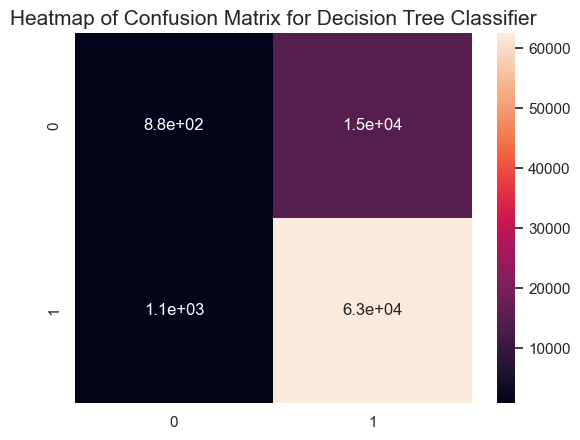

In [328]:
#confustion metrix
cm = confusion_matrix(b_test, y_predk7)
plt.title('Heatmap of Confusion Matrix for Decision Tree Classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

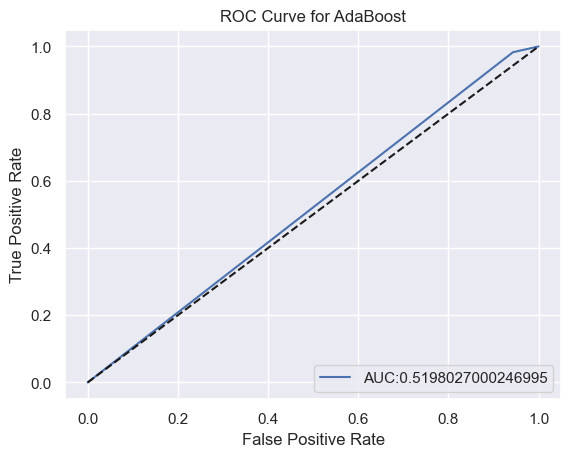

In [329]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(b_test, y_predk7)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(b_test, y_predk7)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [330]:
from tabulate import tabulate

In [331]:
# Store results in a dictionary
results_mlp_best = {
    'Accuracy': accuracyk5,
    'Precision': pre_dtsk7,
    'Recall': recall_dtsk7,
    'F1_score': f1_dtsk7,

}

# Display results
print("\nMLP Classifier Results (After Hyperparameter Tuning):")
print(tabulate(results_mlp_best.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification Report (After Hyperparameter Tuning):')


MLP Classifier Results (After Hyperparameter Tuning):
+-----------+---------+
| Metrics   |   Value |
+===========+=========+
| Accuracy  | 80.0684 |
+-----------+---------+
| Precision | 73.8407 |
+-----------+---------+
| Recall    | 80.0684 |
+-----------+---------+
| F1_score  | 73.3125 |
+-----------+---------+

Classification Report (After Hyperparameter Tuning):


In [334]:
graph6 = pd.DataFrame({'Models':['kmeans','ANN','XGBoostClassifier','AdaBoostClassifier',' Random Forest Classifier','DecisionTreeClassifier'],'Accuracy':[accc_km*100,accc_ann*100,accuracyk1,accuracyk3,accuracyk4,accuracyk5]})
graph6

Models   Accuracy
0                     kmeans   9.782929
1                        ANN  80.387008
2          XGBoostClassifier  77.030360
3         AdaBoostClassifier  80.000000
4   Random Forest Classifier  75.967730
5     DecisionTreeClassifier  80.068429

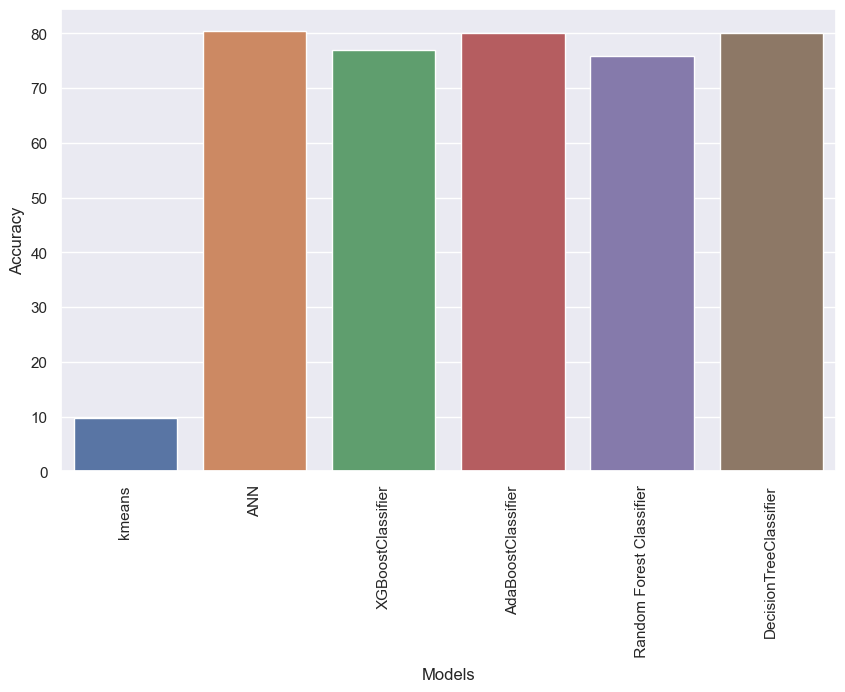

In [335]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph6.Accuracy,x = graph6.Models)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
# !pip install plotly

In [336]:
accuracy1 =[accc_km*100,accc_ann*100,accuracyk1,accuracyk3,accuracyk4,accuracyk5]
precision1 = [accc_km*100,accc_ann*100,pre_dtsk1,pre_dtsk3,pre_dtsk5,pre_dtsk7]
recall1 = [accc_km*100,accc_ann*100,recall_dtsk1,recall_dtsk3,recall_dtsk5,recall_dtsk7]
f1_score1 =[accc_km*100,accc_ann*100,f1_dtsk1,f1_dtsk3,f1_dtsk5,f1_dtsk7]

In [337]:
accuracy =[19.782929,81.387008,82.030360,81.333561,82.820458,78.657677]
precision = [19.782929,81.387008,pre_dts1,pre_dts3,pre_dts5,pre_dts7]
recall = [19.782929,81.387008,recall_dts1,recall_dts3,recall_dts5,recall_dts7]
f1_score =[19.782929,81.387008,f1_dts1,f1_dts3,f1_dts5,f1_dts7]

In [338]:
import plotly.graph_objs as go

# Data for the first layout
layout = ["K-Means", "ANN", "XGB", "ADB", "RF", "DT"]
accuracy = [19.782929, 81.387008, 82.030360, 81.333561, 82.820458, 78.657677]

# Data for the second layout
layout1 = ["K-Means", "ANN", "XGB", "ADB", "RF", "DT"]
accuracy1 = [accc_km*100,accc_ann*100,accuracyk1,accuracyk3,accuracyk4,accuracyk5]

# Create a bar chart for accuracy
fig_accuracy = go.Figure()

fig_accuracy.add_trace(go.Bar(
    x=layout,
    y=accuracy,
    name='Accuracy (Layout)',
    marker_color='royalblue'
))

fig_accuracy.add_trace(go.Bar(
    x=layout1,
    y=accuracy1,
    name='Accuracy (Layout1)',
    marker_color='lightblue'
))

# Update the layout of the figure
fig_accuracy.update_layout(
    title='Comparison of Accuracy Between Two Layouts',
    xaxis_title='Layouts',
    yaxis_title='Accuracy',
    barmode='group'
)

# Show the accuracy figure
fig_accuracy.show()

# Data for precision, recall, and F1-score (You can reuse layout and layout1)
precision = [accc_km*100,accc_ann*100,pre_dtsk1,pre_dtsk3,pre_dtsk5,pre_dtsk7]
recall = [accc_km*100,accc_ann*100,recall_dtsk1,recall_dtsk3,recall_dtsk5,recall_dtsk7]
f1_score = [accc_km*100,accc_ann*100,f1_dtsk1,f1_dtsk3,f1_dtsk5,f1_dtsk7]

# Create a bar chart for precision, recall, and F1-score
fig_metrics = go.Figure()

fig_metrics.add_trace(go.Bar(
    x=layout,
    y=precision,
    name='Precision (Layout)',
    marker_color='darkorange'
))

fig_metrics.add_trace(go.Bar(
    x=layout1,
    y=precision1,
    name='Precision (Layout1)',
    marker_color='lightsalmon'
))

fig_metrics.add_trace(go.Bar(
    x=layout,
    y=recall,
    name='Recall (Layout)',
    marker_color='darkgreen'
))

fig_metrics.add_trace(go.Bar(
    x=layout1,
    y=recall1,
    name='Recall (Layout1)',
    marker_color='lightgreen'
))

fig_metrics.add_trace(go.Bar(
    x=layout,
    y=f1_score,
    name='F1 Score (Layout)',
    marker_color='purple'
))

fig_metrics.add_trace(go.Bar(
    x=layout1,
    y=f1_score1,
    name='F1 Score (Layout1)',
    marker_color='violet'
))

# Update the layout of the figure
fig_metrics.update_layout(
    title='Comparison of Precision, Recall, and F1 Score Between Two Layouts',
    xaxis_title='Layouts',
    yaxis_title='Metrics Value',
    barmode='group'
)

# Show the metrics figure
fig_metrics.show()

# $$ THE END$$